# Import Packages

In [1]:
# Import Packages

import requests
import pandas as pd
from pandas import DataFrame
from pandas import concat
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import dash
import itertools
import statsmodels.api as sm
import re
import scikit_posthocs as sp
import seaborn as sns
from statsmodels.formula.api import ols
from matplotlib import pyplot
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from itertools import product
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from dash import html
from dash import dcc
from scipy.stats import chi2
from scipy.stats import kruskal
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import shapiro
from scipy.stats import levene

# Download Delay Data

In [2]:
#Wait Assessment 2020 Onwards - "https://data.ny.gov/resource/swky-c3v4.csv"

# Create a directory to store the csv files
os.makedirs("data", exist_ok=True)

# Download the csv file
wait_assessment_2020 = "https://data.ny.gov/resource/swky-c3v4.csv?$limit=1000000000"
response = requests.get(wait_assessment_2020)

# Save the csv file to disk
csv_file = "wait_assessment_2020.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
wait_assessment_2020 = pd.read_csv(csv_file)

In [3]:
# Column and row count
print(wait_assessment_2020.shape)

# Describe the dataframe
wait_assessment_2020.describe(include="all")

(56667, 9)


,month,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment
count,56667,56667,56667.000000,56667,56667,56667,5.666700e+04,5.666700e+04,56396.000000
unique,49,7,NaN,4,334,3,NaN,NaN,NaN
top,2022-01,Queens,NaN,LCL/LTD,BX1,Off-Peak,NaN,NaN,NaN
freq,1279,18242,NaN,43355,196,28311,NaN,NaN,NaN
mean,NaN,NaN,1.444068,NaN,NaN,NaN,6.739577e+03,8.742157e+03,0.781492
std,NaN,NaN,0.496866,NaN,NaN,NaN,9.230505e+04,1.198316e+05,0.093204
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000
25%,NaN,NaN,1.000000,NaN,NaN,NaN,8.030000e+02,1.039500e+03,0.719984
50%,NaN,NaN,1.000000,NaN,NaN,NaN,1.941000e+03,2.507000e+03,0.786726
75%,NaN,NaN,2.000000,NaN,NaN,NaN,4.377000e+03,5.839000e+03,0.849295


In [4]:
# Column name and data type
print(wait_assessment_2020.dtypes)

month                            object
borough                          object
day_type                          int64
trip_type                        object
route_id                         object
period                           object
number_of_trips_passing_wait      int64
number_of_scheduled_trips         int64
wait_assessment                 float64
dtype: object


In [5]:
# Split the month and year into separate columns
wait_assessment_2020[["Year", "Month"]] = wait_assessment_2020["month"].str.split("-", expand=True)

In [6]:
# Describe the dataframe
wait_assessment_2020.describe(include="all")

,month,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment,Year,Month
count,56667,56667,56667.000000,56667,56667,56667,5.666700e+04,5.666700e+04,56396.000000,56667,56667
unique,49,7,NaN,4,334,3,NaN,NaN,NaN,5,12
top,2022-01,Queens,NaN,LCL/LTD,BX1,Off-Peak,NaN,NaN,NaN,2023,01
freq,1279,18242,NaN,43355,196,28311,NaN,NaN,NaN,14073,5928
mean,NaN,NaN,1.444068,NaN,NaN,NaN,6.739577e+03,8.742157e+03,0.781492,NaN,NaN
std,NaN,NaN,0.496866,NaN,NaN,NaN,9.230505e+04,1.198316e+05,0.093204,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,8.030000e+02,1.039500e+03,0.719984,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,1.941000e+03,2.507000e+03,0.786726,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,4.377000e+03,5.839000e+03,0.849295,NaN,NaN


In [7]:
# Wait Assessment 2015 - 2019 - "https://data.ny.gov/resource/bmix-dpzc.csv"

# Download the csv file
wait_assessment_2015 = "https://data.ny.gov/resource/bmix-dpzc.csv?$limit=1000000000"
response = requests.get(wait_assessment_2015)

# Save the csv file to disk
csv_file = "wait_assessment_2015.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
wait_assessment_2015 = pd.read_csv(csv_file)

In [8]:
# Print the shape of the dataframe
print(wait_assessment_2015.shape)

# Describe the dataframe
wait_assessment_2015.describe(include="all")

(69275, 9)


,month,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment
count,69275,69275,69275.000000,69275,69275,69275,6.927500e+04,6.927500e+04,69000.000000
unique,60,6,NaN,4,358,3,NaN,NaN,NaN
top,2017-01,Queens,NaN,LCL/LTD,X27,Peak,NaN,NaN,NaN
freq,1271,22591,NaN,54012,244,34598,NaN,NaN,NaN
mean,NaN,NaN,1.450134,NaN,NaN,NaN,7.693643e+03,9.853252e+03,0.794816
std,NaN,NaN,0.497511,NaN,NaN,NaN,1.043728e+05,1.339891e+05,0.086511
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000
25%,NaN,NaN,1.000000,NaN,NaN,NaN,9.100000e+02,1.146000e+03,0.738466
50%,NaN,NaN,1.000000,NaN,NaN,NaN,2.250000e+03,2.872000e+03,0.798664
75%,NaN,NaN,2.000000,NaN,NaN,NaN,5.017500e+03,6.610000e+03,0.856130


In [9]:
# Split the month and year into separate columns
wait_assessment_2015[["Year", "Month"]] = wait_assessment_2015["month"].str.split("-", expand=True)

In [10]:
# Merge the two dataframes
wait_assessment_2015_2020 = pd.concat([wait_assessment_2020, wait_assessment_2015], axis=0, ignore_index=True)

In [11]:
# Print the shape of the dataframe
print(wait_assessment_2015_2020.shape)

# Describe the dataframe
wait_assessment_2015_2020.describe(include="all")


(125942, 11)


,month,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment,Year,Month
count,125942,125942,125942.000000,125942,125942,125942,1.259420e+05,1.259420e+05,125396.000000,125942,125942
unique,109,7,NaN,4,369,3,NaN,NaN,NaN,10,12
top,2022-01,Queens,NaN,LCL/LTD,BX1,Off-Peak,NaN,NaN,NaN,2023,01
freq,1279,40833,NaN,97367,436,62868,NaN,NaN,NaN,14073,12189
mean,NaN,NaN,1.447404,NaN,NaN,NaN,7.264366e+03,9.353320e+03,0.788823,NaN,NaN
std,NaN,NaN,0.497228,NaN,NaN,NaN,9.912570e+04,1.278139e+05,0.089828,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,8.580000e+02,1.097000e+03,0.730053,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,2.115500e+03,2.708500e+03,0.793640,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,4.721000e+03,6.252750e+03,0.853152,NaN,NaN


In [12]:
# Service Deliviered 2020 Onwards - "https://data.ny.gov/resource/2e6s-9gpm.csv"

# Download the csv file
service_delivered_2020 = "https://data.ny.gov/resource/2e6s-9gpm.csv?$limit=1000000000"
response = requests.get(service_delivered_2020)

# Save the csv file to disk
csv_file = "service_delivered_2020.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
service_delivered_2020 = pd.read_csv(csv_file)

In [13]:
# Service Deliviered 2015 - 2019 - "https://data.ny.gov/resource/tw28-zvtk.csv"

# Download the csv file
service_delivered_2015 = "https://data.ny.gov/resource/tw28-zvtk.csv?$limit=1000000000"
response = requests.get(service_delivered_2015)

# Save the csv file to disk
csv_file = "service_delivered_2015.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
service_delivered_2015 = pd.read_csv(csv_file)

# Download Traffic Data

This is a large file and takes some time to download.  It is not included in the repository. but the transformed data is.

In [14]:
# Hourly Traffic on (MTA) Bridges and Tunnels: Beginning 2010 - "https://data.ny.gov/resource/qzve-kjga.csv"

# Download the csv file
hourly_traffic = "https://data.ny.gov/resource/qzve-kjga.csv?$limit=1000000000"
response = requests.get(hourly_traffic)

# Save the csv file to disk
csv_file = "hourly_traffic.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
hourly_traffic = pd.read_csv(csv_file)


In [15]:
# Loading the csv file for hourly_traffic
hourly_traffic = pd.read_csv('hourly_traffic.csv')

In [16]:
# Print the shape of the dataframe
print(hourly_traffic.shape)

# Describe the dataframe
hourly_traffic.describe(include="all")

(2172969, 6)


,plaza_id,date,hour,direction,vehicles_e_zpass,vehicles_vtoll
count,2.172969e+06,2172969,2.172969e+06,2172969,2.172969e+06,2.172969e+06
unique,NaN,5064,NaN,2,NaN,NaN
top,NaN,2010-01-01T00:00:00.000,NaN,I,NaN,NaN
freq,NaN,456,NaN,1104657,NaN,NaN
mean,1.429613e+01,NaN,1.150166e+01,NaN,1.453486e+03,2.740779e+02
std,1.054738e+01,NaN,6.921399e+00,NaN,1.384518e+03,2.537889e+02
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,5.000000e+00,NaN,6.000000e+00,NaN,4.140000e+02,7.400000e+01
50%,9.000000e+00,NaN,1.200000e+01,NaN,1.071000e+03,1.960000e+02
75%,2.500000e+01,NaN,1.800000e+01,NaN,2.149000e+03,4.120000e+02


In [17]:
# Create a new column named total_vehicles by adding the vehicles_e_zpass and vehicles_vtoll columns
hourly_traffic["total_vehicles"] = hourly_traffic["vehicles_e_zpass"] + hourly_traffic["vehicles_vtoll"]

In [18]:
# Extract the year from the date_time column
hourly_traffic["year"] = hourly_traffic["date"].str[:4]

# Extract the month from the date column
hourly_traffic["month"] = hourly_traffic["date"].str[5:7]

In [19]:
# Transform the dataframe to group by the Year, Month, plaza_id, and direction columns, giving the sum of the total_vehicles, vehicles_e_zpass, and vehicles_vtoll columns
hourly_traffic_transformed = hourly_traffic.groupby(["year", "month", "plaza_id", "direction"]).agg({"total_vehicles": "sum", "vehicles_e_zpass": "sum", "vehicles_vtoll": "sum"}).reset_index()    

In [20]:
# Print the shape of the dataframe
print(hourly_traffic_transformed.shape)

# Describe the dataframe
hourly_traffic_transformed.describe(include="all")


(3047, 7)


,year,month,plaza_id,direction,total_vehicles,vehicles_e_zpass,vehicles_vtoll
count,3047,3047,3047.000000,3047,3.047000e+03,3.047000e+03,3047.000000
unique,15,12,NaN,2,NaN,NaN,NaN
top,2010,01,NaN,I,NaN,NaN,NaN
freq,228,273,NaN,1547,NaN,NaN,NaN
mean,NaN,NaN,14.499508,NaN,1.232013e+06,1.036554e+06,195458.754513
std,NaN,NaN,10.567293,NaN,8.309793e+05,7.084344e+05,142361.992500
min,NaN,NaN,1.000000,NaN,5.213200e+04,4.747900e+04,4366.000000
25%,NaN,NaN,5.000000,NaN,6.528585e+05,5.690930e+05,73858.500000
50%,NaN,NaN,9.000000,NaN,1.125605e+06,9.285590e+05,160979.000000
75%,NaN,NaN,25.000000,NaN,1.627716e+06,1.316382e+06,293774.500000


In [21]:
# Add a column named 'value_type', all the values in this column should say 'vehicle_count'
hourly_traffic_transformed = hourly_traffic_transformed.assign(value_type="vehicle_count")

# change the plaza_id column to location_id, and change total_vehicles to value
hourly_traffic_transformed = hourly_traffic_transformed.rename(columns={"plaza_id": "location_id", "total_vehicles": "value"})

In [22]:
# Keep columns 1-5 and column 8 and drop the rest
hourly_traffic_transformed = hourly_traffic_transformed.iloc[:, list(range(5)) + [7]]

# swap the order of the last 2 columns
hourly_traffic_transformed = hourly_traffic_transformed.iloc[:, [0, 1, 2, 3, 5, 4]]

In [23]:
# Add a column named 'data_source', all the values in this column should say 'hourly_traffic'
hourly_traffic_transformed = hourly_traffic_transformed.assign(data_source="hourly_traffic")

In [24]:
# Save the dataframe to a csv file
hourly_traffic_transformed.to_csv("hourly_traffic_transformed.csv", index=False)

In [25]:
# Load the csv file for hourly_traffic_transformed
hourly_traffic_transformed = pd.read_csv("hourly_traffic_transformed.csv")

hourly_traffic_transformed is one traffic df
columns are:
year
month
location_id
direction
value_type
value

The following csv is a large file available at https://data.cityofnewyork.us/resource/7ym2-wayt
The full file has been downloaded and is used in the following script.
The aggregate output will also be made available and it is recommended this is the version to work with

In [26]:
# Open a CSV file and write it to a df using pandas
# Open the CSV file

traffic_speeds = pd.read_csv('DOT_Traffic_Speeds_NBE_20240121.csv')

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\3722983806.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_speeds = pd.read_csv('DOT_Traffic_Speeds_NBE_20240121.csv')


In [27]:
ts_backup = traffic_speeds

In [28]:
# Print the shape of the dataframe
print(traffic_speeds.shape)

# Describe the dataframe
traffic_speeds.describe(include="all")

(11354347, 13)


,ID,SPEED,TRAVEL_TIME,STATUS,DATA_AS_OF,LINK_ID,LINK_POINTS,ENCODED_POLY_LINE,ENCODED_POLY_LINE_LVLS,OWNER,TRANSCOM_ID,BOROUGH,LINK_NAME
count,11354347.0,1.135434e+07,1.135434e+07,1.135434e+07,11354344,1.135434e+07,11354344,11354343,11354343,11354343,1.135434e+07,11354343,11354343
unique,281.0,NaN,NaN,NaN,662468,NaN,138,1171,42,6,NaN,6,139
top,217.0,NaN,NaN,NaN,09/20/2019 07:27:03 AM,NaN,"40.63092,-74.14592 40.62975,-74.14593 40.62877...",w~mwFjisbMc@}HkCe^gBoZe@iQe@mJSaBYmA_A{BuBqCcC...,BBBBBBBBBBBBBBB,NYC_DOT_LIC,NaN,Queens,FDR N Catherine Slip - 25th St
freq,83674.0,NaN,NaN,NaN,101,NaN,167568,83794,831857,8872375,NaN,3305143,83794
mean,NaN,3.493317e+01,2.213807e+02,-1.333680e+01,NaN,4.575233e+06,NaN,NaN,NaN,NaN,4.575233e+06,NaN,NaN
std,NaN,1.923900e+01,1.599458e+03,3.419279e+01,NaN,1.026174e+05,NaN,NaN,NaN,NaN,1.026174e+05,NaN,NaN
min,NaN,0.000000e+00,-5.700000e+01,-1.010000e+02,NaN,4.329472e+06,NaN,NaN,NaN,NaN,4.329472e+06,NaN,NaN
25%,NaN,1.864000e+01,7.200000e+01,0.000000e+00,NaN,4.616192e+06,NaN,NaN,NaN,NaN,4.616192e+06,NaN,NaN
50%,NaN,4.101000e+01,1.350000e+02,0.000000e+00,NaN,4.616235e+06,NaN,NaN,NaN,NaN,4.616235e+06,NaN,NaN
75%,NaN,5.095000e+01,2.350000e+02,0.000000e+00,NaN,4.616332e+06,NaN,NaN,NaN,NaN,4.616332e+06,NaN,NaN


In [29]:
# Keep the Speed, travel_time, status, data_as_of, link_id, and borough columns
traffic_speeds = traffic_speeds[['SPEED', 'TRAVEL_TIME', 'STATUS', 'DATA_AS_OF', 'LINK_ID', 'BOROUGH']]

In [30]:
# Extract the year from the data_as_of column which is in the format of 09/20/2019 07:27:03 AM
traffic_speeds["year"] = traffic_speeds["DATA_AS_OF"].str[6:10]

# Extract the month from the data_as_of column which is in the format of 09/20/2019 07:27:03 AM
traffic_speeds["month"] = traffic_speeds["DATA_AS_OF"].str[0:2]

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\268432243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_speeds["year"] = traffic_speeds["DATA_AS_OF"].str[6:10]
C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\268432243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_speeds["month"] = traffic_speeds["DATA_AS_OF"].str[0:2]


In [31]:
# Group the dataframe by the Year, Month, and BOROUGH and LINK_ID, columns, giving the mean of the speed and travel_time columns
traffic_speeds_transformed = traffic_speeds.groupby(["year", "month", "BOROUGH", "LINK_ID"]).agg({"SPEED": "mean", "TRAVEL_TIME": "mean"}).reset_index()

In [32]:
# Print the shape of the dataframe
print(traffic_speeds_transformed.shape)

# Describe the dataframe
traffic_speeds_transformed.describe(include="all")

(2018, 6)


,year,month,BOROUGH,LINK_ID,SPEED,TRAVEL_TIME
count,2018,2018,2018,2.018000e+03,2018.000000,2018.000000
unique,3,12,6,NaN,NaN,NaN
top,2019,03,Queens,NaN,NaN,NaN
freq,1497,274,572,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.574448e+06,35.865531,210.040639
std,NaN,NaN,NaN,1.045490e+05,15.429251,185.288915
min,NaN,NaN,NaN,4.329472e+06,0.000000,0.000000
25%,NaN,NaN,NaN,4.616192e+06,26.920289,91.850000
50%,NaN,NaN,NaN,4.616235e+06,39.669432,157.234479
75%,NaN,NaN,NaN,4.616329e+06,47.172769,270.629374


In [33]:
# save the dataframe to a csv file
traffic_speeds_transformed.to_csv("traffic_speeds_transformed.csv", index=False)

In [34]:
# load the transformed dataframe from a csv file
traffic_speeds_transformed = pd.read_csv("traffic_speeds_transformed.csv")

In [35]:
# Melt the dataframe so that the values in the speed and travel_time columns are in the same column and the column names are in a column named 'value_type'
traffic_speeds_transformed = traffic_speeds_transformed.melt(id_vars=["year", "month", "BOROUGH", "LINK_ID"], value_vars=["SPEED", "TRAVEL_TIME"], var_name="value_type", value_name="value")

In [36]:
# Lowercase the value_type column
traffic_speeds_transformed["value_type"] = traffic_speeds_transformed["value_type"].str.lower()

In [37]:
# Remove the BOROUGH column and change the LINK_ID column to location_id
traffic_speeds_transformed = traffic_speeds_transformed.drop(columns=["BOROUGH"])
traffic_speeds_transformed = traffic_speeds_transformed.rename(columns={"LINK_ID": "location_id"})

In [38]:
# Add a column named 'direction' with all the values in this column should be null
traffic_speeds_transformed = traffic_speeds_transformed.assign(direction="null")

In [39]:
# Move the direction column to behind the location_id column
traffic_speeds_transformed = traffic_speeds_transformed.iloc[:, [0, 1, 2, 5, 3, 4]]

In [40]:
# add a column named 'data_source' with all the values in this column should be 'traffic_speeds'
traffic_speeds_transformed = traffic_speeds_transformed.assign(data_source="traffic_speeds")

In [41]:
# save the dataframe to a csv file
traffic_speeds_transformed.to_csv("traffic_speeds_transformed.csv", index=False)

In [42]:
# load the transformed dataframe from a csv file
traffic_speeds_transformed = pd.read_csv("traffic_speeds_transformed.csv")

traffic_speeds_transformed is one traffic df

Skip download and use the transformed data instead.

In [43]:
# https://data.cityofnewyork.us/Transportation/Automated-Traffic-Volume-Counts/7ym2-wayt

# Download the csv file
# Use a select and group by statement to get the count of the volume column grouped by the year, month, and roadway_name columns

automated_traffic_volume_counts = "https://data.ny.gov/resource/7ym2-wayt.csv?$select=Yr,M,Boro,sum(Vol)&$group=Yr,M,Boro&$limit=1000000000" 
response = requests.get(automated_traffic_volume_counts)

In [44]:
# Save the csv file to disk
csv_file = "automated_traffic_volume_counts.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

In [45]:
# Load the csv file to a dataframe
automated_traffic_volume_counts = pd.read_csv("automated_traffic_volume_counts.csv")


In [46]:
automated_traffic_volume_counts.describe(include='all')

,Yr,M,Boro,sum_Vol
count,654.000000,654.000000,654,6.540000e+02
unique,NaN,NaN,5,NaN
top,NaN,NaN,Brooklyn,NaN
freq,NaN,NaN,143,NaN
mean,2013.983180,6.417431,NaN,4.471014e+06
std,3.564074,3.409527,NaN,6.810515e+06
min,2000.000000,1.000000,NaN,2.137000e+03
25%,2011.000000,3.250000,NaN,4.901512e+05
50%,2014.000000,6.000000,NaN,1.901106e+06
75%,2017.000000,9.000000,NaN,5.533403e+06


In [47]:
# Change the column names to year, month, location_id, and value
automated_traffic_volume_counts = automated_traffic_volume_counts.rename(columns={"Yr": "year", "M": "month", "Boro": "location_id", "sum_Vol": "value"})

# Add a column named 'value_type' with all the values in this column should say 'vehicle_count'
automated_traffic_volume_counts = automated_traffic_volume_counts.assign(value_type="vehicle_count")

# Add a column named 'direction' with all the values in this column should be null
automated_traffic_volume_counts = automated_traffic_volume_counts.assign(direction="null")

In [48]:
# Set the order of the columns to 0,1,2,5,4,3
automated_traffic_volume_counts = automated_traffic_volume_counts.iloc[:, [0, 1, 2, 5, 4, 3]]

In [49]:
# Add a column named 'data_source' with all the values in this column should be 'automated_traffic_volume_counts'
automated_traffic_volume_counts = automated_traffic_volume_counts.assign(data_source="automated_traffic_volume_counts")

In [50]:
# save the dataframe to a csv file
automated_traffic_volume_counts.to_csv("automated_traffic_volume_counts_transformed.csv", index=False)

In [51]:
automated_traffic_volume_counts_transformed = pd.read_csv("automated_traffic_volume_counts_transformed.csv")

automated_traffic_volume_counts_transformed is one traffic df

In [52]:
# Daily Traffic - "https://data.ny.gov/resource/cwhc-n4ek.csv"

# Download the csv file
daily_traffic = "https://data.ny.gov/resource/cwhc-n4ek.csv?$limit=1000000000"
response = requests.get(daily_traffic)

# Save the csv file to disk
csv_file = "daily_traffic.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
daily_traffic = pd.read_csv(csv_file)

In [53]:
# Load the csv file
daily_traffic = pd.read_csv('daily_traffic.csv')

In [54]:
# Print the shape of the dataframe
print(daily_traffic.shape)

# Describe the dataframe
daily_traffic.describe(include="all")

(90565, 5)


,date,plaza_id,direction,vehicles_e_zpass,vehicles_vtoll
count,90565,90565.000000,90565,90565.000000,90565.000000
unique,5064,NaN,2,NaN,NaN
top,2010-07-07T00:00:00.000,NaN,I,NaN,NaN
freq,19,NaN,46041,NaN,NaN
mean,NaN,14.299089,NaN,34874.171623,6576.081544
std,NaN,10.547594,NaN,24190.663856,4846.231549
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,5.000000,NaN,17167.000000,2507.000000
50%,NaN,9.000000,NaN,31009.000000,5432.000000
75%,NaN,25.000000,NaN,44511.000000,9719.000000


In [55]:
# Extract the year from the date column
daily_traffic["year"] = daily_traffic["date"].str[:4]

# Extract the month from the date column
daily_traffic["month"] = daily_traffic["date"].str[5:7]

In [56]:
# Add the vehicles_e_zpass and vehicles_vtoll columns to get the total_vehicles column
daily_traffic["value"] = daily_traffic["vehicles_e_zpass"] + daily_traffic["vehicles_vtoll"]

In [57]:
# Get the sum of the total_vehicles, vehicles_e_zpass, and vehicles_vtoll columns grouped by the Year, Month, plaza_id, and direction columns
daily_traffic_transformed = daily_traffic.groupby(["year", "month", "plaza_id", "direction"]).agg({"value": "sum", "vehicles_e_zpass": "sum", "vehicles_vtoll": "sum"}).reset_index()

In [58]:
# Write the dataframe to a csv file
daily_traffic_transformed.to_csv("daily_traffic_transformed.csv", index=False)

In [59]:
# Load the csv file
daily_traffic_transformed = pd.read_csv('daily_traffic_transformed.csv')

In [60]:
# Print the shape of the dataframe
print(daily_traffic_transformed.shape)

# Describe the dataframe
daily_traffic_transformed.describe(include="all")

(3047, 7)


,year,month,plaza_id,direction,value,vehicles_e_zpass,vehicles_vtoll
count,3047.000000,3047.000000,3047.000000,3047,3.047000e+03,3.047000e+03,3047.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,I,NaN,NaN,NaN
freq,NaN,NaN,NaN,1547,NaN,NaN,NaN
mean,2016.455858,6.450607,14.499508,NaN,1.232013e+06,1.036554e+06,195458.754513
std,4.142956,3.491868,10.567293,NaN,8.309793e+05,7.084344e+05,142361.992500
min,2010.000000,1.000000,1.000000,NaN,5.213200e+04,4.747900e+04,4366.000000
25%,2013.000000,3.000000,5.000000,NaN,6.528585e+05,5.690930e+05,73858.500000
50%,2016.000000,6.000000,9.000000,NaN,1.125605e+06,9.285590e+05,160979.000000
75%,2020.000000,10.000000,25.000000,NaN,1.627716e+06,1.316382e+06,293774.500000


In [61]:
# add a column named 'value_type' with all the values in this column should say 'vehicle_count'
daily_traffic_transformed = daily_traffic_transformed.assign(value_type="vehicle_count")

# change the plaza_id column to location_id
daily_traffic_transformed = daily_traffic_transformed.rename(columns={"plaza_id": "location_id"})


In [62]:
# swap the order of the last 2 columns
daily_traffic_transformed = daily_traffic_transformed.iloc[:, [0, 1, 2, 3, 7, 4]]

In [63]:
# add a column named 'data_source' with all the values in this column should be 'daily_traffic'
daily_traffic_transformed = daily_traffic_transformed.assign(data_source="daily_traffic")

In [64]:
# save the dataframe to a csv file
daily_traffic_transformed.to_csv("daily_traffic_transformed.csv", index=False)

In [65]:
# load the transformed dataframe from a csv file
daily_traffic_transformed = pd.read_csv("daily_traffic_transformed.csv")


daily_traffic_transformed is one traffic df

In [66]:
# Traffic Volume Count Smaller - "https://data.cityofnewyork.us/resource/btm5-ppia.csv"

# Download the csv file
volume_count_small = "https://data.cityofnewyork.us/resource/btm5-ppia.csv?$limit=1000000000"
response = requests.get(volume_count_small)

# Save the csv file to disk
csv_file = "volume_count_small.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
volume_count_small = pd.read_csv(csv_file)

In [67]:
# Print the shape of the dataframe
print(volume_count_small.shape)

# Describe the dataframe
volume_count_small.describe(include="all")

(42756, 31)


,id,segmentid,roadway_name,from,to,direction,date,_12_00_1_00_am,_1_00_2_00am,_2_00_3_00am,...,_2_00_3_00pm,_3_00_4_00pm,_4_00_5_00pm,_5_00_6_00pm,_6_00_7_00pm,_7_00_8_00pm,_8_00_9_00pm,_9_00_10_00pm,_10_00_11_00pm,_11_00_12_00am
count,42756.000000,4.275600e+04,42756,42756,42756,42756,42756,42752.000000,42752.000000,42752.000000,...,42503.000000,42503.000000,42503.000000,42503.000000,42503.000000,42503.000000,42503.000000,42503.000000,42503.000000,42503.000000
unique,NaN,NaN,1276,1717,1745,14,608,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,BROADWAY,Dead End,Dead End,NB,2019-10-13T00:00:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,473,504,387,12234,391,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,302.926841,4.988159e+05,NaN,NaN,NaN,NaN,NaN,251.448423,178.591504,135.280318,...,630.179376,657.691175,661.120886,657.712538,628.825612,570.346987,496.648166,428.457779,376.555067,315.806014
std,504.422798,1.875303e+06,NaN,NaN,NaN,NaN,NaN,407.435712,303.030296,242.091877,...,758.610055,779.552761,776.312508,770.034661,764.796252,732.905268,678.326096,614.480940,565.197252,493.563207
min,1.000000,2.020000e+02,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,3.402700e+04,NaN,NaN,NaN,NaN,NaN,60.000000,38.000000,26.000000,...,250.000000,260.000000,261.000000,258.000000,237.000000,204.000000,167.000000,133.000000,108.000000,82.000000
50%,193.000000,7.534300e+04,NaN,NaN,NaN,NaN,NaN,118.000000,79.000000,56.000000,...,406.000000,425.000000,428.000000,424.000000,396.000000,344.000000,287.000000,235.000000,196.000000,157.000000
75%,299.000000,1.448810e+05,NaN,NaN,NaN,NaN,NaN,241.000000,171.000000,128.000000,...,679.000000,713.000000,724.000000,724.000000,680.000000,598.500000,508.000000,427.000000,366.000000,303.000000


In [68]:
# Create a new column named all day which is the sum of all columns ending in am or pm
volume_count_small["value"] = volume_count_small.filter(regex="am|pm").sum(axis=1)

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\3518648863.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  volume_count_small["value"] = volume_count_small.filter(regex="am|pm").sum(axis=1)


In [69]:
# Create a Year column by extracting the year from the date column
volume_count_small["year"] = volume_count_small["date"].str[0:4]

# Create a Month column by extracting the month from the date column
volume_count_small["month"] = volume_count_small["date"].str[5:7]

In [70]:
# Create a new dataframe by grouping the volume_count_small dataframe by the Year, Month, roadway_name, direction columns, giving the sum of the all_day column
volume_count_small_transformed = volume_count_small.groupby(["year", "month", "roadway_name", "direction"]).agg({"value": "sum"}).reset_index()

In [71]:
# Change the column names to year, month, location_id, and value
volume_count_small_transformed = volume_count_small_transformed.rename(columns={"roadway_name": "location_id"})

# Add a column named 'value_type' with all the values in this column should say 'vehicle_count'
volume_count_small_transformed = volume_count_small_transformed.assign(value_type="vehicle_count")


In [72]:
# Swap the order of the last 2 columns
volume_count_small_transformed = volume_count_small_transformed.iloc[:, [0, 1, 2, 3, 5, 4]]

In [73]:
# Print the shape of the dataframe
print(volume_count_small_transformed.shape)

# Describe the dataframe
volume_count_small_transformed.describe(include="all")

(4967, 6)


,year,month,location_id,direction,value_type,value
count,4967,4967,4967,4967,4967,4.967000e+03
unique,10,9,1276,14,1,NaN
top,2012,10,BROADWAY,NB,vehicle_count,NaN
freq,1240,2070,31,1373,4967,NaN
mean,NaN,NaN,NaN,NaN,NaN,9.081084e+04
std,NaN,NaN,NaN,NaN,NaN,2.099907e+05
min,NaN,NaN,NaN,NaN,NaN,1.070000e+02
25%,NaN,NaN,NaN,NaN,NaN,1.887900e+04
50%,NaN,NaN,NaN,NaN,NaN,4.221700e+04
75%,NaN,NaN,NaN,NaN,NaN,8.534750e+04


In [74]:
# Add a column named 'data_source' with all the values in this column should be 'volume_count_small'
volume_count_small_transformed = volume_count_small_transformed.assign(data_source="volume_count_small")

In [75]:
# Save the dataframe to a csv file
volume_count_small_transformed.to_csv("volume_count_small_transformed.csv", index=False)

In [76]:
# Load the csv file
volume_count_small_transformed = pd.read_csv('volume_count_small_transformed.csv')

volume_count_small_transformed is one traffic df

In [77]:
# Merge all the dataframes into one dataframe
traffic = pd.concat([hourly_traffic_transformed, traffic_speeds_transformed, automated_traffic_volume_counts_transformed, daily_traffic_transformed, volume_count_small_transformed], axis=0, ignore_index=True)

In [78]:
# Print the shape of the dataframe
print(traffic.shape)

# Describe the dataframe
traffic.describe(include="all")

(15751, 7)


,year,month,location_id,direction,value_type,value,data_source
count,15751.000000,15751.000000,15751.0,11061,15751,1.575100e+04,15751
unique,NaN,NaN,1440.0,16,3,NaN,5
top,NaN,NaN,3.0,I,vehicle_count,NaN,volume_count_small
freq,NaN,NaN,372.0,3094,11715,NaN,4967
mean,2016.742048,6.996889,NaN,NaN,NaN,6.909708e+05,NaN
std,3.486017,3.551479,NaN,NaN,NaN,1.773847e+06,NaN
min,2000.000000,1.000000,NaN,NaN,NaN,0.000000e+00,NaN
25%,2014.000000,4.000000,NaN,NaN,NaN,5.326932e+02,NaN
50%,2018.000000,8.000000,NaN,NaN,NaN,8.857300e+04,NaN
75%,2019.000000,10.000000,NaN,NaN,NaN,9.999410e+05,NaN


In [79]:
# Set the year and month columns to integers
traffic["year"] = traffic["year"].astype(int)
traffic["month"] = traffic["month"].astype(int)

In [80]:
# Find the minimum and maximum year
print(traffic["year"].min())
print(traffic["year"].max())


2000
2024


# Upload Weather Data

Weather data uploaded from local file

Weather data is available from https://scacis.rcc-acis.org/

Copied to csv and then loaded locally

In [81]:
# Load in all the csv files
weather_avg_perc = pd.read_csv('NYC Weather - average_percipitation.csv')
weather_avg_temp = pd.read_csv('NYC Weather - avg_temp.csv')
weather_max_perc = pd.read_csv('NYC Weather - max_precipitation.csv')
weather_max_snow_depth = pd.read_csv('NYC Weather - max_snow_depth.csv')
weather_max_snowfall = pd.read_csv('NYC Weather - max_snowfall.csv')
weather_max_temp = pd.read_csv('NYC Weather - Max_Temp.csv')
weather_min_temp = pd.read_csv('NYC Weather - Min_Temp.csv')
weather_total_perc = pd.read_csv('NYC Weather - total_percipitation.csv')
weather_total_snow_depth = pd.read_csv('NYC Weather - total_snow_depth.csv')
weather_total_snowfall = pd.read_csv('NYC Weather - total_snowfall.csv')

In [82]:
# Combine all the weather dataframes into one dataframe with a column named weather_type to indicate the type of weather
weather_avg_perc["weather_type"] = "average_percipitation"
weather_avg_temp["weather_type"] = "avg_temp"
weather_max_perc["weather_type"] = "max_precipitation"
weather_max_snow_depth["weather_type"] = "max_snow_depth"
weather_max_snowfall["weather_type"] = "max_snowfall"
weather_max_temp["weather_type"] = "max_temp"   
weather_min_temp["weather_type"] = "min_temp"
weather_total_perc["weather_type"] = "total_percipitation"
weather_total_snow_depth["weather_type"] = "total_snow_depth"
weather_total_snowfall["weather_type"] = "total_snowfall"

# Combine all the weather dataframes into one dataframe
weather = pd.concat([weather_avg_perc, weather_avg_temp, weather_max_perc, weather_max_snow_depth, weather_max_snowfall, weather_max_temp, weather_min_temp, weather_total_perc, weather_total_snow_depth, weather_total_snowfall], axis=0, ignore_index=True)


In [83]:
weather.describe(include='all')

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,weather_type
count,1521.000000,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521
unique,NaN,585,543,506,411,377,360,381,391,375,404,417,506,656,10
top,NaN,M,M,M,0,0,0,0,0,0,0,0,0,M,average_percipitation
freq,NaN,56,63,61,288,524,535,530,532,534,493,255,66,46,156
mean,1948.160421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,44.232526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1869.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1910.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Take everything from 2000 onwards
weather2000 = weather[weather['Year'] >= 2000]

In [85]:
weather2000.describe(include='all')

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,weather_type
count,249.000000,249,249,249,249,249,249,249,249,249,249,249,249,249.0,249
unique,NaN,165,161,151,121,103,100,112,110,113,114,110,146,190.0,10
top,NaN,1,2,0,0,0,0,0,0,0,0,0,0,6.0,average_percipitation
freq,NaN,9,9,16,68,94,96,96,96,96,90,63,21,6.0,25
mean,2011.951807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.199748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Remove the Annual column  
weather2000 = weather2000.drop(columns=['Annual'])

In [87]:
# Melt the dataframe so it is in long format
weather2001 = weather2000.melt(id_vars=["Year", "weather_type"], var_name="month", value_name="value")

In [88]:
weather2001.describe(include='all')

,Year,weather_type,month,value
count,2988.000000,2988,2988,2988
unique,NaN,10,12,853
top,NaN,average_percipitation,Jan,0
freq,NaN,300,249,748
mean,2011.951807,NaN,NaN,NaN
std,7.186479,NaN,NaN,NaN
min,2000.000000,NaN,NaN,NaN
25%,2006.000000,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN
75%,2018.000000,NaN,NaN,NaN


In [89]:
# Rename the Year column to year
weather2001 = weather2001.rename(columns={"Year": "year"})

In [90]:
# Change the month column from Jan to 01, Feb to 02, etc.
weather2001["month"] = weather2001["month"].str.replace("Jan", "01")
weather2001["month"] = weather2001["month"].str.replace("Feb", "02")
weather2001["month"] = weather2001["month"].str.replace("Mar", "03")
weather2001["month"] = weather2001["month"].str.replace("Apr", "04")
weather2001["month"] = weather2001["month"].str.replace("May", "05")
weather2001["month"] = weather2001["month"].str.replace("Jun", "06")
weather2001["month"] = weather2001["month"].str.replace("Jul", "07")
weather2001["month"] = weather2001["month"].str.replace("Aug", "08")
weather2001["month"] = weather2001["month"].str.replace("Sep", "09")
weather2001["month"] = weather2001["month"].str.replace("Oct", "10")
weather2001["month"] = weather2001["month"].str.replace("Nov", "11")
weather2001["month"] = weather2001["month"].str.replace("Dec", "12")

In [91]:
# Swap the order of the last 2 columns
weather = weather2001.iloc[:, [0, 2, 1, 3]]

In [92]:
# save the dataframe to a csv file
weather.to_csv("weather.csv", index=False)

In [93]:
# load the transformed dataframe from a csv file
weather = pd.read_csv("weather.csv")

In [94]:
# Pick a random sample of 50 rows
weather2002 = weather.sample(n=50, random_state=1) 

weather2002.describe(include='all')

print(weather2002)

      year  month           weather_type  value
2691  2002     11       total_snow_depth      0
2654  2015     11               min_temp     32
382   2009      2               max_temp     65
1988  2021      8         total_snowfall      0
2554  2015     11      max_precipitation   1.25
1065  2020      5      max_precipitation   0.65
442   2019      2    total_percipitation   3.14
2070  2004      9         max_snow_depth      0
1570  2002      7         max_snow_depth      0
934   2013      4    total_percipitation   1.31
321   2023      2      max_precipitation   0.34
534   2011      3               avg_temp   42.3
1768  2000      8               avg_temp   72.4
1421  2002      6    total_percipitation   4.48
110   2011      1           max_snowfall   12.3
790   2018      4               avg_temp   49.5
737   2015      3         total_snowfall   18.6
1441  2022      6    total_percipitation   2.92
1497  2003      7  average_percipitation   0.12
1193  2023      5    total_percipitation

End of weather data upload

In [95]:
# Bus Delay Time Years are from 2015 - 2024
# The Earliest Weather Data is from 2000 - 2024
# The Earliest Traffic Data is from 2000 - 2024

# Perform EDA

Perform EDA on the delay data

In [96]:
# Change the month column to date and the Year column to year
delays = wait_assessment_2015_2020.rename(columns={"month": "date", "Year": "year", "Month": "month"})

In [97]:
# Perform EDA on the wait_assessment_2015_2020 dataframe
delays.describe(include='all')

,date,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment,year,month
count,125942,125942,125942.000000,125942,125942,125942,1.259420e+05,1.259420e+05,125396.000000,125942,125942
unique,109,7,NaN,4,369,3,NaN,NaN,NaN,10,12
top,2022-01,Queens,NaN,LCL/LTD,BX1,Off-Peak,NaN,NaN,NaN,2023,01
freq,1279,40833,NaN,97367,436,62868,NaN,NaN,NaN,14073,12189
mean,NaN,NaN,1.447404,NaN,NaN,NaN,7.264366e+03,9.353320e+03,0.788823,NaN,NaN
std,NaN,NaN,0.497228,NaN,NaN,NaN,9.912570e+04,1.278139e+05,0.089828,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,8.580000e+02,1.097000e+03,0.730053,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,2.115500e+03,2.708500e+03,0.793640,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,4.721000e+03,6.252750e+03,0.853152,NaN,NaN


<Axes: >

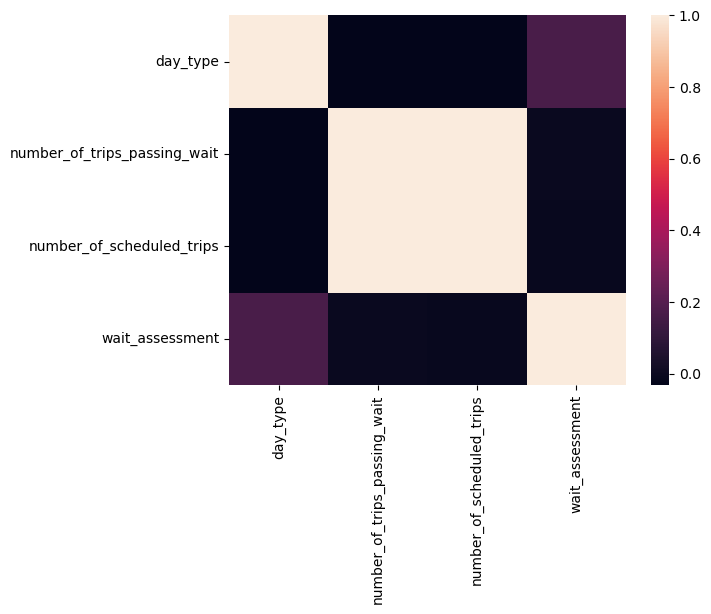

In [98]:
# Check the correlation between the columns
delays.corr()

# Print a correlation heatmap
sns.heatmap(delays.corr())

array([[<Axes: title={'center': 'day_type'}>,
        <Axes: title={'center': 'number_of_trips_passing_wait'}>],
       [<Axes: title={'center': 'number_of_scheduled_trips'}>,
        <Axes: title={'center': 'wait_assessment'}>]], dtype=object)

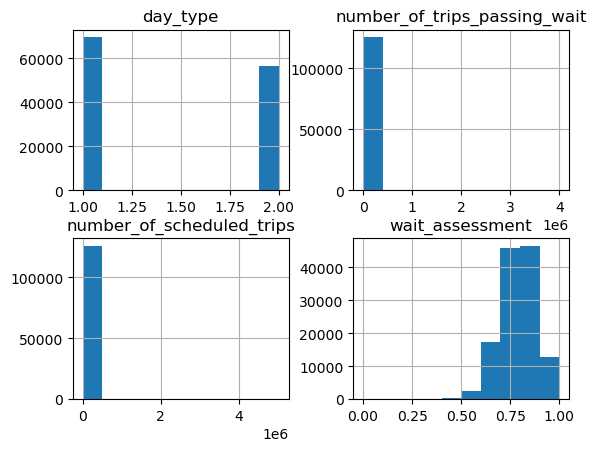

In [99]:
# Create histograms for the columns
delays.hist()

[Text(0.5, 1.0, 'Wait Assessment Distribution'),
 Text(0.5, 0, 'Wait Assessment'),
 Text(0, 0.5, 'Frequency')]

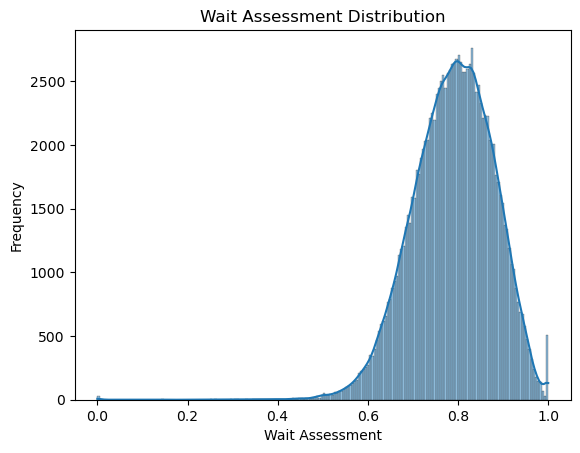

In [100]:
# Take the wait Assemsent column and plot a histogram
sns.histplot(delays['wait_assessment'], kde=True).set(title='Wait Assessment Distribution', xlabel='Wait Assessment', ylabel='Frequency')

[Text(0.5, 1.0, 'Wait Assessment Boxplot'), Text(0.5, 0, 'Wait Assessment')]

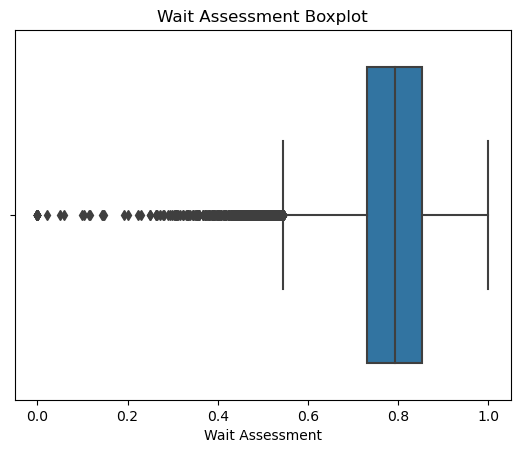

In [101]:
# Take the wait Assemsent column and plot a boxplot
sns.boxplot(x=delays["wait_assessment"]).set(title='Wait Assessment Boxplot', xlabel='Wait Assessment')

In [102]:
# Test if the wait_assessment column is normally distributed
stat, p = shapiro(delays['wait_assessment'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


c:\Users\Paul\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [103]:
# Print the percentiles of the wait_assessment column
print(delays["wait_assessment"].quantile([0.25, 0.5, 0.75]))

0.25    0.730053
0.50    0.793640
0.75    0.853152
Name: wait_assessment, dtype: float64


In [104]:
# Print the mean, median and mode of the wait_assessment column with explanations for their meaning
print(f"The mean of the wait_assessment column is {delays['wait_assessment'].mean()}. \
    The mean is the average of the wait_assessment column. \
    It is the sum of all the values in the wait_assessment column divided by the number of values in the wait_assessment column.")

print(f"The median of the wait_assessment column is {delays['wait_assessment'].median()}. \
      The median is the middle value of the wait_assessment column. \
      It is the value that splits the wait_assessment column into two halves.")


The mean of the wait_assessment column is 0.788823304218715.     The mean is the average of the wait_assessment column.     It is the sum of all the values in the wait_assessment column divided by the number of values in the wait_assessment column.
The median of the wait_assessment column is 0.7936395035.       The median is the middle value of the wait_assessment column.       It is the value that splits the wait_assessment column into two halves.


In [105]:

# Print the skewness and kurtosis of the wait_assessment column with explanations for their meaning
print(f"The skewness of the wait_assessment column is {delays['wait_assessment'].skew()}. \
    A skewness of 0 means the wait_assessment column is normally distributed. \
    A skewness less than 0 means the wait_assessment column is left skewed. \
    A skewness greater than 0 means the wait_assessment column is right skewed.")

print(f"The kurtosis of the wait_assessment column is {delays['wait_assessment'].kurt()}. \
    The kurtosis is a measure of the tailedness of the wait_assessment column. \
    A kurtosis of 0 means the wait_assessment column has the same tailedness as a normal distribution. \
    A kurtosis less than 0 means the wait_assessment column is platykurtic. \
    A kurtosis greater than 0 means the wait_assessment column is leptokurtic.")



The skewness of the wait_assessment column is -0.5492081964230715.     A skewness of 0 means the wait_assessment column is normally distributed.     A skewness less than 0 means the wait_assessment column is left skewed.     A skewness greater than 0 means the wait_assessment column is right skewed.
The kurtosis of the wait_assessment column is 1.88197066625342.     The kurtosis is a measure of the tailedness of the wait_assessment column.     A kurtosis of 0 means the wait_assessment column has the same tailedness as a normal distribution.     A kurtosis less than 0 means the wait_assessment column is platykurtic.     A kurtosis greater than 0 means the wait_assessment column is leptokurtic.


<Axes: xlabel='date'>

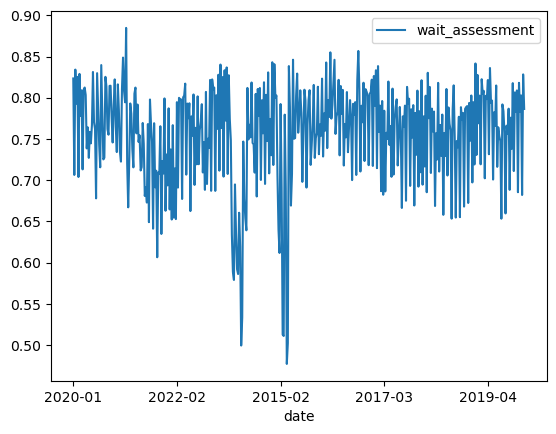

In [106]:
# Create a time series plot for the wait assessment data where the route_id is BX1
delays[delays["route_id"] == 'BX1'].plot(x="date", y="wait_assessment")

In [107]:
# Create a df with the wait assessment data where the wait_assessment is an average of the wait_assessment column grouped by the year and month columns
delays2 = delays.groupby(["year", "month"]).agg({"wait_assessment": "mean"}).reset_index()

array([[<Axes: title={'center': 'wait_assessment'}>]], dtype=object)

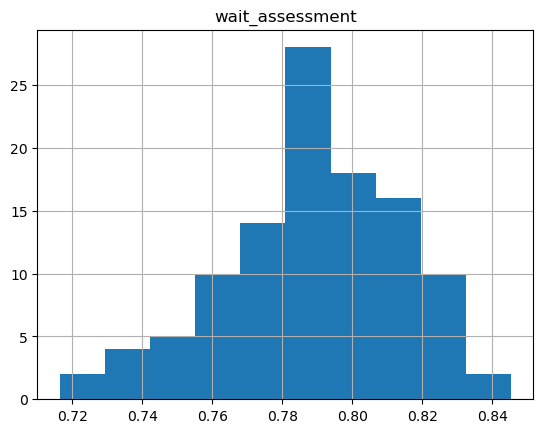

In [108]:
# Display histogram of the wait_assessment column
delays2.hist()

<Axes: xlabel='year'>

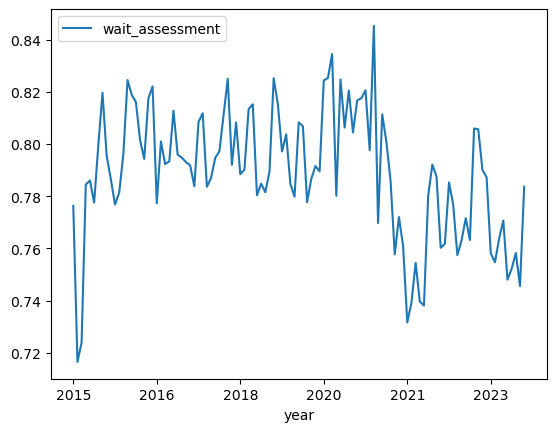

In [109]:
# Create a time series plot for the wait assessment data
delays2.plot(x="year", y="wait_assessment")

In [110]:
# Group the dataframe by the date column, giving the mean of the wait_assessment column
timeeda = delays.groupby("date").agg({"wait_assessment": "mean"}).reset_index()

In [111]:
# Convert the date column to a datetime object
timeeda["date"] = pd.to_datetime(timeeda["date"])

# Move the date column to the index
timeeda = timeeda.set_index("date")

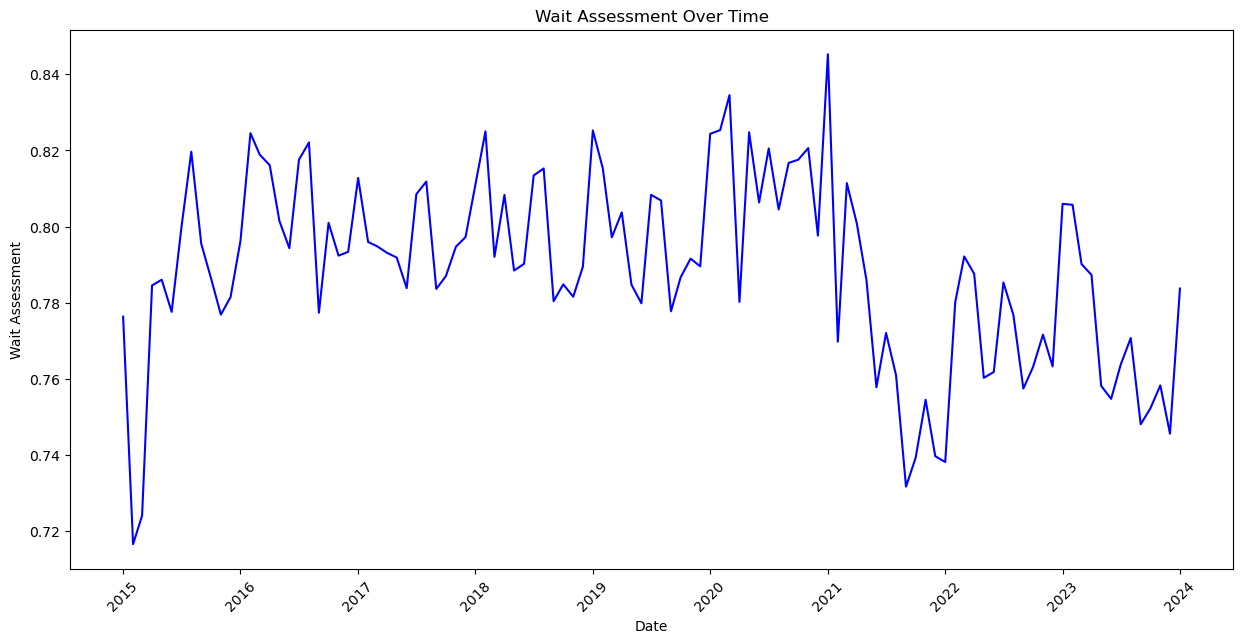

In [112]:
# Plot the Time Series
plt.figure(figsize=(15, 7))
plt.plot(timeeda.index, timeeda["wait_assessment"], color="blue")
plt.title("Wait Assessment Over Time")
plt.xlabel("Date")
plt.ylabel("Wait Assessment")
plt.xticks(rotation=45)
plt.show()

In [113]:
timeeda.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01',
               ...
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01'],
              dtype='datetime64[ns]', name='date', length=109, freq=None)

Perform EDA on the traffic data

In [114]:
# Perform EDA on the traffic dataframe
traffic.describe(include='all')

,year,month,location_id,direction,value_type,value,data_source
count,15751.000000,15751.000000,15751.0,11061,15751,1.575100e+04,15751
unique,NaN,NaN,1440.0,16,3,NaN,5
top,NaN,NaN,3.0,I,vehicle_count,NaN,volume_count_small
freq,NaN,NaN,372.0,3094,11715,NaN,4967
mean,2016.742048,6.996889,NaN,NaN,NaN,6.909708e+05,NaN
std,3.486017,3.551479,NaN,NaN,NaN,1.773847e+06,NaN
min,2000.000000,1.000000,NaN,NaN,NaN,0.000000e+00,NaN
25%,2014.000000,4.000000,NaN,NaN,NaN,5.326932e+02,NaN
50%,2018.000000,8.000000,NaN,NaN,NaN,8.857300e+04,NaN
75%,2019.000000,10.000000,NaN,NaN,NaN,9.999410e+05,NaN


<Axes: >

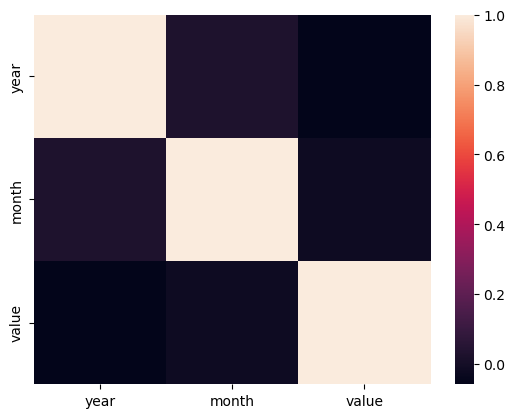

In [115]:
# Check the correlation between the columns
traffic.corr()

# Print a correlation heatmap

sns.heatmap(traffic.corr())

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'value'}>, <Axes: >]], dtype=object)

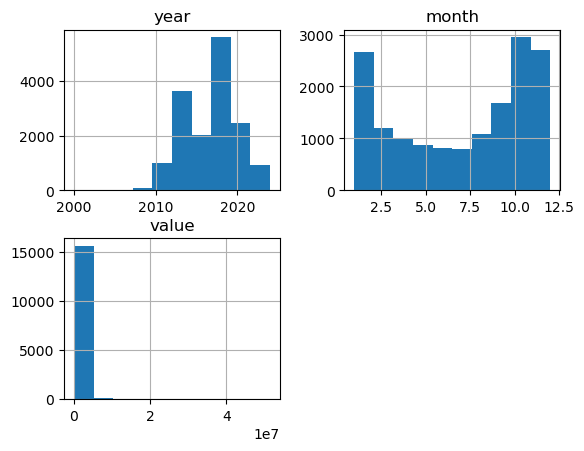

In [116]:
# Create histograms for the columns
traffic.hist()

<Axes: xlabel='year'>

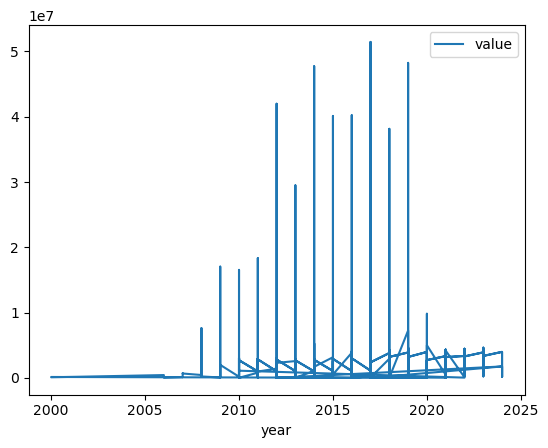

In [117]:
# Create a time series plot for the traffic data
traffic.plot(x="year", y="value")

In [118]:
# Print the value counts for the value_type column
traffic["value_type"].value_counts()

vehicle_count    11715
speed             2018
travel_time       2018
Name: value_type, dtype: int64

In [119]:
# Take only the rows where the value_type is vehicle_count
traffic2 = traffic[traffic["value_type"] == "vehicle_count"]

In [120]:
traffic_speed = traffic[traffic["value_type"] == "speed"]

In [121]:
traffic_time = traffic[traffic["value_type"] == "travel_time"]

In [122]:
# Describe the dataframe
traffic_speed.describe(include="all")

,year,month,location_id,direction,value_type,value,data_source
count,2018.000000,2018.000000,2018.0,0,2018,2018.000000,2018
unique,NaN,NaN,139.0,0,1,NaN,1
top,NaN,NaN,4329473.0,NaN,speed,NaN,traffic_speeds
freq,NaN,NaN,18.0,NaN,2018,NaN,2018
mean,2019.252230,6.423687,NaN,NaN,NaN,35.865531,NaN
std,0.447887,3.370138,NaN,NaN,NaN,15.429251,NaN
min,2017.000000,1.000000,NaN,NaN,NaN,0.000000,NaN
25%,2019.000000,3.000000,NaN,NaN,NaN,26.920289,NaN
50%,2019.000000,7.000000,NaN,NaN,NaN,39.669432,NaN
75%,2020.000000,9.000000,NaN,NaN,NaN,47.172769,NaN


In [123]:
# Find the minimum and maximum year
print(traffic_speed["year"].min())
print(traffic_speed["year"].max())

print(traffic_time["year"].min())
print(traffic_time["year"].max())

print(traffic2["year"].min())
print(traffic2["year"].max())

2017
2020
2017
2020
2000
2024


In [124]:
print(traffic2["year"].min())
print(traffic2["year"].max())

2000
2024


In [125]:
# Describe the dataframe
traffic2.describe(include="all")

,year,month,location_id,direction,value_type,value,data_source
count,11715.000000,11715.000000,11715.0,11061,11715,1.171500e+04,11715
unique,NaN,NaN,1301.0,16,1,NaN,4
top,NaN,NaN,3.0,I,vehicle_count,NaN,volume_count_small
freq,NaN,NaN,372.0,3094,11715,NaN,4967
mean,2015.877251,7.194366,NaN,NaN,NaN,9.289787e+05,NaN
std,3.653947,3.590989,NaN,NaN,NaN,2.002389e+06,NaN
min,2000.000000,1.000000,NaN,NaN,NaN,1.070000e+02,NaN
25%,2013.000000,4.000000,NaN,NaN,NaN,5.196600e+04,NaN
50%,2015.000000,9.000000,NaN,NaN,NaN,3.432440e+05,NaN
75%,2019.000000,10.000000,NaN,NaN,NaN,1.242288e+06,NaN


In [126]:
# Create a seperate dataframe for the traffic data where the location_id is 3
traffic3 = traffic2[traffic2["location_id"] == 3]

In [127]:
# Describe the dataframe
traffic3.describe(include="all")

,year,month,location_id,direction,value_type,value,data_source
count,372.000000,372.000000,372.0,372,372,3.720000e+02,372
unique,NaN,NaN,1.0,2,1,NaN,2
top,NaN,NaN,3.0,I,vehicle_count,NaN,hourly_traffic
freq,NaN,NaN,372.0,186,372,NaN,186
mean,2013.387097,6.354839,NaN,NaN,NaN,1.705365e+06,NaN
std,2.241641,3.411239,NaN,NaN,NaN,1.920130e+05,NaN
min,2010.000000,1.000000,NaN,NaN,NaN,1.227162e+06,NaN
25%,2011.000000,3.000000,NaN,NaN,NaN,1.570882e+06,NaN
50%,2013.000000,6.000000,NaN,NaN,NaN,1.700383e+06,NaN
75%,2015.000000,9.000000,NaN,NaN,NaN,1.839980e+06,NaN


In [128]:
# Take value counts of the data_source column
traffic3["data_source"].value_counts()

hourly_traffic    186
daily_traffic     186
Name: data_source, dtype: int64

In [129]:
# Create seperate dataframes for the traffic data where the data_source is hourly_traffic and daily_traffic
traffic_hourly = traffic3[traffic3["data_source"] == "hourly_traffic"]

In [130]:
# Get the sum of the value column grouped by the year and month columns
traffic3 = traffic3.groupby(["year", "month"]).agg({"value": "sum"}).reset_index()

In [131]:
# Create a date column by combining the year and month columns
traffic3["date"] = traffic3["year"].astype(str) + "-" + traffic3["month"].astype(str)

# Convert the date column to a date data type
traffic3["date"] = pd.to_datetime(traffic3["date"])

<Axes: xlabel='date'>

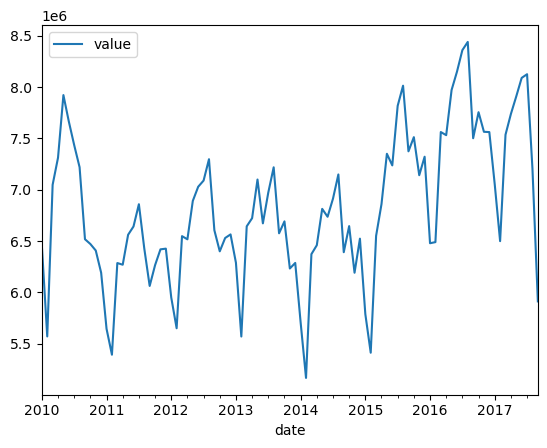

In [132]:
# Create a time series plot for the traffic data with year and month on the x-axis and value on the y-axis
traffic3.plot(x="date", y="value")

Perform EDA on the weather data

<Axes: >

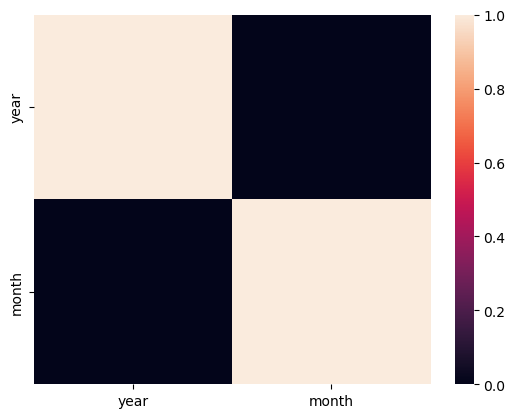

In [133]:
# Perform EDA on the weather dataframe
weather.describe(include='all')


# Check the correlation between the columns
weather.corr()

# Print a correlation heatmap
sns.heatmap(weather.corr())

In [134]:
# Replace any alpha characters with null in the value column
weather["value"] = pd.to_numeric(weather["value"], errors="coerce")

In [135]:
# Show the number of null values in the value column grouped by the weather_type column
weather.groupby("weather_type").agg({"value": "count"})

,value
weather_type,
average_percipitation,289
avg_temp,288
max_precipitation,289
max_snow_depth,283
max_snowfall,254
max_temp,289
min_temp,289
total_percipitation,289
total_snow_depth,289


In [136]:
# Create a date column by combining the year and month columns
weather["date"] = weather["year"].astype(str) + "-" + weather["month"].astype(str)

# Convert the date column to a date data type
weather["date"] = pd.to_datetime(weather["date"])

<Axes: title={'center': 'total_snow_depth'}, xlabel='date'>

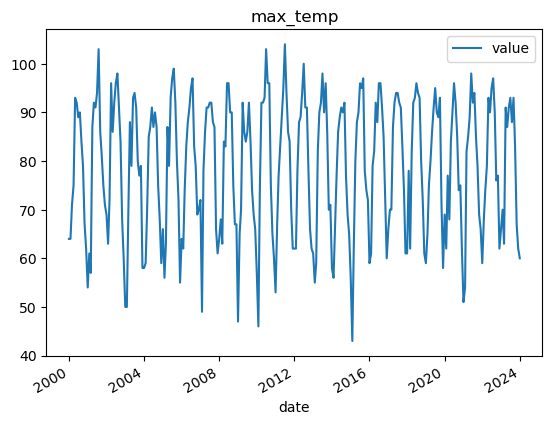

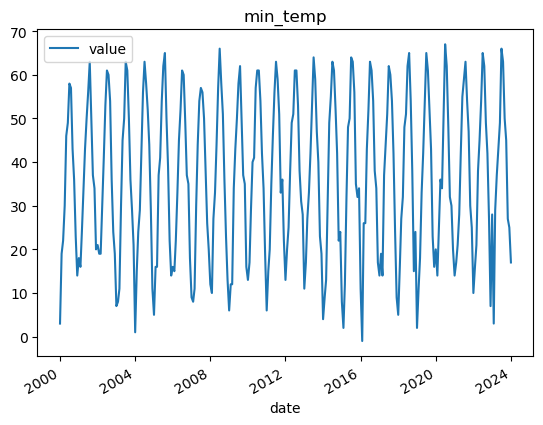

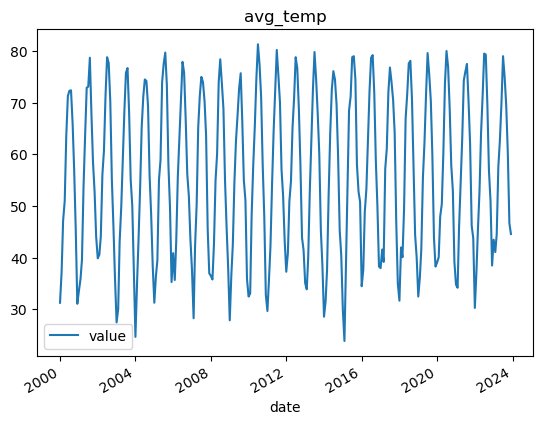

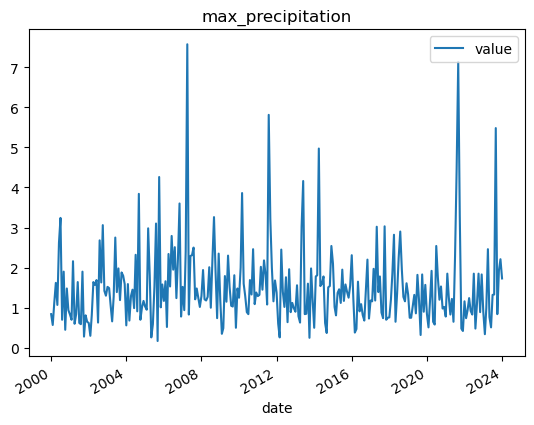

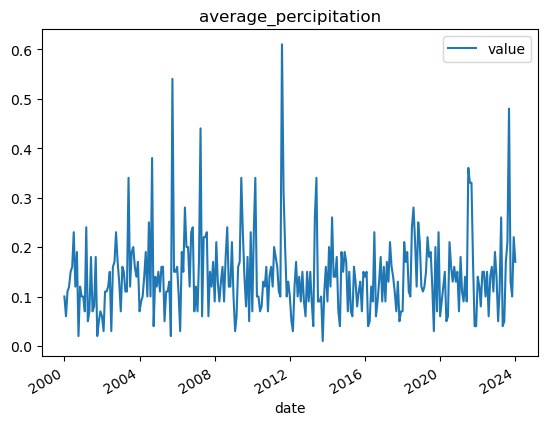

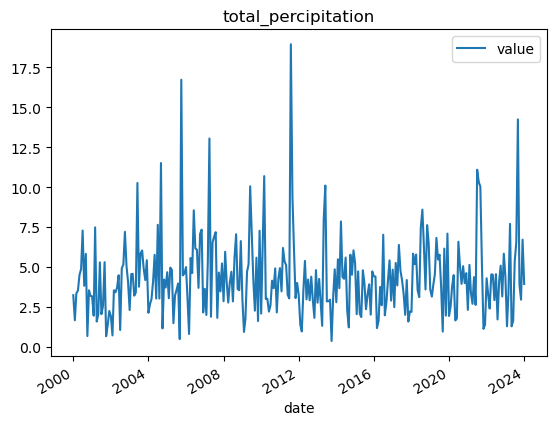

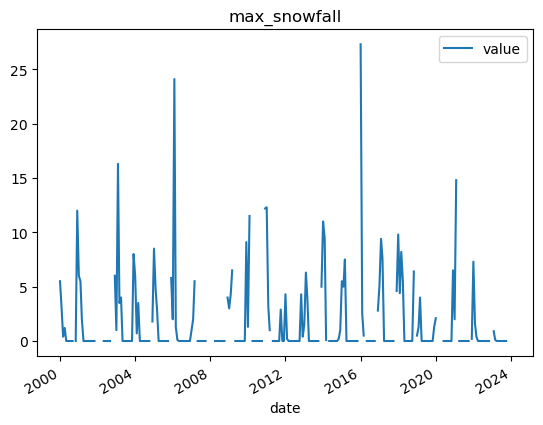

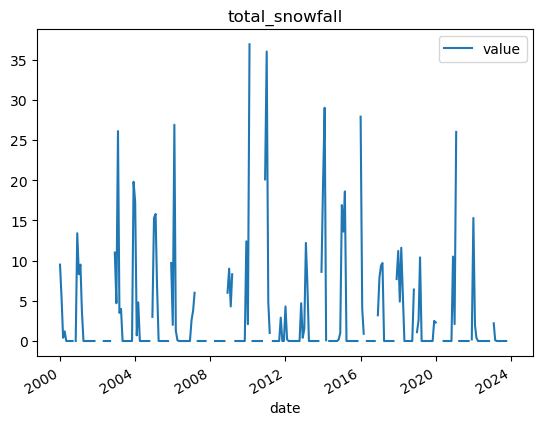

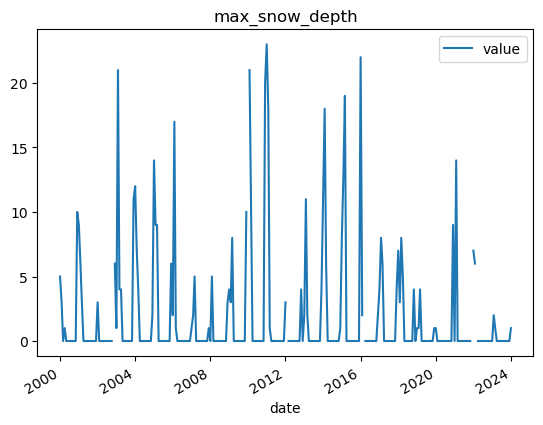

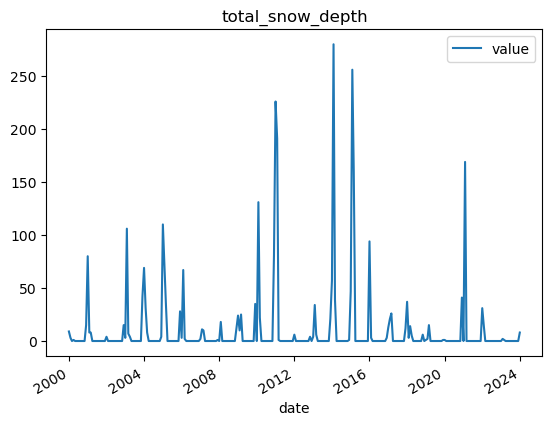

In [137]:
# Create a time series plot for the weather data with year and month on the x-axis and value on the y-axis where the weather_type is the title
weather[weather["weather_type"] == "max_temp"].plot(x="date", y="value", title="max_temp")
weather[weather["weather_type"] == "min_temp"].plot(x="date", y="value", title="min_temp")
weather[weather["weather_type"] == "avg_temp"].plot(x="date", y="value", title="avg_temp")
weather[weather["weather_type"] == "max_precipitation"].plot(x="date", y="value", title="max_precipitation")
weather[weather["weather_type"] == "average_percipitation"].plot(x="date", y="value", title="average_percipitation")
weather[weather["weather_type"] == "total_percipitation"].plot(x="date", y="value", title="total_percipitation")
weather[weather["weather_type"] == "max_snowfall"].plot(x="date", y="value", title="max_snowfall")
weather[weather["weather_type"] == "total_snowfall"].plot(x="date", y="value", title="total_snowfall")
weather[weather["weather_type"] == "max_snow_depth"].plot(x="date", y="value", title="max_snow_depth")
weather[weather["weather_type"] == "total_snow_depth"].plot(x="date", y="value", title="total_snow_depth")


In [138]:
# Fill in null values with interpolation
weather["value"] = weather.groupby("weather_type")["value"].transform(lambda x: x.interpolate())

# Check if there are any remaining null values
weather.isnull().sum()

year            0
month           0
weather_type    0
value           0
date            0
dtype: int64

In [139]:
# Select the value counts for the weather_type column
weather["weather_type"].value_counts()

average_percipitation    300
max_precipitation        300
max_snow_depth           300
max_snowfall             300
max_temp                 300
min_temp                 300
total_percipitation      300
total_snow_depth         300
total_snowfall           300
avg_temp                 288
Name: weather_type, dtype: int64

In [140]:
# Find the date range for avg_temp and max_temp weather types
print(weather[weather["weather_type"] == "avg_temp"]["date"].min())
print(weather[weather["weather_type"] == "avg_temp"]["date"].max())

print(weather[weather["weather_type"] == "max_temp"]["date"].min())
print(weather[weather["weather_type"] == "max_temp"]["date"].max())


2000-01-01 00:00:00
2023-12-01 00:00:00
2000-01-01 00:00:00
2024-12-01 00:00:00


In [141]:
# create an avg_temp dataframe and a max_temp dataframe
avg_temp = weather[weather["weather_type"] == "avg_temp"]
max_temp = weather[weather["weather_type"] == "max_temp"]

In [142]:
# Convert the month column to a float data type
avg_temp["month"] = avg_temp["month"].astype(float)

# describe the avg_temp dataframe
avg_temp.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\951554189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_temp["month"] = avg_temp["month"].astype(float)
C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\951554189.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  avg_temp.describe(include="all")


,year,month,weather_type,value,date
count,288.000000,288.000000,288,288.000000,288
unique,NaN,NaN,1,NaN,288
top,NaN,NaN,avg_temp,NaN,2000-01-01 00:00:00
freq,NaN,NaN,288,NaN,1
first,NaN,NaN,NaN,NaN,2000-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2023-12-01 00:00:00
mean,2011.500000,6.500000,NaN,55.886111,NaN
std,6.934236,3.458061,NaN,15.537295,NaN
min,2000.000000,1.000000,NaN,23.900000,NaN
25%,2005.750000,3.750000,NaN,41.925000,NaN


In [143]:
# Print the year and the month values, ordered by year and month
avg_temp.sort_values(["year", "month"])

,year,month,weather_type,value,date
25,2000,1.0,avg_temp,31.3,2000-01-01
274,2000,2.0,avg_temp,37.3,2000-02-01
523,2000,3.0,avg_temp,47.2,2000-03-01
772,2000,4.0,avg_temp,51.0,2000-04-01
1021,2000,5.0,avg_temp,63.5,2000-05-01
...,...,...,...,...,...
1791,2023,8.0,avg_temp,75.0,2023-08-01
2040,2023,9.0,avg_temp,69.4,2023-09-01
2289,2023,10.0,avg_temp,60.5,2023-10-01
2538,2023,11.0,avg_temp,46.7,2023-11-01


In [144]:
# Remove any rows where the date is after 2023-12-01
weather = weather[weather["date"] <= "2023-12-01"]

In [145]:
# Describe the weather dataframe
weather.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\1979264411.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  weather.describe(include="all")


,year,month,weather_type,value,date
count,2880.000000,2880.000000,2880,2880.000000,2880
unique,NaN,NaN,10,NaN,288
top,NaN,NaN,average_percipitation,NaN,2000-01-01 00:00:00
freq,NaN,NaN,288,NaN,10
first,NaN,NaN,NaN,NaN,2000-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2023-12-01 00:00:00
mean,2011.500000,6.500000,NaN,19.369999,NaN
std,6.923389,3.452652,NaN,30.161350,NaN
min,2000.000000,1.000000,NaN,-1.000000,NaN
25%,2005.750000,3.750000,NaN,0.000000,NaN


In [146]:
# Perform Value Counts on the weather_type column
weather["weather_type"].value_counts()

average_percipitation    288
avg_temp                 288
max_precipitation        288
max_snow_depth           288
max_snowfall             288
max_temp                 288
min_temp                 288
total_percipitation      288
total_snow_depth         288
total_snowfall           288
Name: weather_type, dtype: int64

# Statistical Analysis

In [147]:
delays.describe(include='all')

,date,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment,year,month
count,125942,125942,125942.000000,125942,125942,125942,1.259420e+05,1.259420e+05,125396.000000,125942,125942
unique,109,7,NaN,4,369,3,NaN,NaN,NaN,10,12
top,2022-01,Queens,NaN,LCL/LTD,BX1,Off-Peak,NaN,NaN,NaN,2023,01
freq,1279,40833,NaN,97367,436,62868,NaN,NaN,NaN,14073,12189
mean,NaN,NaN,1.447404,NaN,NaN,NaN,7.264366e+03,9.353320e+03,0.788823,NaN,NaN
std,NaN,NaN,0.497228,NaN,NaN,NaN,9.912570e+04,1.278139e+05,0.089828,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,8.580000e+02,1.097000e+03,0.730053,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,2.115500e+03,2.708500e+03,0.793640,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,4.721000e+03,6.252750e+03,0.853152,NaN,NaN


In [148]:
# Remove the rows where period is Systemwide

delays_clean = delays[delays["period"] != "Systemwide"]

In [149]:
# Remove the rows where borough is Systemwide or Misc
delays_clean = delays_clean[delays_clean["borough"] != "Systemwide"]
delays_clean = delays_clean[delays_clean["borough"] != "Misc"]

In [150]:
delays_clean.describe(include='all')

,date,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment,year,month
count,125706,125706,125706.000000,125706,125706,125706,125706.000000,125706.000000,125160.000000,125706,125706
unique,109,5,NaN,3,367,2,NaN,NaN,NaN,10,12
top,2022-01,Queens,NaN,LCL/LTD,BX1,Off-Peak,NaN,NaN,NaN,2023,01
freq,1275,40833,NaN,97349,436,62859,NaN,NaN,NaN,14049,12167
mean,NaN,NaN,1.447298,NaN,NaN,NaN,3638.955499,4685.360341,0.788872,NaN,NaN
std,NaN,NaN,0.497217,NaN,NaN,NaN,4382.327473,5542.171763,0.089856,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,856.000000,1095.000000,0.729985,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,2110.000000,2701.000000,0.793720,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,4700.750000,6223.750000,0.853278,NaN,NaN


In [151]:
# Create an anova_delays df grouped by the date, bourough, route id, and period, with the mean of the wait_assessment column
anova_delays = delays_clean

Check Assumptions

In [152]:
# Group Delays_clean by date, borough and period and get the mean of the wait_assessment column
delays_clean = delays_clean.groupby(["date", "borough", "period"]).agg({"wait_assessment": "mean"}).reset_index()

In [153]:
# Print value counts for the period and borough columns
delays_clean["period"].value_counts()

Off-Peak    545
Peak        545
Name: period, dtype: int64

In [154]:
delays_clean.describe(include='all')

,date,borough,period,wait_assessment
count,1090,1090,1090,1090.000000
unique,109,5,2,NaN
top,2015-01,Bronx,Off-Peak,NaN
freq,10,218,545,NaN
mean,NaN,NaN,NaN,0.788535
std,NaN,NaN,NaN,0.050126
min,NaN,NaN,NaN,0.617315
25%,NaN,NaN,NaN,0.753713
50%,NaN,NaN,NaN,0.789689
75%,NaN,NaN,NaN,0.827437


In [155]:
anova_delays.describe(include='all')

,date,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment,year,month
count,125706,125706,125706.000000,125706,125706,125706,125706.000000,125706.000000,125160.000000,125706,125706
unique,109,5,NaN,3,367,2,NaN,NaN,NaN,10,12
top,2022-01,Queens,NaN,LCL/LTD,BX1,Off-Peak,NaN,NaN,NaN,2023,01
freq,1275,40833,NaN,97349,436,62859,NaN,NaN,NaN,14049,12167
mean,NaN,NaN,1.447298,NaN,NaN,NaN,3638.955499,4685.360341,0.788872,NaN,NaN
std,NaN,NaN,0.497217,NaN,NaN,NaN,4382.327473,5542.171763,0.089856,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,856.000000,1095.000000,0.729985,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,2110.000000,2701.000000,0.793720,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,4700.750000,6223.750000,0.853278,NaN,NaN


In [156]:
import numpy as np
from scipy.stats import levene

# Assuming your DataFrame is named df
# Drop rows with NaN values in 'wait_assessment' column
anova_delays_cleaned = anova_delays.dropna(subset=['wait_assessment'])

# Group the cleaned data
grouped_data = anova_delays_cleaned.groupby(['borough', 'period'])['wait_assessment']

# Convert the grouped data to a list of arrays
data = [group.values for name, group in grouped_data]

# Perform Levene's test
statistic, p_value = levene(*data)

# Check the result
if np.isnan(statistic) or np.isnan(p_value):
    print("Unable to perform Levene's test due to NaN values in the data.")
elif p_value > 0.05:
    print("Homogeneity of variances is satisfied (p > 0.05)")
else:
    print("Homogeneity of variances is not satisfied (p <= 0.05)")


Homogeneity of variances is not satisfied (p <= 0.05)


In [157]:
print(statistic, p_value)

287.65754383554815 0.0


In [158]:
grouped_data = anova_delays.groupby(['borough', 'period'])['wait_assessment']

for name, group in grouped_data:
    # Perform Shapiro-Wilk test for normality
    stat, p_value = shapiro(group)
    
    # Check the result
    if p_value > 0.05:
        print(f"Data for {name} is normally distributed (p > 0.05)")
    else:
        print(f"Data for {name} is not normally distributed (p <= 0.05)")


Data for ('Bronx', 'Off-Peak') is normally distributed (p > 0.05)
Data for ('Bronx', 'Peak') is not normally distributed (p <= 0.05)
Data for ('Brooklyn', 'Off-Peak') is not normally distributed (p <= 0.05)
Data for ('Brooklyn', 'Peak') is not normally distributed (p <= 0.05)
Data for ('Manhattan', 'Off-Peak') is normally distributed (p > 0.05)
Data for ('Manhattan', 'Peak') is not normally distributed (p <= 0.05)
Data for ('Queens', 'Off-Peak') is normally distributed (p > 0.05)
Data for ('Queens', 'Peak') is normally distributed (p > 0.05)
Data for ('Staten Island', 'Off-Peak') is normally distributed (p > 0.05)
Data for ('Staten Island', 'Peak') is normally distributed (p > 0.05)


c:\Users\Paul\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [159]:
# Create a table showing the result of the Shapiro-Wilk test for normality for each group
shapiro_table = pd.DataFrame(columns=["group", "p_value"])

for name, group in grouped_data:
    stat, p_value = shapiro(group)
    shapiro_table = shapiro_table.append({"group": name, "p_value": p_value}, ignore_index=True)


c:\Users\Paul\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\818047946.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shapiro_table = shapiro_table.append({"group": name, "p_value": p_value}, ignore_index=True)
c:\Users\Paul\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\818047946.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shapiro_table = shapiro_table.append({"group": name, "p_value": p_value}, ignore_index=True)
c:\Users\Paul\anaconda3\lib\site-pac

In [160]:
# export the shapiro_table to a csv file
shapiro_table.to_csv("shapiro_table.csv", index=False)

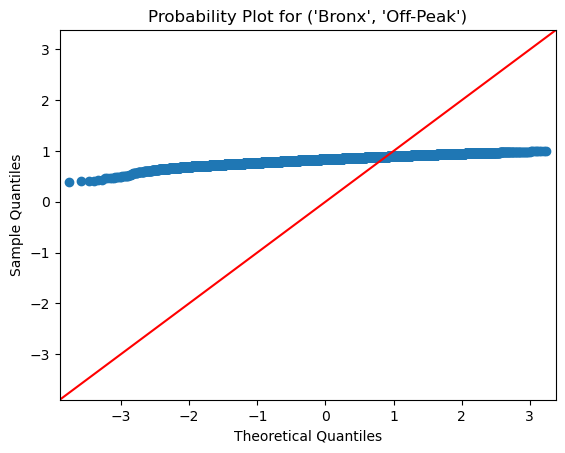

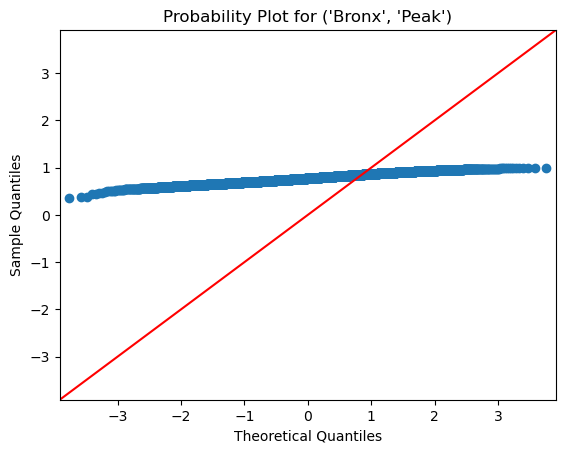

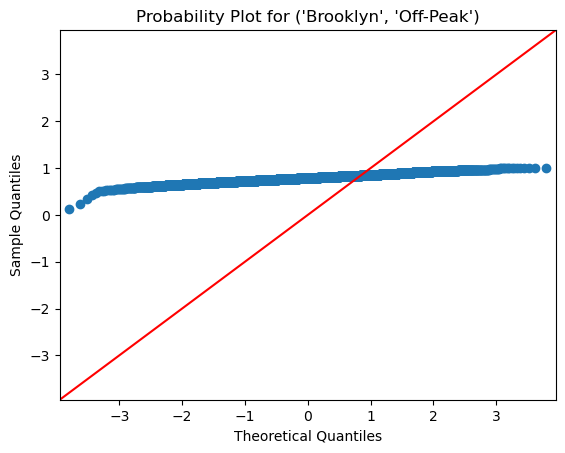

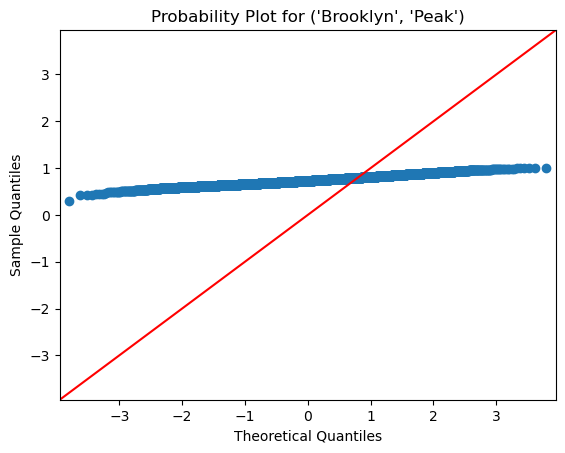

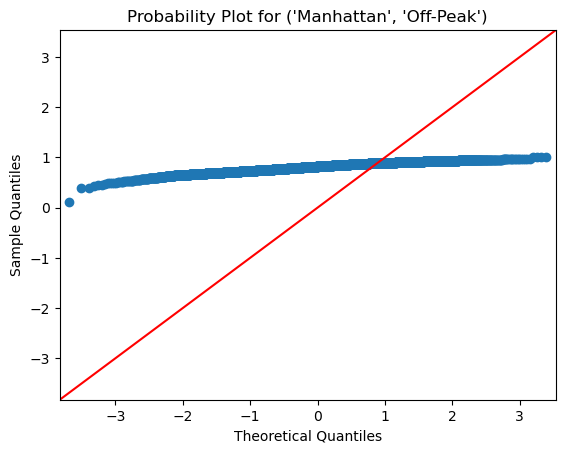

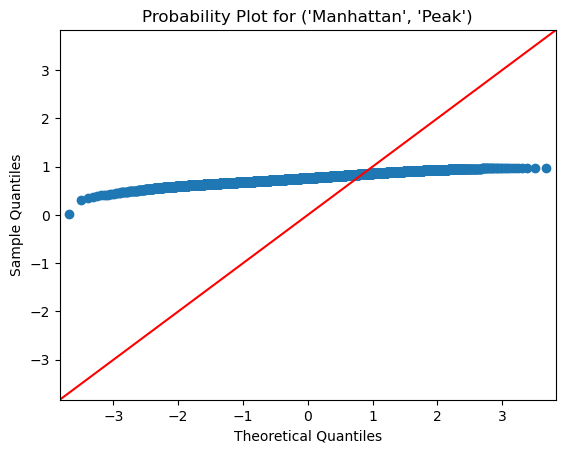

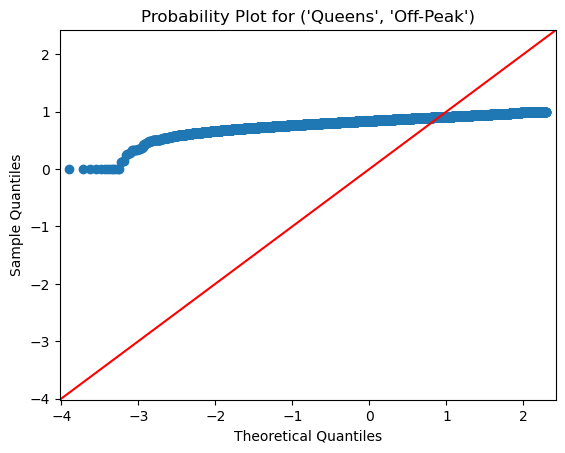

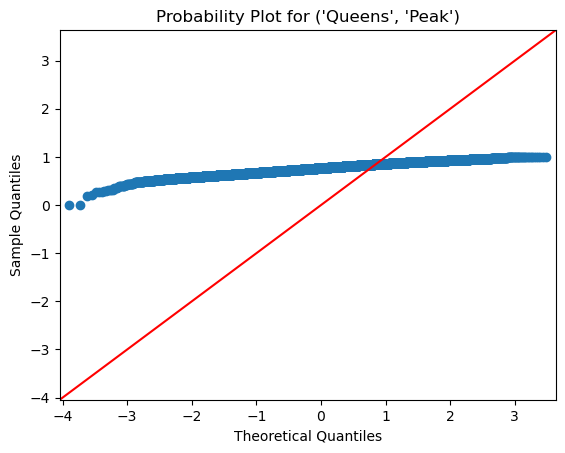

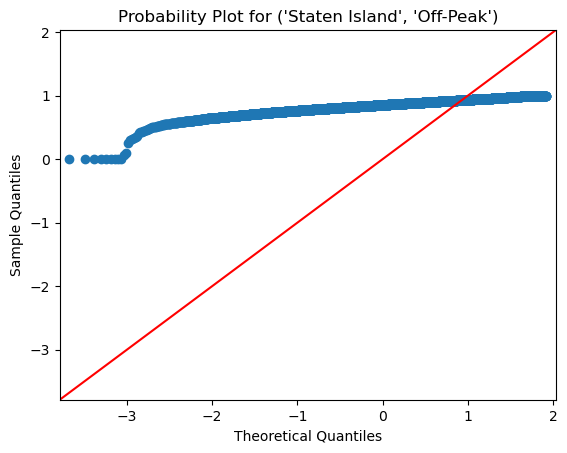

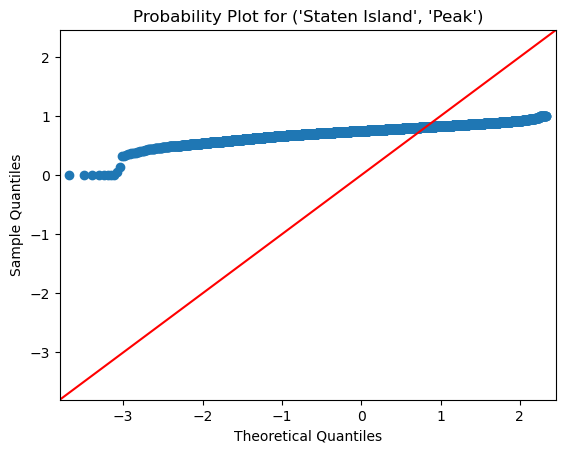

In [161]:
# Create probability plots for the wait_assessment column grouped by the period and borough columns
for name, group in grouped_data:
    sm.qqplot(group, line ='45')
    plt.title(f"Probability Plot for {name}")
    plt.show()

Visualise the groupings

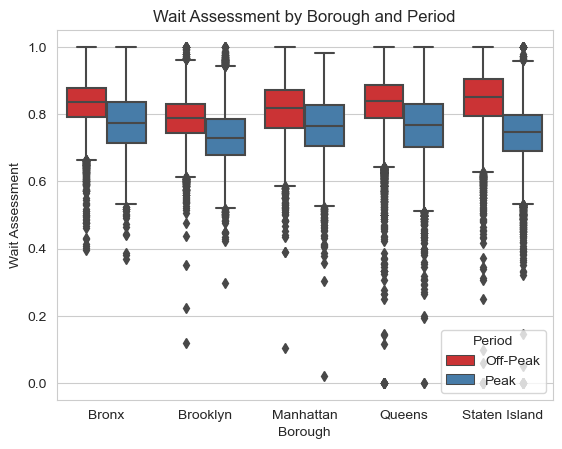

In [162]:
# Generate a boxplot of the wait_assessment column grouped by the borough and period columns
sns.set_style("whitegrid")
sns.boxplot(x="borough", y="wait_assessment", hue="period", data=anova_delays, palette="Set1")
plt.xlabel('Borough')
plt.ylabel('Wait Assessment')
plt.title('Wait Assessment by Borough and Period')
plt.legend(title='Period', loc='lower right')
plt.show()

In [163]:
# Print the mean and standard deviation for each borough and period combination
for x in anova_delays['borough'].unique():
    for y in anova_delays['period'].unique():
        print(x, y, "Mean :", round(anova_delays[(anova_delays['borough'] == x) & (anova_delays['period'] == y)]['wait_assessment'].mean(),2))
        print(x, y, "Standard Deviation :", round(anova_delays[(anova_delays['borough'] == x) & (anova_delays['period'] == y)]['wait_assessment'].std(),2),'\n')

Bronx Off-Peak Mean : 0.83
Bronx Off-Peak Standard Deviation : 0.07 

Bronx Peak Mean : 0.78
Bronx Peak Standard Deviation : 0.08 

Brooklyn Off-Peak Mean : 0.79
Brooklyn Off-Peak Standard Deviation : 0.07 

Brooklyn Peak Mean : 0.73
Brooklyn Peak Standard Deviation : 0.08 

Manhattan Off-Peak Mean : 0.81
Manhattan Off-Peak Standard Deviation : 0.08 

Manhattan Peak Mean : 0.77
Manhattan Peak Standard Deviation : 0.09 

Queens Off-Peak Mean : 0.83
Queens Off-Peak Standard Deviation : 0.08 

Queens Peak Mean : 0.76
Queens Peak Standard Deviation : 0.09 

Staten Island Off-Peak Mean : 0.84
Staten Island Off-Peak Standard Deviation : 0.09 

Staten Island Peak Mean : 0.74
Staten Island Peak Standard Deviation : 0.09 



In [164]:
# Create a table with the mean and standard deviation for each borough and period combination and save it to a csv file
anova_delays.groupby(['borough', 'period'])['wait_assessment'].agg(['mean', 'std']).to_csv("delays_mean_stddev.csv")

In [165]:
# Check the data types of the columns
print(anova_delays.dtypes)

date                             object
borough                          object
day_type                          int64
trip_type                        object
route_id                         object
period                           object
number_of_trips_passing_wait      int64
number_of_scheduled_trips         int64
wait_assessment                 float64
year                             object
month                            object
dtype: object


In [166]:
# Transform borough and period to categorical data types
anova_delays["borough"] = anova_delays["borough"].astype("category")
anova_delays["period"] = anova_delays["period"].astype("category")

Perform an ANOVA on the delay data

In [167]:
# Perform two-way ANOVA
# The effect of borough, the effect of period, and the interaction between borough and period
model = ols('wait_assessment ~ borough + period + borough:period', data = anova_delays).fit()
aov2 = sm.stats.anova_lm(model, type=2)
print(aov2, '\n')

# print the results of the two-way ANOVA hypothesis tests
print(f"Borough p-value: {aov2['PR(>F)'][0]:.4f}")
print(f"Period p-value: {aov2['PR(>F)'][1]:.4f}")
print(f"Interaction p-value: {aov2['PR(>F)'][2]:.4f}", '\n')

# Print the results of the two-way ANOVA hypothesis tests
if aov2['PR(>F)'][0] < 0.05:
    print("Reject null hypothesis - Significant differences exist between Borough groups.")
else:
    print("Accept null hypothesis - No significant difference between Borough groups.")
    
if aov2['PR(>F)'][1] < 0.05:
    print("Reject null hypothesis - Significant differences exist between Period groups.")
else:
    print("Accept null hypothesis - No significant difference between Period groups.")
    
if aov2['PR(>F)'][2] < 0.05:
    print("Reject null hypothesis - Interaction occurs between factors.")
else:
    print("Accept null hypothesis - No interaction occurs between factors.") 

                      df      sum_sq     mean_sq             F         PR(>F)
borough              4.0   30.945271    7.736318   1153.988317   0.000000e+00
period               1.0  132.091472  132.091472  19703.432637   0.000000e+00
borough:period       4.0    8.501662    2.125415    317.037717  6.439226e-272
Residual        125150.0  839.003440    0.006704           NaN            NaN 

Borough p-value: 0.0000
Period p-value: 0.0000
Interaction p-value: 0.0000 

Reject null hypothesis - Significant differences exist between Borough groups.
Reject null hypothesis - Significant differences exist between Period groups.
Reject null hypothesis - Interaction occurs between factors.


In [168]:
# Store to aov2 in a table and save it to a csv file
aov2.to_csv("aov2.csv")

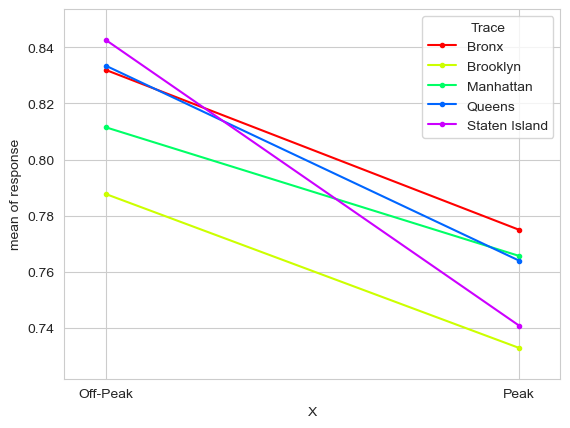

In [169]:
# Convert 'period' and 'borough' columns to string type
anova_delays['period'] = anova_delays['period'].astype(str)
anova_delays['borough'] = anova_delays['borough'].astype(str)

# Plot the interaction plot
fig = interaction_plot(x=anova_delays['period'].values, trace=anova_delays['borough'].values, response=anova_delays['wait_assessment'].values)
plt.show()

Perform Post Hoc Tests

In [170]:
# Perform a Tukey's Range Test to determine which groups are significantly different from each other
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's Range Test
tukey_results = pairwise_tukeyhsd(anova_delays['wait_assessment'], anova_delays['borough'], 0.05)

# Print the results
print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1      group2    meandiff p-adj lower upper reject
---------------------------------------------------------
    Bronx      Brooklyn      nan   nan   nan   nan  False
    Bronx     Manhattan      nan   nan   nan   nan  False
    Bronx        Queens      nan   nan   nan   nan  False
    Bronx Staten Island      nan   nan   nan   nan  False
 Brooklyn     Manhattan      nan   nan   nan   nan  False
 Brooklyn        Queens      nan   nan   nan   nan  False
 Brooklyn Staten Island      nan   nan   nan   nan  False
Manhattan        Queens      nan   nan   nan   nan  False
Manhattan Staten Island      nan   nan   nan   nan  False
   Queens Staten Island      nan   nan   nan   nan  False
---------------------------------------------------------


In [171]:
# Perform a Tukey's Range Test to determine which groups are significantly different from each other
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's Range Test
tukey_results = pairwise_tukeyhsd(anova_delays['wait_assessment'], anova_delays['period'], 0.05)

# Print the results
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1  group2 meandiff p-adj lower upper reject
-------------------------------------------------
Off-Peak   Peak      nan   nan   nan   nan  False
-------------------------------------------------


Perform Kruskal-Wallus Test for Periods

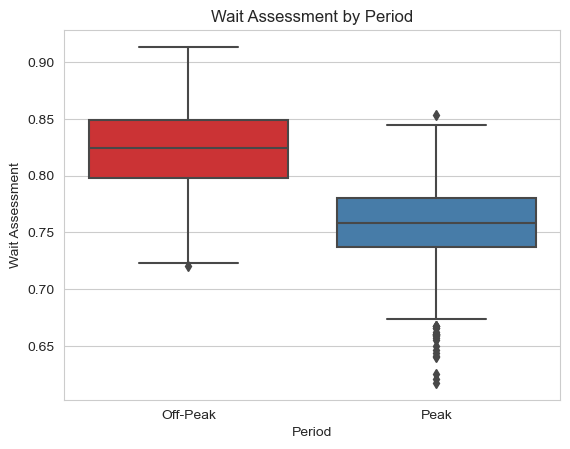

In [172]:
# Visualise the date distribution of the wait_assessment column
sns.set_style("whitegrid")
sns.boxplot(x="period", y="wait_assessment", data=delays_clean, palette="Set1")
plt.xlabel('Period')
plt.ylabel('Wait Assessment')
plt.title('Wait Assessment by Period')
plt.show()


In [173]:
# Perform Kruskal-Wallis test
stat, p = kruskal(*[delays_clean[delays_clean['period'] == rate]['wait_assessment'] for rate in delays_clean['period'].unique()])

# Print the results
print("Kruskal-Wallis Test Results:")
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Calculate the critical value for the significance level of 0.05
critical_value = chi2.ppf(1-0.05, 2)

print(f"Critical value: {critical_value:.4f}")

Kruskal-Wallis Test Results:
Test statistic: 501.7853
P-value: 0.0000
Critical value: 5.9915


In [174]:
# Perform post-hoc test
sp.posthoc_dunn([delays_clean[delays_clean['period'] == rate]['wait_assessment'] for rate in delays_clean['period'].unique()], p_adjust='holm')

,1,2
1,1.000000e+00,3.886167e-111
2,3.886167e-111,1.000000e+00


Perform Kruska-Wallis Test for Boroughs

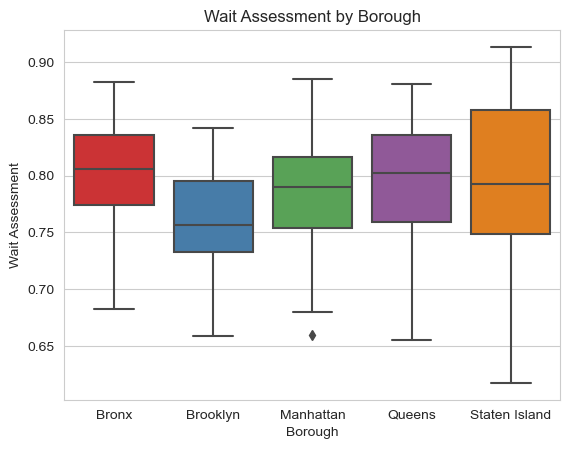

In [175]:
# Visualise the date distribution of the wait_assessment column
sns.set_style("whitegrid")
sns.boxplot(x="borough", y="wait_assessment", data=delays_clean, palette="Set1")
plt.xlabel('Borough')
plt.ylabel('Wait Assessment')
plt.title('Wait Assessment by Borough')
plt.show()

In [176]:
# Print the median value of the wait_assessment column grouped by the borough
print(delays_clean.groupby("borough")["wait_assessment"].median())

borough
Bronx            0.805468
Brooklyn         0.756645
Manhattan        0.790154
Queens           0.801950
Staten Island    0.792949
Name: wait_assessment, dtype: float64


In [177]:
# Perform Kruskal-Wallis test
stat, p = kruskal(*[delays_clean[delays_clean['borough'] == rate]['wait_assessment'] for rate in delays_clean['borough'].unique()])

# Print the results
print("Kruskal-Wallis Test Results:")
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Calculate the critical value for the significance level of 0.05
critical_value = chi2.ppf(1-0.05, 2)

print(f"Critical value: {critical_value:.4f}")

Kruskal-Wallis Test Results:
Test statistic: 108.6110
P-value: 0.0000
Critical value: 5.9915


In [178]:
# Perform post-hoc test
sp.posthoc_dunn([delays_clean[delays_clean['borough'] == rate]['wait_assessment'] for rate in delays_clean['borough'].unique()], p_adjust='holm')

,1,2,3,4,5
1,1.000000e+00,3.343980e-20,2.344918e-03,5.540795e-01,1.057392e-01
2,3.343980e-20,1.000000e+00,2.465957e-08,1.590501e-15,3.818290e-12
3,2.344918e-03,2.465957e-08,1.000000e+00,9.857358e-02,5.540795e-01
4,5.540795e-01,1.590501e-15,9.857358e-02,1.000000e+00,5.540795e-01
5,1.057392e-01,3.818290e-12,5.540795e-01,5.540795e-01,1.000000e+00


In [179]:
# Save the post-hoc test results to a table and export it to a csv file
sp.posthoc_dunn([delays_clean[delays_clean['borough'] == rate]['wait_assessment'] for rate in delays_clean['borough'].unique()], p_adjust='holm').to_csv("posthoc_dunn.csv")

# Which Weather Data to Use

Get Weather Data in wide format

In [180]:
# Melt the weather dataframe so all the weather types are in seperate columns, with only the date column remaining
weather_wide = weather.pivot(index="date", columns="weather_type", values="value")

In [181]:
# Describe the weather_wide dataframe
weather_wide.describe(include="all")

weather_type,average_percipitation,avg_temp,max_precipitation,max_snow_depth,max_snowfall,max_temp,min_temp,total_percipitation,total_snow_depth,total_snowfall
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.141458,55.886111,1.507639,1.998264,1.736458,78.819444,36.138889,4.304306,10.284722,2.882697
std,0.081176,15.537295,0.995853,4.460922,3.577990,13.686970,18.003721,2.480351,35.207927,6.086454
min,0.010000,23.900000,0.170000,0.000000,0.000000,43.000000,-1.000000,0.360000,0.000000,0.000000
25%,0.090000,41.925000,0.850000,0.000000,0.000000,67.000000,20.000000,2.790000,0.000000,0.000000
50%,0.130000,55.850000,1.290000,0.000000,0.000000,81.500000,36.000000,3.985000,0.000000,0.000000
75%,0.170000,71.000000,1.850000,1.000000,2.000000,91.000000,52.000000,5.292500,1.000000,2.925000
max,0.610000,81.300000,7.570000,23.000000,27.300000,104.000000,67.000000,18.950000,280.000000,36.900000


In [182]:
# Describe the delays dataframe
delays2.describe(include="all")

,year,month,wait_assessment
count,109,109,109.000000
unique,10,12,NaN
top,2015,01,NaN
freq,12,10,NaN
mean,NaN,NaN,0.788842
std,NaN,NaN,0.024998
min,NaN,NaN,0.716483
25%,NaN,NaN,0.776841
50%,NaN,NaN,0.790113
75%,NaN,NaN,0.806845


In [183]:
# create a date column by combining the year and month columns
delays2["date"] = delays2["year"].astype(str) + "-" + delays2["month"].astype(str)

# Convert the date column to a date data type
delays2["date"] = pd.to_datetime(delays2["date"])

Join with Delay Data

In [184]:
delays_weather = pd.merge(weather_wide, delays2, on="date", how="left")

In [185]:
# Describe the delays_weather dataframe
delays_weather.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\502362808.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  delays_weather.describe(include="all")


,date,average_percipitation,avg_temp,max_precipitation,max_snow_depth,max_snowfall,max_temp,min_temp,total_percipitation,total_snow_depth,total_snowfall,year,month,wait_assessment
count,288,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,108,108,108.000000
unique,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,12,NaN
top,2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,01,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,9,NaN
first,2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.141458,55.886111,1.507639,1.998264,1.736458,78.819444,36.138889,4.304306,10.284722,2.882697,NaN,NaN,0.788890
std,NaN,0.081176,15.537295,0.995853,4.460922,3.577990,13.686970,18.003721,2.480351,35.207927,6.086454,NaN,NaN,0.025109
min,NaN,0.010000,23.900000,0.170000,0.000000,0.000000,43.000000,-1.000000,0.360000,0.000000,0.000000,NaN,NaN,0.716483
25%,NaN,0.090000,41.925000,0.850000,0.000000,0.000000,67.000000,20.000000,2.790000,0.000000,0.000000,NaN,NaN,0.776817


In [186]:
# Find the Null values in the delays_weather dataframe
delays_weather.isnull().sum()

date                       0
average_percipitation      0
avg_temp                   0
max_precipitation          0
max_snow_depth             0
max_snowfall               0
max_temp                   0
min_temp                   0
total_percipitation        0
total_snow_depth           0
total_snowfall             0
year                     180
month                    180
wait_assessment          180
dtype: int64

In [187]:
# Remove the Null values from the delays_weather dataframe
delays_weather = delays_weather.dropna()

Perform PCA to understand which weather data has the most impact on delays

In [188]:
delays_weather.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\3452256238.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  delays_weather.describe(include="all")


,date,average_percipitation,avg_temp,max_precipitation,max_snow_depth,max_snowfall,max_temp,min_temp,total_percipitation,total_snow_depth,total_snowfall,year,month,wait_assessment
count,108,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.00000,108.000000,108.000000,108.000000,108,108,108.000000
unique,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,12,NaN
top,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,01,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,9,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.139259,56.667593,1.427222,1.662037,1.736111,79.388889,36.50000,4.235463,9.055556,2.680247,NaN,NaN,0.788890
std,NaN,0.073468,15.485536,0.980843,3.922633,3.723868,13.286092,18.56562,2.240307,34.592915,5.370393,NaN,NaN,0.025109
min,NaN,0.030000,23.900000,0.320000,0.000000,0.000000,43.000000,-1.00000,0.950000,0.000000,0.000000,NaN,NaN,0.716483
25%,NaN,0.090000,43.125000,0.830000,0.000000,0.000000,68.750000,21.00000,2.585000,0.000000,0.000000,NaN,NaN,0.776817


In [189]:

# Separate the features (weather type columns) from the target (wait assessment column)
features = delays_weather.drop(columns=['date', 'wait_assessment', 'year', 'month'])
target = delays_weather['wait_assessment']

# Perform PCA
pca = PCA()
pca.fit(features)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a dataframe to store the results
pca_results = pd.DataFrame({'Weather Type': features.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Sort the dataframe by the explained variance ratio in descending order, round the values to 2 decimal places
pca_results = pca_results.round(2)
pca_results = pca_results.sort_values(by='Explained Variance Ratio', ascending=False)

# Print the results
print(pca_results)

# Print the Top 3 Weather Types
print(pca_results.iloc[0:3, 0])

            Weather Type  Explained Variance Ratio
0  average_percipitation                      0.72
1               avg_temp                      0.26
2      max_precipitation                      0.01
3         max_snow_depth                      0.01
4           max_snowfall                      0.00
5               max_temp                      0.00
6               min_temp                      0.00
7    total_percipitation                      0.00
8       total_snow_depth                      0.00
9         total_snowfall                      0.00
0    average_percipitation
1                 avg_temp
2        max_precipitation
Name: Weather Type, dtype: object


In [190]:
# Keep only the avg_perc and avg_temp columns
weather_features = delays_weather[['date', 'average_percipitation', 'avg_temp']]

Use Average Percipitation and Average Temperature as the weather data

In [191]:
weathereda = weather_features

In [192]:
# Convert the date column to a datetime object
weathereda["date"] = pd.to_datetime(weathereda["date"])

# Move the date column to the index
weathereda = weathereda.set_index("date")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\1601124052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weathereda["date"] = pd.to_datetime(weathereda["date"])


[Text(0.5, 1.0, 'Average Percipitation Distribution'),
 Text(0.5, 0, 'Average Percipitation'),
 Text(0, 0.5, 'Frequency')]

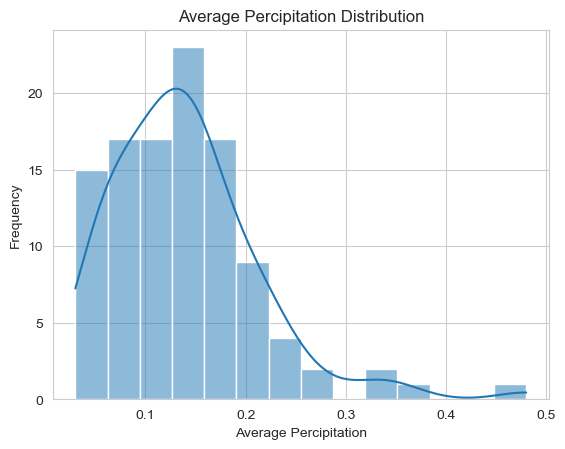

In [193]:
# Plot a histogram of the average_percipitation column
sns.histplot(weather_features['average_percipitation'], kde=True).set(title='Average Percipitation Distribution', xlabel='Average Percipitation', ylabel='Frequency')

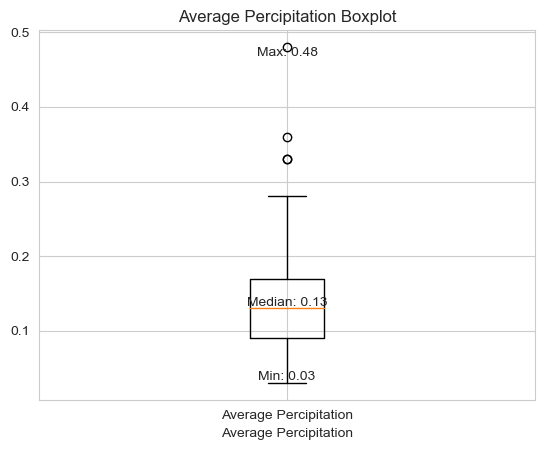

In [194]:
# Create a boxplot with min max and median labels
#sns.boxplot(x=weather_features["average_percipitation"]).set(title='Average Percipitation Boxplot', xlabel='Average Percipitation')

import matplotlib.pyplot as plt

# Create the box plot
plt.boxplot(weather_features["average_percipitation"], labels=["Average Percipitation"])

# Add labels for min, max, and median values
min_val = weather_features["average_percipitation"].min()
max_val = weather_features["average_percipitation"].max()
median_val = weather_features["average_percipitation"].median()

plt.text(1, min_val, f"Min: {min_val:.2f}", ha='center', va='bottom')
plt.text(1, max_val, f"Max: {max_val:.2f}", ha='center', va='top')
plt.text(1, median_val, f"Median: {median_val:.2f}", ha='center', va='bottom')

# Set the title and x-axis label
plt.title('Average Percipitation Boxplot')
plt.xlabel('Average Percipitation')

# Display the plot
plt.show()


In [195]:
# Print the mean and median of the average_percipitation column
print(f"The mean of the average_percipitation column is {weather_features['average_percipitation'].mean()}")

The mean of the average_percipitation column is 0.13925925925925928


In [196]:
# Print the 25th, 50th, 75th and 95th percentiles of the average_percipitation column
print(weather_features["average_percipitation"].quantile([0.25, 0.5, 0.75, 0.95]))

0.25    0.0900
0.50    0.1300
0.75    0.1700
0.95    0.2565
Name: average_percipitation, dtype: float64


In [197]:
print(f"The median of the average_percipitation column is {weather_features['average_percipitation'].median()}")

The median of the average_percipitation column is 0.13


In [198]:
# Print the skewness and kurtosis of the average_percipitation column
print(f"The skewness of the average_percipitation column is {weather_features['average_percipitation'].skew()}")

The skewness of the average_percipitation column is 1.4705075150409106


[Text(0.5, 1.0, 'Average Temperature Distribution'),
 Text(0.5, 0, 'Average Temperature'),
 Text(0, 0.5, 'Frequency')]

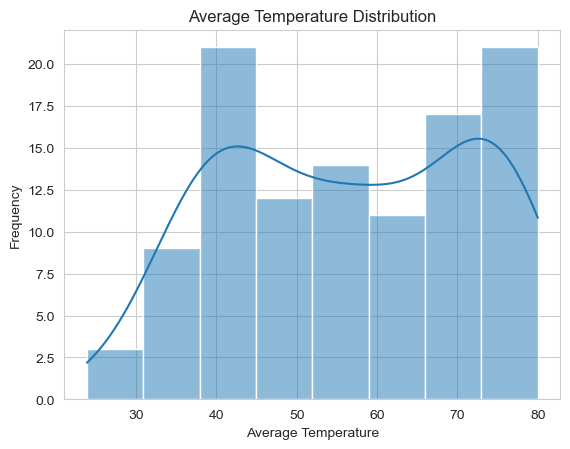

In [199]:
# Plot a histogram of the avg_temp column
sns.histplot(weather_features['avg_temp'], kde=True).set(title='Average Temperature Distribution', xlabel='Average Temperature', ylabel='Frequency')

In [200]:
# Calculate the mean and median of the average tempeture column
print(f"The mean of the avg_temp column is {weather_features['avg_temp'].mean()}")

The mean of the avg_temp column is 56.66759259259259


In [201]:
print(f"The median of the avg_temp column is {weather_features['avg_temp'].median()}")

The median of the avg_temp column is 57.400000000000006


In [202]:
# Calculate the skewness and kurtosis of the average tempeture column
print(f"The skewness of the avg_temp column is {weather_features['avg_temp'].skew()}")
print(f"The kurtosis of the avg_temp column is {weather_features['avg_temp'].kurt()}")

The skewness of the avg_temp column is -0.06689833132141756
The kurtosis of the avg_temp column is -1.2878349541236762


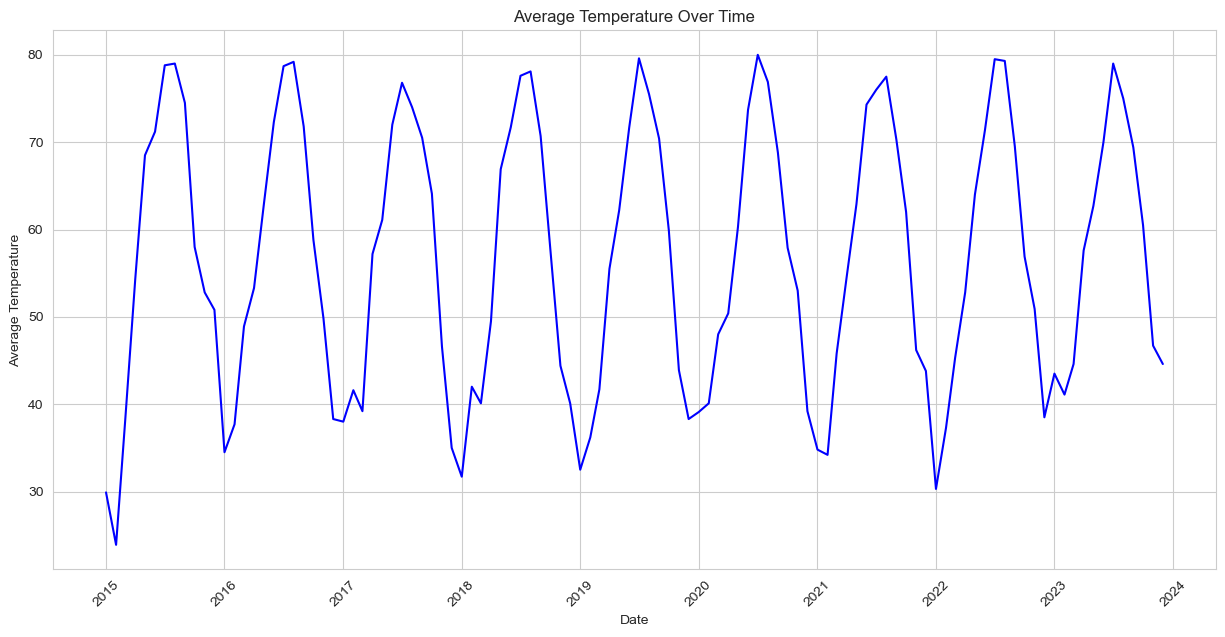

In [203]:
# Plot a time series plot for the average tempeture column
plt.figure(figsize=(15, 7))
plt.plot(weathereda.index, weathereda["avg_temp"], color="blue")
plt.title("Average Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.xticks(rotation=45)
plt.show()


# Which Traffic Data to Use

Get Traffic Data in wide format

In [204]:
# Describe the traffic dataframe
traffic.describe(include="all")

,year,month,location_id,direction,value_type,value,data_source
count,15751.000000,15751.000000,15751.0,11061,15751,1.575100e+04,15751
unique,NaN,NaN,1440.0,16,3,NaN,5
top,NaN,NaN,3.0,I,vehicle_count,NaN,volume_count_small
freq,NaN,NaN,372.0,3094,11715,NaN,4967
mean,2016.742048,6.996889,NaN,NaN,NaN,6.909708e+05,NaN
std,3.486017,3.551479,NaN,NaN,NaN,1.773847e+06,NaN
min,2000.000000,1.000000,NaN,NaN,NaN,0.000000e+00,NaN
25%,2014.000000,4.000000,NaN,NaN,NaN,5.326932e+02,NaN
50%,2018.000000,8.000000,NaN,NaN,NaN,8.857300e+04,NaN
75%,2019.000000,10.000000,NaN,NaN,NaN,9.999410e+05,NaN


In [205]:
traffic_wide = traffic

In [206]:
# Concatenate the 'value_type' and 'data_source' columns to create a new column named 'traffic_type'
traffic_wide["traffic_type"] = traffic_wide["value_type"] + "_" + traffic_wide["data_source"]

# Get rid of the 'value_type' and 'data_source' columns
traffic_wide = traffic_wide.drop(columns=["value_type", "data_source"])

In [207]:
# Concate the 'location_id' and 'traffic_type' columns to create a new column named 'location_traffic_type'
#traffic_wide["location_traffic_type"] = traffic_wide["location_id"].astype(str) + "_" + traffic_wide["traffic_type"]

# Get rid of the 'location_id' column
#traffic_wide = traffic_wide.drop(columns=["location_id"])

In [208]:
# Create a date column by combining the year and month columns
traffic_wide["date"] = traffic_wide["year"].astype(str) + "-" + traffic_wide["month"].astype(str)

# Convert the date column to a date data type
traffic_wide["date"] = pd.to_datetime(traffic_wide["date"])

# Drop the year and month columns
traffic_wide = traffic_wide.drop(columns=["year", "month"])

In [209]:
# Describe the traffic_wide dataframe
traffic_wide.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\3295772746.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_wide.describe(include="all")


,location_id,direction,value,traffic_type,date
count,15751.0,11061,1.575100e+04,15751,15751
unique,1440.0,16,NaN,6,197
top,3.0,I,NaN,vehicle_count_volume_count_small,2019-10-01 00:00:00
freq,372.0,3094,NaN,4967,606
first,NaN,NaN,NaN,NaN,2000-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2024-02-01 00:00:00
mean,NaN,NaN,6.909708e+05,NaN,NaN
std,NaN,NaN,1.773847e+06,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,5.326932e+02,NaN,NaN


In [210]:
# Transform the traffic_wide dataframe so that the values for where the location_id and traffic_type columns are added together
traffic_wide = traffic_wide.groupby(["date", "location_id", "traffic_type"]).agg({"value": "sum"}).reset_index()

In [211]:
# Transform the traffic_wide dataframe so that the values for where the location_id and traffic_type are the same are averaged together
traffic_wide = traffic_wide.groupby(["date", "traffic_type"]).agg({"value": "mean"}).reset_index()

In [212]:
# Melt the traffic_wide dataframe so all the traffic_type column values are in seperate columns, with only the date column remaining
traffic_wide = traffic_wide.pivot(index="date", columns="traffic_type", values="value")

In [213]:
# Describe the traffic_wide dataframe
traffic_wide.describe(include="all")

traffic_type,speed_traffic_speeds,travel_time_traffic_speeds,vehicle_count_automated_traffic_volume_counts,vehicle_count_daily_traffic,vehicle_count_hourly_traffic,vehicle_count_volume_count_small
count,21.000000,21.000000,1.560000e+02,1.700000e+02,1.700000e+02,37.000000
mean,32.927340,168.891764,3.961078e+06,2.268395e+06,2.268395e+06,152161.130063
std,11.626666,79.511718,4.386634e+06,3.790379e+05,3.790379e+05,103541.236047
min,0.000000,0.000000,4.020500e+04,5.534814e+05,5.534814e+05,18230.192308
25%,33.368558,107.772169,8.740358e+05,2.098702e+06,2.098702e+06,68824.410256
50%,34.700355,202.398764,2.694513e+06,2.258090e+06,2.258090e+06,135322.702703
75%,36.225292,227.154136,4.966980e+06,2.438765e+06,2.438765e+06,207484.422619
max,45.774333,303.537949,1.968032e+07,3.500928e+06,3.500928e+06,466873.629630


Join with Delay Data

In [214]:
# Join the traffic_wide and delays dataframes together
traffic_delays = pd.merge(traffic_wide, delays2, on="date", how="left")

In [215]:
# Describe the traffic_delays dataframe
traffic_delays.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\2659122377.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_delays.describe(include="all")


,date,speed_traffic_speeds,travel_time_traffic_speeds,vehicle_count_automated_traffic_volume_counts,vehicle_count_daily_traffic,vehicle_count_hourly_traffic,vehicle_count_volume_count_small,year,month,wait_assessment
count,197,21.000000,21.000000,1.560000e+02,1.700000e+02,1.700000e+02,37.000000,109,109,109.000000
unique,197,NaN,NaN,NaN,NaN,NaN,NaN,10,12,NaN
top,2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2015,01,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,12,10,NaN
first,2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2024-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,32.927340,168.891764,3.961078e+06,2.268395e+06,2.268395e+06,152161.130063,NaN,NaN,0.788842
std,NaN,11.626666,79.511718,4.386634e+06,3.790379e+05,3.790379e+05,103541.236047,NaN,NaN,0.024998
min,NaN,0.000000,0.000000,4.020500e+04,5.534814e+05,5.534814e+05,18230.192308,NaN,NaN,0.716483
25%,NaN,33.368558,107.772169,8.740358e+05,2.098702e+06,2.098702e+06,68824.410256,NaN,NaN,0.776841


In [216]:
# Check for Null values in the traffic_delays dataframe
traffic_delays.isnull().sum()

date                                               0
speed_traffic_speeds                             176
travel_time_traffic_speeds                       176
vehicle_count_automated_traffic_volume_counts     41
vehicle_count_daily_traffic                       27
vehicle_count_hourly_traffic                      27
vehicle_count_volume_count_small                 160
year                                              88
month                                             88
wait_assessment                                   88
dtype: int64

In [217]:
# Take only the rows where the wait_assessment column is not null
traffic_delays = traffic_delays[traffic_delays["wait_assessment"].notnull()]

<Axes: xlabel='date'>

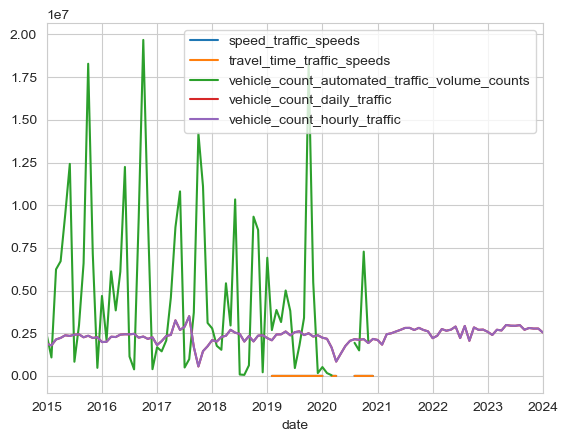

In [218]:
# Plot a time series graph of the traffic columns in the traffic_delays dataframe
traffic_delays.plot(x="date", y=["speed_traffic_speeds", "travel_time_traffic_speeds","vehicle_count_automated_traffic_volume_counts","vehicle_count_daily_traffic", "vehicle_count_hourly_traffic"])

In [219]:
# Use interpolation to fill in the Null values in the traffic_delays dataframe
traffic_delays = traffic_delays.interpolate(method='pad')

In [220]:
# Remove the vehicle_count_volume_count_small column and all rows after 2023-12-01
traffic_delays = traffic_delays.drop(columns=["vehicle_count_volume_count_small", "travel_time_traffic_speeds", "speed_traffic_speeds", "vehicle_count_daily_traffic"])
traffic_delays = traffic_delays[traffic_delays["date"] <= "2023-12-01"]

In [221]:
traffic_delays.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\2216627590.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_delays.describe(include="all")


,date,vehicle_count_automated_traffic_volume_counts,vehicle_count_hourly_traffic,year,month,wait_assessment
count,108,1.080000e+02,1.080000e+02,108,108,108.000000
unique,108,NaN,NaN,9,12,NaN
top,2015-01-01 00:00:00,NaN,NaN,2015,01,NaN
freq,1,NaN,NaN,12,9,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2023-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.479085e+06,2.353987e+06,NaN,NaN,0.788890
std,NaN,4.168301e+06,4.313463e+05,NaN,NaN,0.025109
min,NaN,4.020500e+04,5.534814e+05,NaN,NaN,0.716483
25%,NaN,4.442467e+05,2.154228e+06,NaN,NaN,0.776817


In [222]:
# Count the number of Null values in the traffic_delays dataframe
traffic_delays.isnull().sum()

date                                             0
vehicle_count_automated_traffic_volume_counts    0
vehicle_count_hourly_traffic                     0
year                                             0
month                                            0
wait_assessment                                  0
dtype: int64

Perform PCA to understand which traffic data has the most impact on delays

In [223]:
# Separate the features (traffic type columns) from the target (wait assessment column)
features = traffic_delays.drop(columns=['date', 'wait_assessment', 'year', 'month'])
target = traffic_delays['wait_assessment']

# Perform PCA
pca = PCA()
pca.fit(features)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a dataframe to store the results
pca_results = pd.DataFrame({'Traffic Type': features.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Sort the dataframe by the explained variance ratio in descending order, round the values to 2 decimal places
pca_results = pca_results.round(2)
pca_results = pca_results.sort_values(by='Explained Variance Ratio', ascending=False)

# Print the results
print(pca_results)

# Print the Top 2 Traffic Types
print(pca_results.iloc[0:2, 0])

                                    Traffic Type  Explained Variance Ratio
0  vehicle_count_automated_traffic_volume_counts                      0.99
1                   vehicle_count_hourly_traffic                      0.01
0    vehicle_count_automated_traffic_volume_counts
1                     vehicle_count_hourly_traffic
Name: Traffic Type, dtype: object


In [224]:
# Keep only the avg_perc and avg_temp columns
traffic_features = traffic_delays[['date', 'vehicle_count_automated_traffic_volume_counts']]

In [225]:
trafficeda = traffic_features

In [226]:
# Convert the date column to a datetime object
trafficeda["date"] = pd.to_datetime(trafficeda["date"])

# Move the date column to the index
trafficeda = trafficeda.set_index("date")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\1737507707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trafficeda["date"] = pd.to_datetime(trafficeda["date"])


[Text(0.5, 1.0, 'Vehicle Count Automated Traffic Volume Counts Distribution'),
 Text(0.5, 0, 'Vehicle Count Automated Traffic Volume Counts'),
 Text(0, 0.5, 'Frequency')]

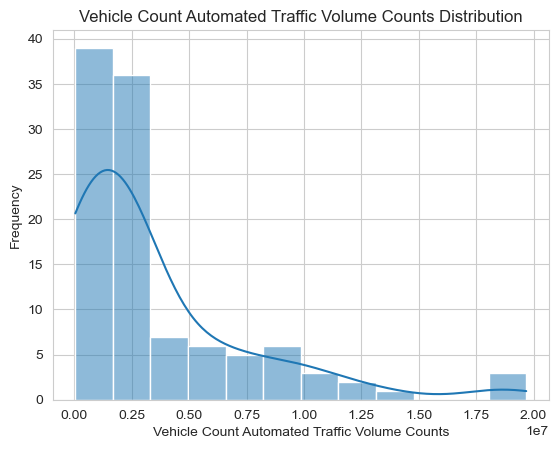

In [227]:
# Plot the normal distribution of the vehicle_count_automated_traffic_volume_counts column
sns.set_style("whitegrid")
sns.histplot(trafficeda['vehicle_count_automated_traffic_volume_counts'], kde=True).set(title='Vehicle Count Automated Traffic Volume Counts Distribution', xlabel='Vehicle Count Automated Traffic Volume Counts', ylabel='Frequency')

In [228]:
# Print the mean and median values of the vehicle_count_automated_traffic_volume_counts column
print(f"The mean of the vehicle_count_automated_traffic_volume_counts column is {trafficeda['vehicle_count_automated_traffic_volume_counts'].mean()}")

The mean of the vehicle_count_automated_traffic_volume_counts column is 3479085.1873456794


In [229]:
print(f"The median of the vehicle_count_automated_traffic_volume_counts column is {trafficeda['vehicle_count_automated_traffic_volume_counts'].median()}")

The median of the vehicle_count_automated_traffic_volume_counts column is 2337809.5


In [230]:
# Check the skewness and kurtosis of the vehicle_count_automated_traffic_volume_counts column
print(f"The skewness of the vehicle_count_automated_traffic_volume_counts column is {trafficeda['vehicle_count_automated_traffic_volume_counts'].skew()}")

The skewness of the vehicle_count_automated_traffic_volume_counts column is 1.9145596220608345


In [231]:
print(f"The kurtosis of the vehicle_count_automated_traffic_volume_counts column is {trafficeda['vehicle_count_automated_traffic_volume_counts'].kurt()}")

The kurtosis of the vehicle_count_automated_traffic_volume_counts column is 3.797717734789105


In [232]:
# Check the normality of the vehicle_count_automated_traffic_volume_counts column
stat, p = shapiro(trafficeda['vehicle_count_automated_traffic_volume_counts'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.767, p=0.000
Sample does not look Gaussian (reject H0)


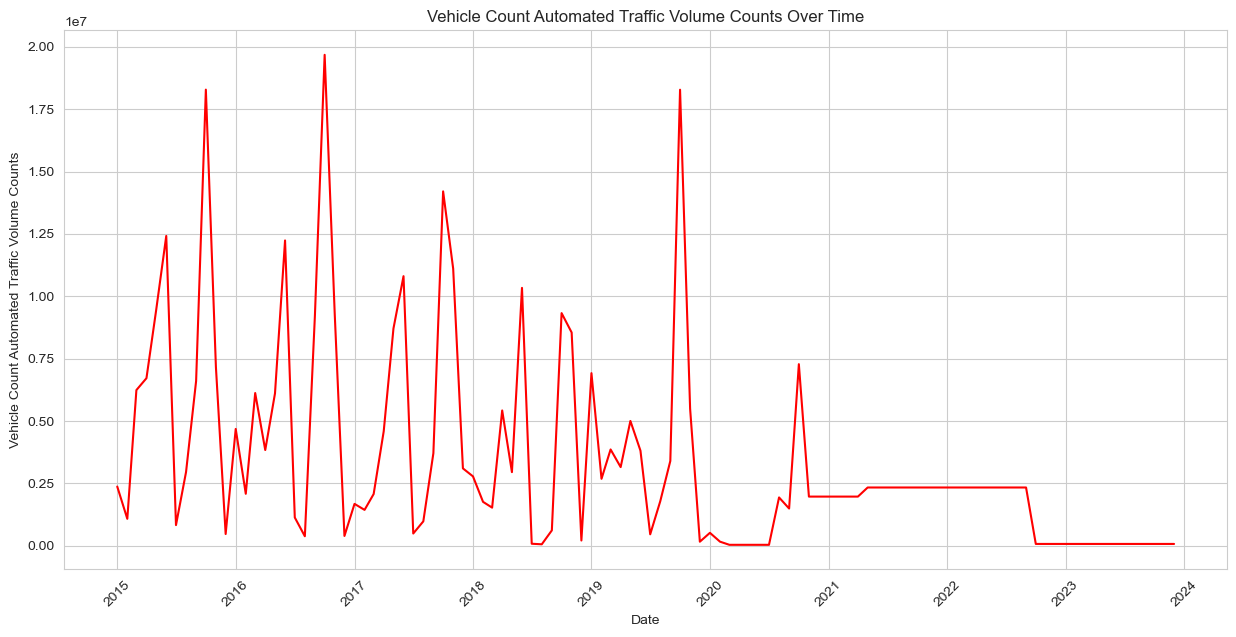

In [233]:
# Create a time series plot for the vehicle_count_automated_traffic_volume_counts data
plt.figure(figsize=(15, 7))
plt.plot(trafficeda.index, trafficeda["vehicle_count_automated_traffic_volume_counts"], color="red")
plt.title("Vehicle Count Automated Traffic Volume Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Vehicle Count Automated Traffic Volume Counts")
plt.xticks(rotation=45)
plt.show()

Use vehicle_count_automated_traffic_volume_counts as the traffic data

# Perform a Time Series Analysis

Create the data for the model, combining the delays, weather and traffic data

In [234]:
# Drop the year and month columns
delays2 = delays2.drop(columns=["year", "month"])

In [235]:
delays2.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\1930531684.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  delays2.describe(include="all")


,wait_assessment,date
count,109.000000,109
unique,NaN,109
top,NaN,2015-01-01 00:00:00
freq,NaN,1
first,NaN,2015-01-01 00:00:00
last,NaN,2024-01-01 00:00:00
mean,0.788842,NaN
std,0.024998,NaN
min,0.716483,NaN
25%,0.776841,NaN


In [236]:
weather_features.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\4107607716.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  weather_features.describe(include="all")


,date,average_percipitation,avg_temp
count,108,108.000000,108.000000
unique,108,NaN,NaN
top,2015-01-01 00:00:00,NaN,NaN
freq,1,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN
last,2023-12-01 00:00:00,NaN,NaN
mean,NaN,0.139259,56.667593
std,NaN,0.073468,15.485536
min,NaN,0.030000,23.900000
25%,NaN,0.090000,43.125000


In [237]:
traffic_features.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\2137024980.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_features.describe(include="all")


,date,vehicle_count_automated_traffic_volume_counts
count,108,1.080000e+02
unique,108,NaN
top,2015-01-01 00:00:00,NaN
freq,1,NaN
first,2015-01-01 00:00:00,NaN
last,2023-12-01 00:00:00,NaN
mean,NaN,3.479085e+06
std,NaN,4.168301e+06
min,NaN,4.020500e+04
25%,NaN,4.442467e+05


In [238]:
# Join the weather_features and traffic_features and delays2 dataframes together
features = pd.merge(delays2, weather_features, on="date", how="left")
features = pd.merge(features, traffic_features, on="date", how="left")

In [239]:
# Describe the features dataframe
features.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\1933797084.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  features.describe(include="all")


,wait_assessment,date,average_percipitation,avg_temp,vehicle_count_automated_traffic_volume_counts
count,109.000000,109,108.000000,108.000000,1.080000e+02
unique,NaN,109,NaN,NaN,NaN
top,NaN,2015-01-01 00:00:00,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN
last,NaN,2024-01-01 00:00:00,NaN,NaN,NaN
mean,0.788842,NaN,0.139259,56.667593,3.479085e+06
std,0.024998,NaN,0.073468,15.485536,4.168301e+06
min,0.716483,NaN,0.030000,23.900000,4.020500e+04
25%,0.776841,NaN,0.090000,43.125000,4.442467e+05


Decompose the time series to understand the trend and seasonality

In [240]:
# Convert the date column to a date data type
features["date"] = pd.to_datetime(features["date"])

# Have the date column as the index
features = features.set_index("date")

In [241]:
# set the frequncey of the index to monthly
features.index = pd.date_range(start='2015-01-01', periods=len(features), freq='M')

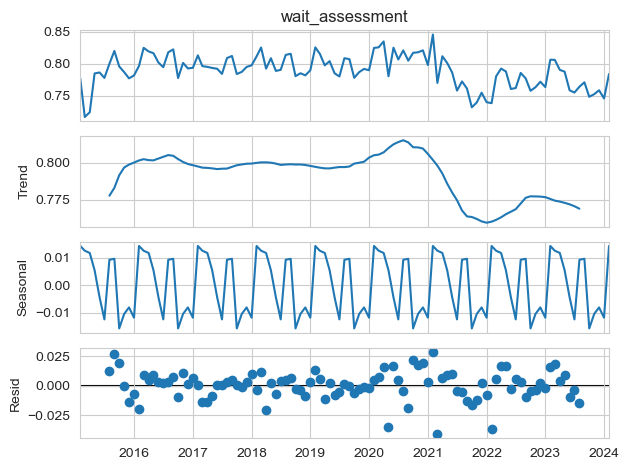

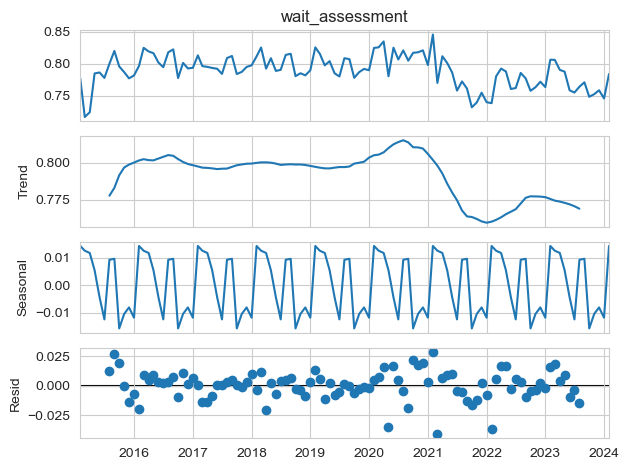

In [242]:
decompose_data = seasonal_decompose(features['wait_assessment'], model="additive")
decompose_data.plot()

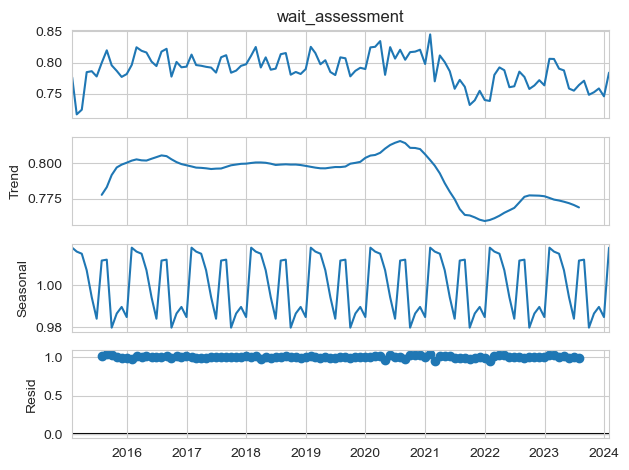

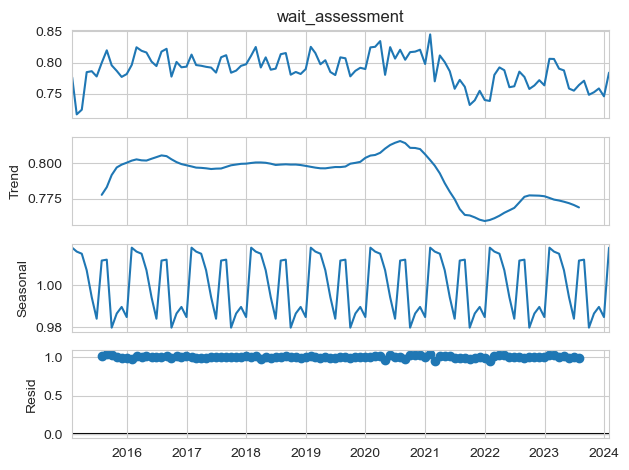

In [243]:
decompose_data = seasonal_decompose(features['wait_assessment'], model="multiplicative")

decompose_data.plot()

<Axes: >

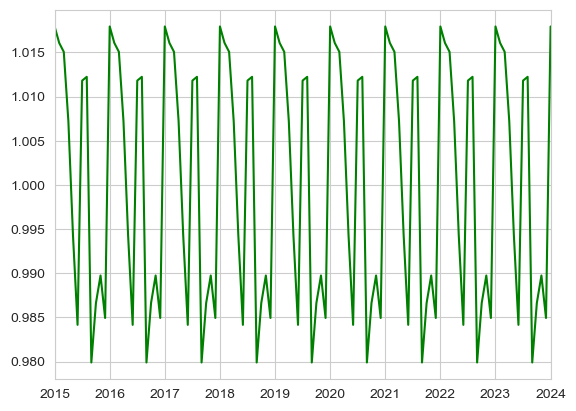

In [244]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

Check the stationarity of the time series

In [245]:
dftest = adfuller(features.wait_assessment, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.8246843440118512
2. P-Value :  0.36827728236922863
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 96
5. Critical Values :
	 1% :  -3.5003788874873405
	 5% :  -2.8921519665075235
	 10% :  -2.5830997960069446


In [246]:
# Use a rolling mean to smooth out the data and make it stationary
rolling_mean = features['wait_assessment'].rolling(window = 12).mean()

# Create a column named rolling_mean in the features dataframe which is the rolling mean of the wait_assessment column with a window of 12 months minus the rolling mean of the wait_assessment column with a window of 12 months shifted by 1 month
features['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()

<Axes: title={'center': 'Original'}>

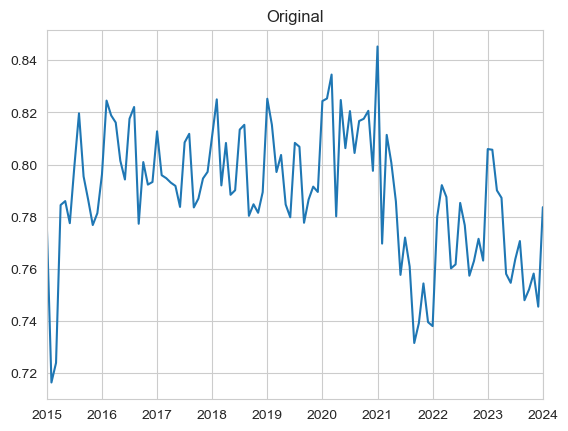

In [247]:
features['wait_assessment'].plot(title='Original')

<Axes: title={'center': 'Post Rolling Mean & Differencing'}>

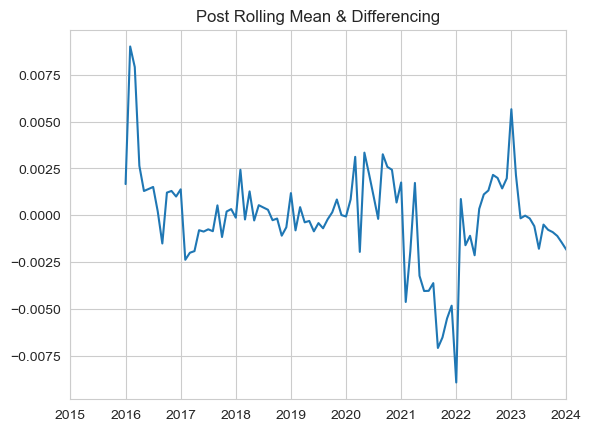

In [248]:
features['rolling_mean_diff'].plot(title='Post Rolling Mean & Differencing')

In [249]:
# Describe the features dataframe
features.describe(include="all")

,wait_assessment,average_percipitation,avg_temp,vehicle_count_automated_traffic_volume_counts,rolling_mean_diff
count,109.000000,108.000000,108.000000,1.080000e+02,97.000000
mean,0.788842,0.139259,56.667593,3.479085e+06,-0.000091
std,0.024998,0.073468,15.485536,4.168301e+06,0.002589
min,0.716483,0.030000,23.900000,4.020500e+04,-0.008933
25%,0.776841,0.090000,43.125000,4.442467e+05,-0.001096
50%,0.790113,0.130000,57.400000,2.337810e+06,-0.000135
75%,0.806845,0.170000,71.250000,4.614575e+06,0.001289
max,0.845291,0.480000,80.000000,1.968032e+07,0.009005


In [250]:
#Check for Null values in the features dataframe
features.isnull().sum()

wait_assessment                                   0
average_percipitation                             1
avg_temp                                          1
vehicle_count_automated_traffic_volume_counts     1
rolling_mean_diff                                12
dtype: int64

In [251]:
# Use interpolation to fill in the Null values in the features dataframe
features = features.interpolate(method='pad')

In [252]:
# Show the index for the rows of rolling_mean_diff where the value is null
features[features['rolling_mean_diff'].isnull()].index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

In [253]:
# Fill in the Null values in the rolling_mean_diff column With the mean of the rolling_mean_diff column
features['rolling_mean_diff'] = features['rolling_mean_diff'].fillna(features['rolling_mean_diff'].mean())

In [254]:
dftest = adfuller(features.rolling_mean_diff, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.298884266964081
2. P-Value :  0.014928421514159258
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 96
5. Critical Values :
	 1% :  -3.5003788874873405
	 5% :  -2.8921519665075235
	 10% :  -2.5830997960069446


Create a Sarimax model to predict the delays

Use the weather and traffic data as exogenous variables

In [255]:
# Define the endogenous variable (target)
endog = features['rolling_mean_diff']

# Define the exogenous variables
exog = features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]

# Add a constant to the exogenous variables
exog = sm.add_constant(exog)

# Perform test/train split
train_size = 0.8  
endog_train, endog_test, exog_train, exog_test = train_test_split(
    endog, exog, train_size=train_size, shuffle=False
)

# Set the frequency to monthly
freq = "M"

# Create the SARIMAX model for training
model = sm.tsa.SARIMAX(endog_train, exog=exog_train, order=(1, 0, 0), seasonal_order=(0, 0, 0, 12), freq=freq)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())

# Predict on the test set
forecast = results.get_forecast(steps=len(endog_test), exog=exog_test)
predicted_values = forecast.predicted_mean

# Evaluate the accuracy (you can use any appropriate metric depending on your task)
mae = mean_absolute_error(endog_test, predicted_values)
rmse = np.sqrt(mean_squared_error(endog_test, predicted_values))
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

                               SARIMAX Results                                
Dep. Variable:      rolling_mean_diff   No. Observations:                   87
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 415.264
Date:                Fri, 23 Feb 2024   AIC                           -818.529
Time:                        21:24:07   BIC                           -803.733
Sample:                    01-31-2015   HQIC                          -812.571
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.0010      0.001      0.736      0.462      -0.002       0.004
average_percipitation     

c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Standardize the data

In [256]:
# Scale the numerical features in the features dataframe using StandardScaler
scaler = StandardScaler()
features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts', 'wait_assessment', 'rolling_mean_diff']] = scaler.fit_transform(features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts', 'wait_assessment', 'rolling_mean_diff']])

Rerun the model

In [257]:
# Define the endogenous variable (target)
endog = features['rolling_mean_diff']

# Define the exogenous variables
exog = features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]

# Add a constant to the exogenous variables
exog = sm.add_constant(exog)

# Perform test/train split
train_size = 0.8  # You can adjust this ratio as needed
endog_train, endog_test, exog_train, exog_test = train_test_split(
    endog, exog, train_size=train_size, shuffle=False
)

# Set the frequency to monthly
freq = "M"

# Create the SARIMAX model for training
model = sm.tsa.SARIMAX(endog_train, exog=exog_train, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), freq=freq)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())

# Predict on the test set
forecast = results.get_forecast(steps=len(endog_test), exog=exog_test)
predicted_values = forecast.predicted_mean

# Evaluate the accuracy (you can use any appropriate metric depending on your task)
mae = mean_absolute_error(endog_test, predicted_values)
rmse = np.sqrt(mean_squared_error(endog_test, predicted_values))
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

                               SARIMAX Results                                
Dep. Variable:      rolling_mean_diff   No. Observations:                   87
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -107.613
Date:                Fri, 23 Feb 2024   AIC                            227.226
Time:                        21:24:07   BIC                            242.022
Sample:                    01-31-2015   HQIC                           233.184
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.0546      0.250     -0.219      0.827      -0.544       0.435
average_percipitation     

Perform Parameter Optimization

In [258]:
features.describe(include="all")

,wait_assessment,average_percipitation,avg_temp,vehicle_count_automated_traffic_volume_counts,rolling_mean_diff
count,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
mean,-5.037000e-15,-1.425975e-16,2.200075e-16,1.018553e-17,7.129873e-18
std,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00
min,-2.908007e+00,-1.502794e+00,-2.122522e+00,-8.225864e-01,-3.639171e+00
25%,-4.823059e-01,-6.830883e-01,-8.486270e-01,-7.370304e-01,-3.181302e-01
50%,5.104700e-02,-1.366177e-01,4.179929e-02,-2.679593e-01,-1.115584e-17
75%,7.234982e-01,4.098530e-01,9.517240e-01,2.759924e-01,5.215462e-01
max,2.268574e+00,4.645000e+00,1.523677e+00,3.918412e+00,3.743996e+00


In [259]:
# Define the endogenous variable (target)
endog = features['rolling_mean_diff']

# Define the exogenous variables
exog = features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]

# Add a constant to the exogenous variables
exog = sm.add_constant(exog)

# Perform test/train split
train_size = 0.8
endog_train, endog_test, exog_train, exog_test = train_test_split(
    endog, exog, train_size=train_size, shuffle=False
)

# Define the range of parameters to search
p_values = range(0, 3)  # Replace with your desired range
d_values = range(0, 2)  # Replace with your desired range
q_values = range(0, 3)  # Replace with your desired range
P_values = range(0, 2)  # Replace with your desired range
D_values = range(0, 2)  # Replace with your desired range
Q_values = range(0, 2)  # Replace with your desired range

# Create a list of all possible parameter combinations
param_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values))

best_mae = float('inf')
best_params = None

# Perform grid search
for params in param_combinations:
    order = (params[0], params[1], params[2])
    seasonal_order = (params[3], params[4], params[5], 12)
    
    # Specify the frequency of the time series
    freq = 'M'
    
    # Create a datetime index with the specified frequency
    date_index = pd.date_range(start=features.index.min(), end=features.index.max(), freq=freq)
    
    # Reindex the endogenous and exogenous variables
    #endog = endog.reindex(date_index)
    exog = exog.reindex(date_index)

    # Create the SARIMAX model for training
    model = sm.tsa.SARIMAX(endog_train, exog=exog_train, order=order, seasonal_order=seasonal_order, freq=freq)

    # Fit the model
    results = model.fit(maxiter=5000, disp=True)

    # Predict on the test set
    forecast = results.get_forecast(steps=len(endog_test), exog=exog_test)
    predicted_values = forecast.predicted_mean

    # Evaluate the accuracy using Mean Absolute Error (MAE)
    mae = mean_absolute_error(endog_test, predicted_values)

    # Check if the current combination has a lower MAE
    if mae < best_mae:
        best_mae = mae
        best_params = params

# Print the best parameters and corresponding MAE
print(f"Best Parameters: {best_params}")
print(f"Best Mean Absolute Error: {best_mae:.2f}")

c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Paul\anaconda3\lib\site-packages\st

Best Parameters: (2, 0, 0, 1, 0, 1)
Best Mean Absolute Error: 0.35


Rerun the model

In [260]:
# Define the endogenous variable (target)
endog = features['rolling_mean_diff']

# Define the exogenous variables
exog = features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]

# Add a constant to the exogenous variables
exog = sm.add_constant(exog)

# Perform test/train split
train_size = 0.8  # You can adjust this ratio as needed
endog_train, endog_test, exog_train, exog_test = train_test_split(
    endog, exog, train_size=train_size, shuffle=False
)

# Set the frequency of the time series to monthly
freq = 'M'

# Create the SARIMAX model for training
model = sm.tsa.SARIMAX(endog_train, exog=exog_train, order=(1, 0, 0), seasonal_order=(0, 0, 1, 12), freq=freq)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())

# Predict on the test set
forecast = results.get_forecast(steps=len(endog_test), exog=exog_test)
predicted_values = forecast.predicted_mean

# Evaluate the accuracy (you can use any appropriate metric depending on your task)
mae = mean_absolute_error(endog_test, predicted_values)
rmse = np.sqrt(mean_squared_error(endog_test, predicted_values))
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

                                      SARIMAX Results                                       
Dep. Variable:                    rolling_mean_diff   No. Observations:                   87
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 -96.588
Date:                              Fri, 23 Feb 2024   AIC                            207.175
Time:                                      21:24:48   BIC                            224.437
Sample:                                  01-31-2015   HQIC                           214.126
                                       - 03-31-2022                                         
Covariance Type:                                opg                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                       

Run the model on the entire dataset to be used in the hybrid model

In [261]:
# Create a full model for training the hybrid model

# Define the endogenous variable (target)
endog1 = features['wait_assessment']

# Define the exogenous variables
exog1 = features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]

# Add a constant to the exogenous variables
exog1 = sm.add_constant(exog1)

# Set the frequency of the time series to monthly
freq = 'M'

# Create the SARIMAX model for training
model1 = sm.tsa.SARIMAX(endog1, exog=exog1, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12), freq=freq)

# Fit the model
results1 = model1.fit()

# Print the summary of the model
print(results1.summary())

                                      SARIMAX Results                                       
Dep. Variable:                      wait_assessment   No. Observations:                  109
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -116.689
Date:                              Fri, 23 Feb 2024   AIC                            245.377
Time:                                      21:24:49   BIC                            260.764
Sample:                                  01-31-2015   HQIC                           251.597
                                       - 01-31-2024                                         
Covariance Type:                                opg                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                       

In [262]:
# Find the endog_train, endog_test, exog_train, exog_test dataframe shapes
print(endog_train.shape)
print(endog_test.shape)
print(exog_train.shape)
print(exog_test.shape)

(87,)
(22,)
(87, 4)
(22, 4)


Plot the Actual vs Predicted

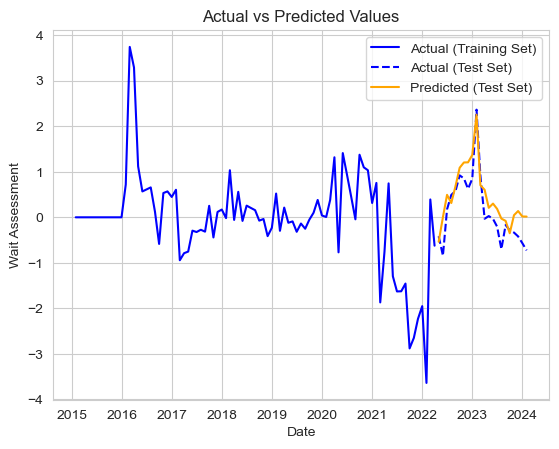

In [263]:
# Plot the actual values from the training set
plt.plot(endog_train.index, endog_train, label='Actual (Training Set)', color='blue')

# Plot the actual values from the test set
plt.plot(endog_test.index, endog_test, label='Actual (Test Set)', color='blue', linestyle='--')

# Plot the predicted values from the test set
plt.plot(endog_test.index, predicted_values, label='Predicted (Test Set)', color='orange')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Wait Assessment')
plt.title('Actual vs Predicted Values')

# Show the legend
plt.legend()

# Show the plot
plt.show()


# Prepare the Data for the Random Forest Model

Create the data for the model, combining the delays, weather and traffic data

In [264]:
# Join the delays2 and features dataframes together
features2 = pd.merge(delays2, traffic_features, on="date", how="left")

In [265]:
features2 = pd.merge(features2, weather_features, on="date", how="left")

In [266]:
features2.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\4236704510.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  features2.describe(include="all")


,wait_assessment,date,vehicle_count_automated_traffic_volume_counts,average_percipitation,avg_temp
count,109.000000,109,1.080000e+02,108.000000,108.000000
unique,NaN,109,NaN,NaN,NaN
top,NaN,2015-01-01 00:00:00,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN
last,NaN,2024-01-01 00:00:00,NaN,NaN,NaN
mean,0.788842,NaN,3.479085e+06,0.139259,56.667593
std,0.024998,NaN,4.168301e+06,0.073468,15.485536
min,0.716483,NaN,4.020500e+04,0.030000,23.900000
25%,0.776841,NaN,4.442467e+05,0.090000,43.125000


Augment the data with a categorical variable showing the traffic and weather performance

vehicle_count_automated_traffic_volume_counts

<Axes: >

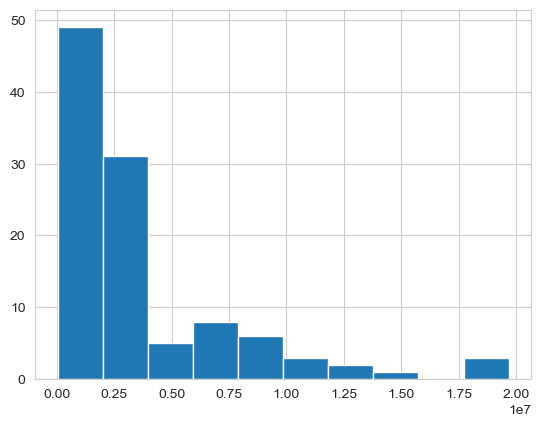

In [267]:
# Plot a histogram of the wait_assessment column
features2['vehicle_count_automated_traffic_volume_counts'].hist()

In [268]:
# Create Percentile Thresholds
from numpy import array
rating_pctile = np.percentile(features2['vehicle_count_automated_traffic_volume_counts'], [75, 90])
# The percentile thresholds are
rating_pctile

array([nan, nan])

In [269]:
# Create a new column named w_rating in the features2 dataframe 
features2['vc_rating'] = 0
features2['vc_rating'] = np.where(features2['vehicle_count_automated_traffic_volume_counts'] < rating_pctile[0], 1, features2['vc_rating'])
features2['vc_rating'] = np.where((features2['vehicle_count_automated_traffic_volume_counts'] >= rating_pctile[0]) & (features2['vehicle_count_automated_traffic_volume_counts'] <= rating_pctile[1]), 2, features2['vc_rating'])
features2['vc_rating'] = np.where(features2['vehicle_count_automated_traffic_volume_counts'] > rating_pctile[1], 3, features2['vc_rating'])

<Axes: >

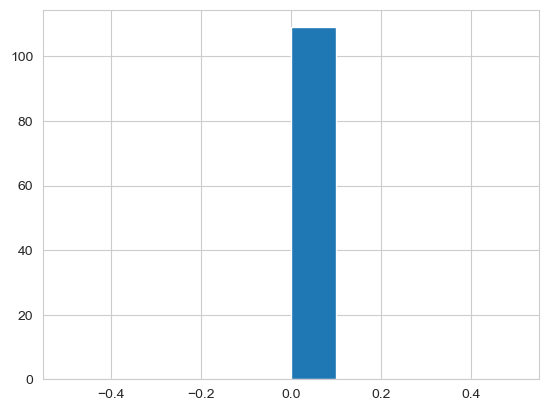

In [270]:
# Print a histogram of the w_rating column
features2['vc_rating'].hist()

average_percipitation

<Axes: >

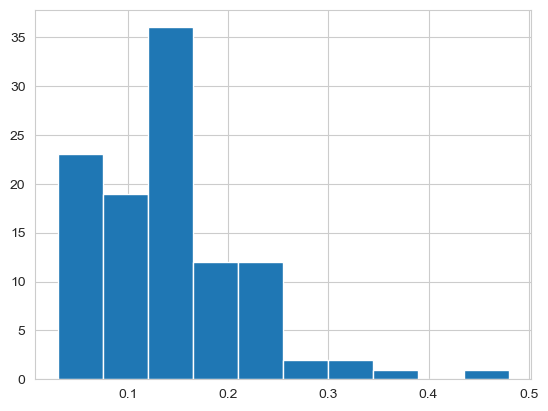

In [271]:
# Plot a histogram of the wait_assessment column
features2['average_percipitation'].hist()

In [272]:
# Create Percentile Thresholds
from numpy import array
rating_pctile = np.percentile(features2['average_percipitation'], [75, 90])
# The percentile thresholds are
rating_pctile

array([nan, nan])

In [273]:
# Create a new column named w_rating in the features2 dataframe 
features2['ap_rating'] = 0
features2['ap_rating'] = np.where(features2['average_percipitation'] < rating_pctile[0], 1, features2['ap_rating'])
features2['ap_rating'] = np.where((features2['average_percipitation'] >= rating_pctile[0]) & (features2['average_percipitation'] <= rating_pctile[1]), 2, features2['ap_rating'])
features2['ap_rating'] = np.where(features2['average_percipitation'] > rating_pctile[1], 3, features2['ap_rating'])

<Axes: >

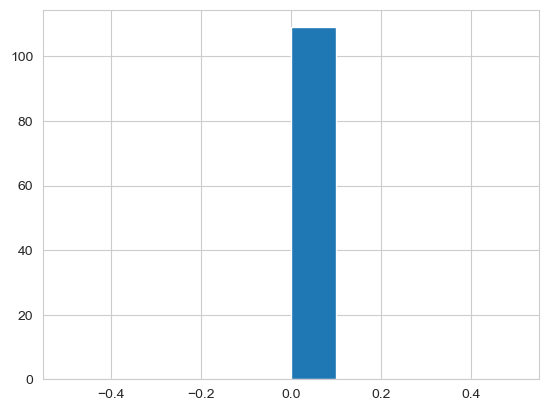

In [274]:
# Print a histogram of the w_rating column
features2['ap_rating'].hist()

avg_temp

<Axes: >

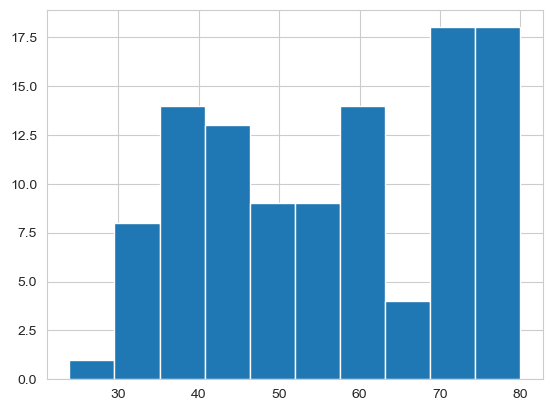

In [275]:
# Plot a histogram of the wait_assessment column
features2['avg_temp'].hist()

In [276]:
# Create Percentile Thresholds
from numpy import array
rating_pctile = np.percentile(features2['avg_temp'], [75, 90])
# The percentile thresholds are
rating_pctile

array([nan, nan])

In [277]:
# Create a new column named w_rating in the features2 dataframe 
features2['at_rating'] = 0
features2['at_rating'] = np.where(features2['avg_temp'] < rating_pctile[0], 1, features2['at_rating'])
features2['at_rating'] = np.where((features2['avg_temp'] >= rating_pctile[0]) & (features2['avg_temp'] <= rating_pctile[1]), 2, features2['at_rating'])
features2['at_rating'] = np.where(features2['avg_temp'] > rating_pctile[1], 3, features2['at_rating'])

<Axes: >

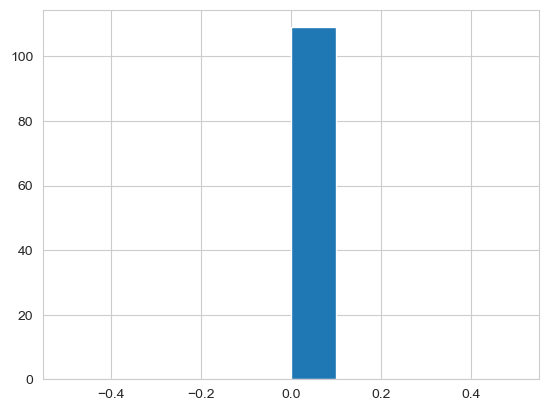

In [278]:
# Print a histogram of the w_rating column
features2['at_rating'].hist()

Augment the data with time based variables

In [279]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())        
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [280]:
# Convert the date column to a date data type
features2["date"] = pd.to_datetime(features2["date"])

In [281]:
add_datepart(features2, 'date')

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\2443702962.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df[targ_pre+n] = getattr(fld.dt,n.lower())


In [282]:
# Remove columns that are not needed: Week, Day, Dayofweek, Dayofyear, Is_month_end, Is_month_start, Is_quarter_end, Is_year_end
features2 = features2.drop(columns=["Week", "Day", "Dayofweek", "Dayofyear", "Is_month_end", "Is_month_start", "Is_quarter_end", "Is_year_end"])

In [283]:
# Convert the is quarter start and is year start columns to int
features2["Is_quarter_start"] = features2["Is_quarter_start"].astype(int)
features2["Is_year_start"] = features2["Is_year_start"].astype(int)

In [284]:
features2.describe(include="all")

,wait_assessment,vehicle_count_automated_traffic_volume_counts,average_percipitation,avg_temp,vc_rating,ap_rating,at_rating,Year,Month,Is_quarter_start,Is_year_start,Elapsed
count,109.000000,1.080000e+02,108.000000,108.000000,109.0,109.0,109.0,109.000000,109.000000,109.00000,109.000000,1.090000e+02
mean,0.788842,3.479085e+06,0.139259,56.667593,0.0,0.0,0.0,2019.045872,6.449541,0.33945,0.091743,1.562027e+09
std,0.024998,4.168301e+06,0.073468,15.485536,0.0,0.0,0.0,2.626028,3.492018,0.47571,0.289996,8.312493e+07
min,0.716483,4.020500e+04,0.030000,23.900000,0.0,0.0,0.0,2015.000000,1.000000,0.00000,0.000000,1.420070e+09
25%,0.776841,4.442467e+05,0.090000,43.125000,0.0,0.0,0.0,2017.000000,3.000000,0.00000,0.000000,1.491005e+09
50%,0.790113,2.337810e+06,0.130000,57.400000,0.0,0.0,0.0,2019.000000,6.000000,0.00000,0.000000,1.561939e+09
75%,0.806845,4.614575e+06,0.170000,71.250000,0.0,0.0,0.0,2021.000000,9.000000,1.00000,0.000000,1.633046e+09
max,0.845291,1.968032e+07,0.480000,80.000000,0.0,0.0,0.0,2024.000000,12.000000,1.00000,1.000000,1.704067e+09


Create a sliding window to shift the data and create samples for a supervised learning model

In [285]:
features3 = features2

In [286]:
# drop all columns except for wait_assessment
features4 = features3.drop(columns=["average_percipitation", "avg_temp", "vehicle_count_automated_traffic_volume_counts", "vc_rating", "ap_rating", "at_rating", "Year", "Month", "Elapsed", "Is_quarter_start", "Is_year_start"])

In [287]:
features4.describe(include="all")

,wait_assessment
count,109.000000
mean,0.788842
std,0.024998
min,0.716483
25%,0.776841
50%,0.790113
75%,0.806845
max,0.845291


In [288]:
# turn the values from features4 into an array
features_array = features4.values

>expected=0.8057, predicted=0.7878
>expected=0.7901, predicted=0.7866
>expected=0.7873, predicted=0.7862
>expected=0.7581, predicted=0.7923
>expected=0.7547, predicted=0.7692
>expected=0.7638, predicted=0.7577
>expected=0.7707, predicted=0.7781
>expected=0.7480, predicted=0.7717
>expected=0.7522, predicted=0.7674
>expected=0.7582, predicted=0.7626
>expected=0.7455, predicted=0.7639
>expected=0.7837, predicted=0.7622
MAE: 0.014
RMSE: 0.438


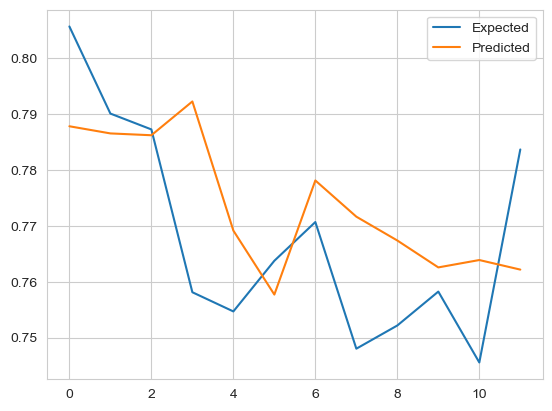

In [289]:
# writing a function to transform the time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
   n_vars = 1 if isinstance(data, list) else data.shape[1]
   df = DataFrame(data)
   cols = list()
   for i in range(n_in, 0, -1):
       cols.append(df.shift(i))
   for i in range(0, n_out):
       cols.append(df.shift(-i))
   agg = concat(cols, axis=1)
   if dropnan:
       agg.dropna(inplace=True)
   return agg.values

# This function will split a dataset into train/test sets
def train_test_split(data, n_test):
   return data[:-n_test, :], data[-n_test:, :]

# This function will fit a random forest model and make a one-step prediction
def random_forest_forecast(train, testX):
   train = np.array(train)
   trainX, trainy = train[:, :-1], train[:, -1]
   model = RandomForestRegressor(n_estimators=100)
   model.fit(trainX, trainy)
   yhat = model.predict([testX])
   return yhat[0]


# This funtion we will use for walk forward validation
def walk_forward_validation(data, n_test):
   predictions = list()
   train, test = train_test_split(data, n_test)
   history = [x for x in train]
   for i in range(len(test)):
       testX, testy = test[i, :-1], test[i, -1]
       yhat = random_forest_forecast(history, testX)
       predictions.append(yhat)
       history.append(test[i])
       print('>expected=%.4f, predicted=%.4f' % (testy, yhat))
   error = mean_absolute_error(test[:, -1], predictions)
   return error, test[:, -1], predictions

# Now, we will transform the time series data into supervised learning
values = features_array.reshape(-1, 1)
features_array = series_to_supervised(values, n_in=12)

# Let’s evaluate the model using walk-forward validation
mae, y, yhat = walk_forward_validation(features_array, 12)
print('MAE: %.3f' % mae)
print('RMSE: %.3f' % rmse)
# Finally visualize the expected vs predicted values
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [290]:
# Again create a features array
features_array = features4.values


In [291]:
# Now scale the features array using StandardScaler
scaler = StandardScaler()
features_array = scaler.fit_transform(features_array)

In [292]:
features_array

array([[-0.50387437],
       [-2.90800721],
       [-2.60602111],
       [-0.17409337],
       [-0.11359765],
       [-0.45352473],
       [ 0.42876954],
       [ 1.23841667],
       [ 0.26652212],
       [-0.09322142],
       [-0.48230593],
       [-0.29886237],
       [ 0.29663656],
       [ 1.43495768],
       [ 1.20724154],
       [ 1.09629265],
       [ 0.5081371 ],
       [ 0.21975636],
       [ 1.15509002],
       [ 1.33629642],
       [-0.46285696],
       [ 0.48736369],
       [ 0.14071996],
       [ 0.18097668],
       [ 0.96127928],
       [ 0.28554126],
       [ 0.23914705],
       [ 0.17021684],
       [ 0.12039435],
       [-0.20301293],
       [ 0.79044355],
       [ 0.92276143],
       [-0.21119225],
       [-0.07500811],
       [ 0.234677  ],
       [ 0.33668267],
       [ 0.89627626],
       [ 1.4536488 ],
       [ 0.12822438],
       [ 0.78200497],
       [-0.01653243],
       [ 0.05375171],
       [ 0.98762451],
       [ 1.0616386 ],
       [-0.34083698],
       [-0

Rerun with scaled data

>expected=0.6777, predicted=-0.0184
>expected=0.0510, predicted=-0.1337
>expected=-0.0630, predicted=-0.1357
>expected=-1.2346, predicted=0.1410
>expected=-1.3727, predicted=-0.7614
>expected=-1.0081, predicted=-1.1939
>expected=-0.7294, predicted=-0.4941
>expected=-1.6407, predicted=-0.6704


>expected=-1.4738, predicted=-0.9261
>expected=-1.2299, predicted=-1.0822
>expected=-1.7399, predicted=-1.1848
>expected=-0.2073, predicted=-0.8934
MAE: 0.522
RMSE: 0.438


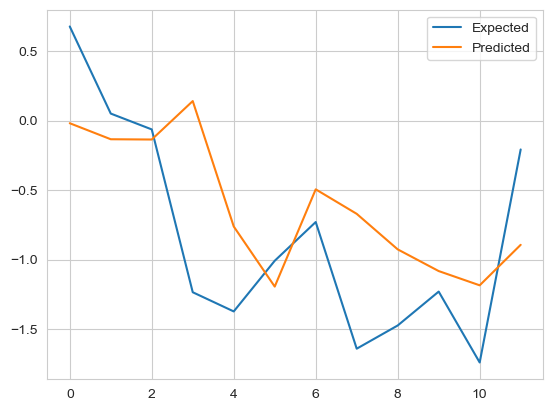

In [293]:
# Now, we will transform the time series data into supervised learning
values = features_array.reshape(-1, 1)
features_array = series_to_supervised(values, n_in=12)

# Let’s evaluate the model using walk-forward validation
mae, y, yhat = walk_forward_validation(features_array, 12)
print('MAE: %.3f' % mae)
print('RMSE: %.3f' % rmse)
# Finally visualize the expected vs predicted values
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

# Perform a Random Forest Analysis

Run the Random Forest Model

In [294]:
# Split the features3 data into target and features
X = features3[['vehicle_count_automated_traffic_volume_counts','average_percipitation','avg_temp','vc_rating', 'ap_rating', 'at_rating','Year','Month','Is_quarter_start','Is_year_start','Elapsed']]
y = features3['wait_assessment']

In [295]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

In [296]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")


Mean Absolute Error: 0.018
Root Mean Squared Error: 0.021


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


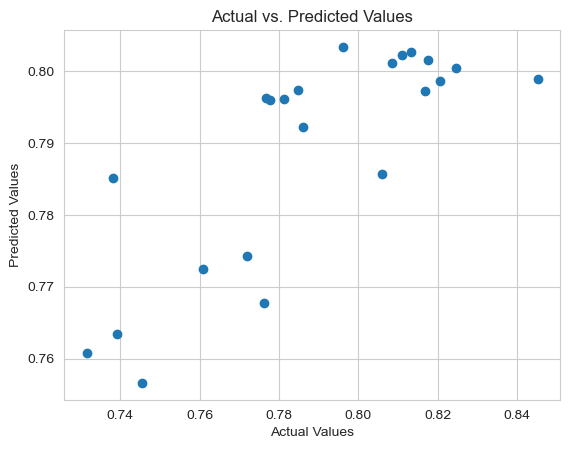

In [297]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

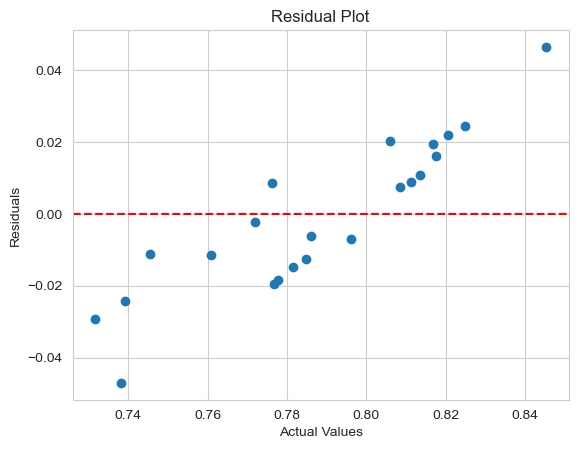

In [298]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

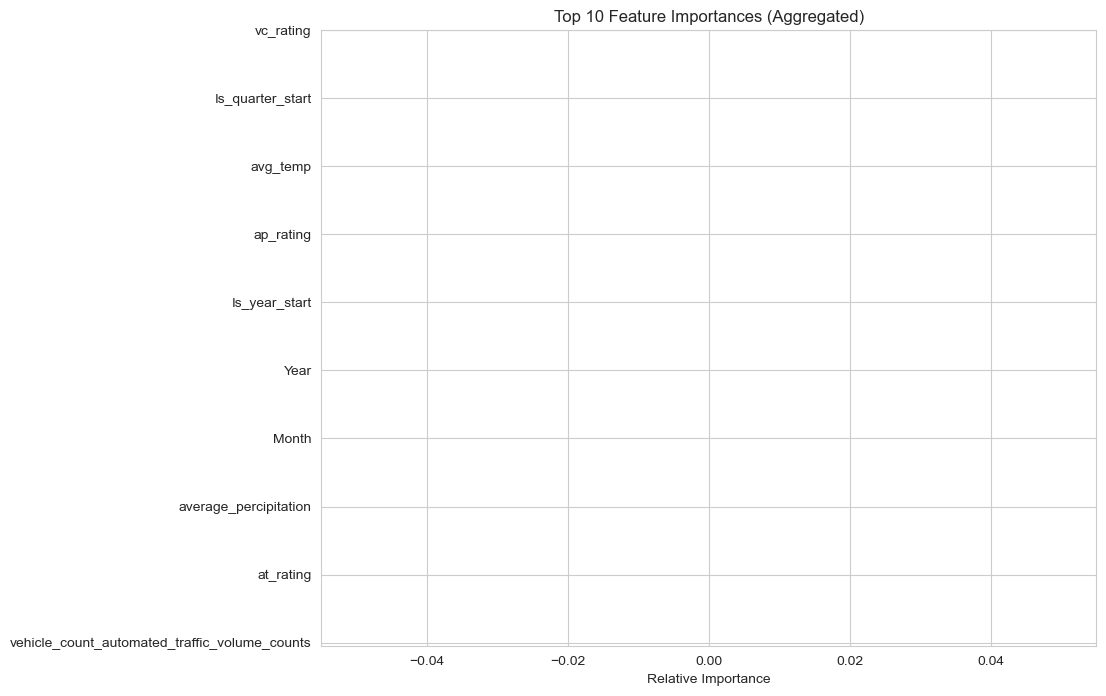

In [299]:
# Get the feature importances
feature_importances = model.feature_importances_

# Assuming X_train is a DataFrame
feature_names = X_train.columns

# Get the unique feature names and their corresponding importances
unique_feature_names, unique_importances = [], []

for name in set(feature_names):
    indices = [i for i, x in enumerate(feature_names) if x == name]
    unique_feature_names.append(name)
    unique_importances.append(sum(feature_importances[indices]))

# Convert to NumPy arrays
unique_feature_names = np.array(unique_feature_names)
unique_importances = np.array(unique_importances)

# Get the top ten indices
top_ten_idx = np.argsort(unique_importances)[-10:]

# Create a bar plot of the top ten feature importances
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances (Aggregated)')
plt.barh(range(len(top_ten_idx)), unique_importances[top_ten_idx], align='center')
plt.yticks(range(len(top_ten_idx)), unique_feature_names[top_ten_idx])
plt.xlabel('Relative Importance')
plt.show()

Scale the data

In [300]:
# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the variables in the features2 dataframe
features3_scaled = scaler.fit_transform(features3)

In [301]:
# Create a new dataframe with the standardized variables
features3_standardized = pd.DataFrame(features3_scaled, columns = features3.columns)

# Print the first few rows of the standardized dataframe
print(features3_standardized.head())

   wait_assessment  vehicle_count_automated_traffic_volume_counts  \
0        -0.503874                                      -0.266022   
1        -2.908007                                      -0.577774   
2        -2.606021                                       0.665941   
3        -0.174093                                       0.780707   
4        -0.113598                                       1.440517   

   average_percipitation  avg_temp  vc_rating  ap_rating  at_rating      Year  \
0               0.420373 -1.736613        0.0        0.0        0.0 -1.547797   
1              -0.947106 -2.125878        0.0        0.0        0.0 -1.547797   
2               0.146877 -1.204618        0.0        0.0        0.0 -1.547797   
3              -0.947106 -0.153603        0.0        0.0        0.0 -1.547797   
4              -1.083853  0.767656        0.0        0.0        0.0 -1.547797   

      Month  Is_quarter_start  Is_year_start   Elapsed  
0 -1.567779          1.394972       3.146

In [302]:
features3_standardized.describe(include="all")

,wait_assessment,vehicle_count_automated_traffic_volume_counts,average_percipitation,avg_temp,vc_rating,ap_rating,at_rating,Year,Month,Is_quarter_start,Is_year_start,Elapsed
count,1.090000e+02,1.080000e+02,1.080000e+02,1.080000e+02,109.0,109.0,109.0,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
mean,-5.037000e-15,-1.089663e-16,-2.055969e-16,9.046262e-17,0.0,0.0,0.0,-5.600006e-15,3.666792e-17,3.870502e-17,1.629685e-17,-4.176068e-16
std,1.004619e+00,1.004662e+00,1.004662e+00,1.004662e+00,0.0,0.0,0.0,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00
min,-2.908007e+00,-8.288539e-01,-1.494097e+00,-2.125878e+00,0.0,0.0,0.0,-1.547797e+00,-1.567779e+00,-7.168604e-01,-3.178209e-01,-1.715640e+00
25%,-4.823059e-01,-7.314700e-01,-6.736099e-01,-8.786088e-01,0.0,0.0,0.0,-7.826730e-01,-9.923988e-01,-7.168604e-01,-3.178209e-01,-8.583519e-01
50%,5.104700e-02,-2.750752e-01,-1.266184e-01,4.751672e-02,0.0,0.0,0.0,-1.754872e-02,-1.293286e-01,-7.168604e-01,-3.178209e-01,-1.063360e-03
75%,7.234982e-01,2.736806e-01,4.203731e-01,9.460693e-01,0.0,0.0,0.0,7.475755e-01,7.337417e-01,1.394972e+00,-3.178209e-01,8.583135e-01
max,2.268574e+00,3.904892e+00,4.659557e+00,1.513747e+00,0.0,0.0,0.0,1.895262e+00,1.596812e+00,1.394972e+00,3.146427e+00,1.716646e+00


Rerun the model

In [303]:
# Split the features3 data into target and features
X = features3_standardized[['vehicle_count_automated_traffic_volume_counts','average_percipitation','avg_temp','vc_rating', 'ap_rating', 'at_rating','Year','Month','Is_quarter_start','Is_year_start','Elapsed']]
y = features3_standardized['wait_assessment']

In [304]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 0.69
Root Mean Squared Error: 0.86


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


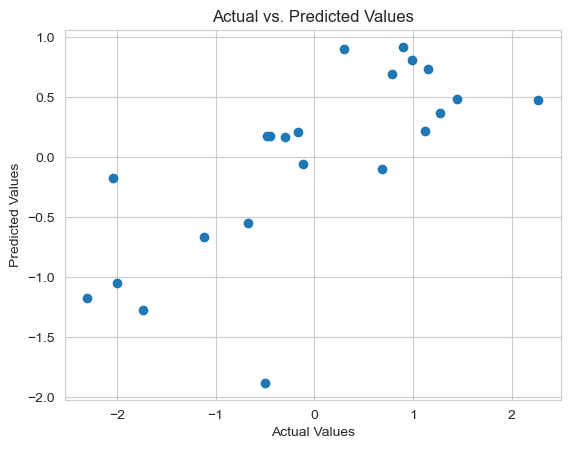

In [305]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

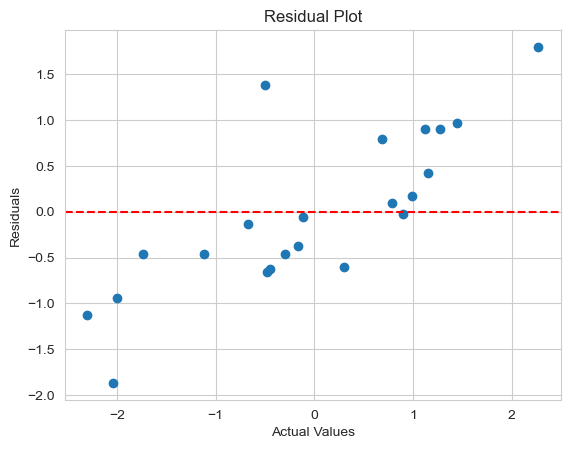

In [306]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

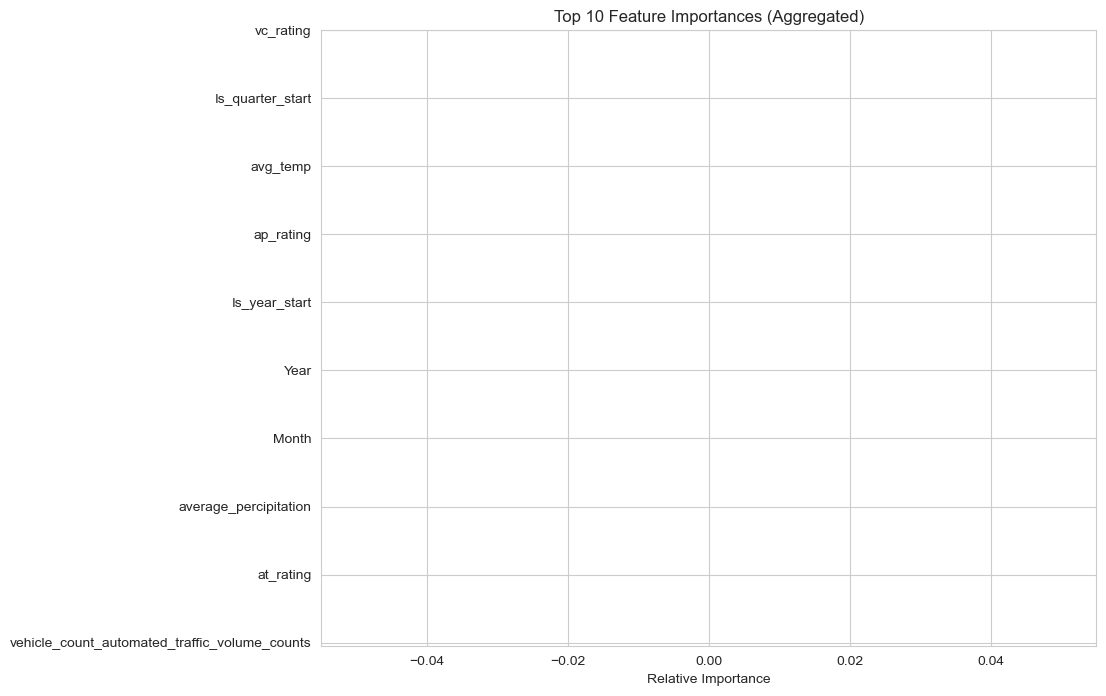

In [307]:
# Get the feature importances
feature_importances = model.feature_importances_

# Assuming X_train is a DataFrame
feature_names = X_train.columns

# Get the unique feature names and their corresponding importances
unique_feature_names, unique_importances = [], []

for name in set(feature_names):
    indices = [i for i, x in enumerate(feature_names) if x == name]
    unique_feature_names.append(name)
    unique_importances.append(sum(feature_importances[indices]))

# Convert to NumPy arrays
unique_feature_names = np.array(unique_feature_names)
unique_importances = np.array(unique_importances)

# Get the top ten indices
top_ten_idx = np.argsort(unique_importances)[-10:]

# Create a bar plot of the top ten feature importances
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances (Aggregated)')
plt.barh(range(len(top_ten_idx)), unique_importances[top_ten_idx], align='center')
plt.yticks(range(len(top_ten_idx)), unique_feature_names[top_ten_idx])
plt.xlabel('Relative Importance')
plt.show()

Perform Parameter Optimization

In [308]:
# Split the features3 data into target and features
X = features3_standardized[['vehicle_count_automated_traffic_volume_counts','average_percipitation','avg_temp','vc_rating', 'ap_rating', 'at_rating','Year','Month','Is_quarter_start','Is_year_start','Elapsed']]
y = features3_standardized['wait_assessment']

In [309]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [None,2, 5, 10],
    'min_samples_leaf': [None,1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create the random forest model
model = RandomForestRegressor(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print(best_params)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Best Hyperparameters:
{'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error: 0.70
Root Mean Squared Error: 0.83


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
1665 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Paul\anaconda3\lib\site-packages\

Rerun the model

In [310]:
# Split the features3 data into target and features
X = features3_standardized[['vehicle_count_automated_traffic_volume_counts','average_percipitation','avg_temp','vc_rating', 'ap_rating', 'at_rating','Year','Month','Is_quarter_start','Is_year_start','Elapsed']]
y = features3_standardized['wait_assessment']

In [311]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model with specified hyperparameters
model = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Absolute Error: 0.67
Root Mean Squared Error: 0.84


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


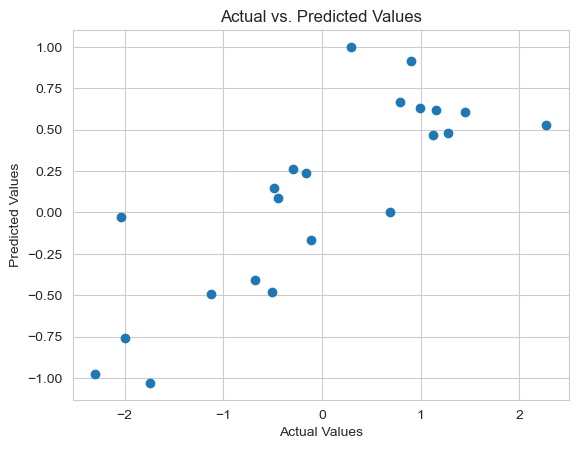

In [312]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

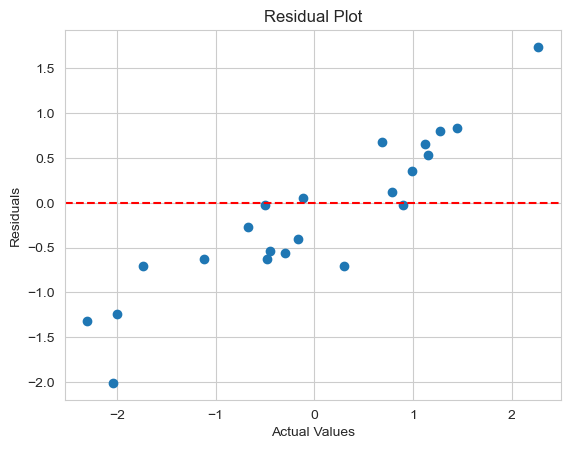

In [313]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

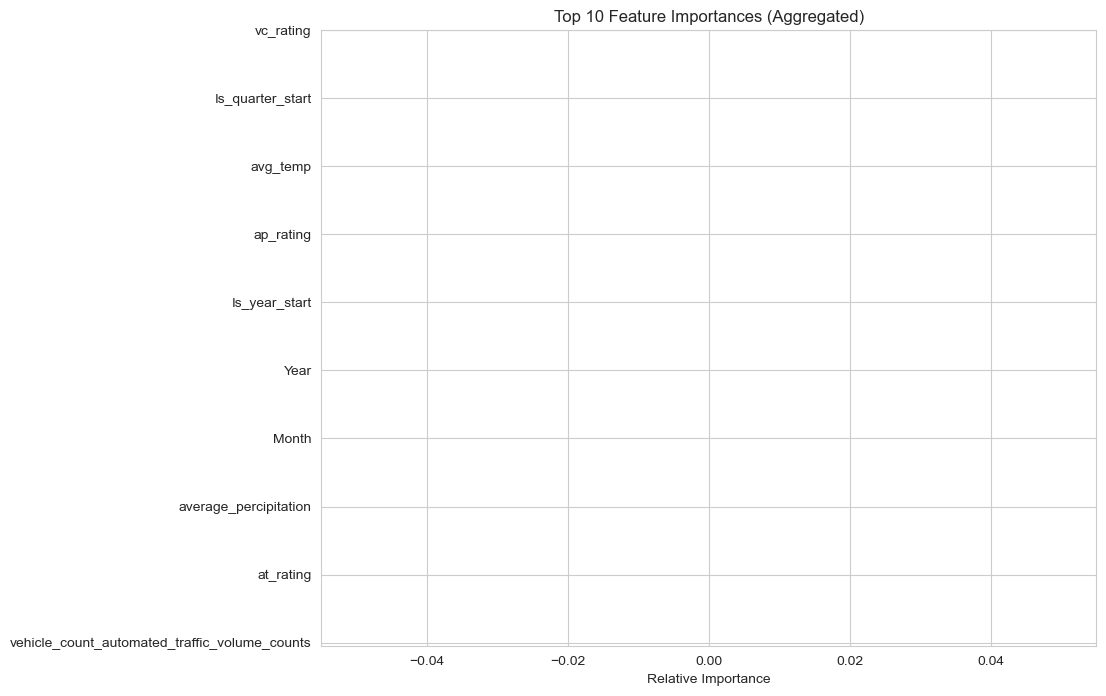

In [314]:
# Get the feature importances
feature_importances = model.feature_importances_

# Assuming X_train is a DataFrame
feature_names = X_train.columns

# Get the unique feature names and their corresponding importances
unique_feature_names, unique_importances = [], []

for name in set(feature_names):
    indices = [i for i, x in enumerate(feature_names) if x == name]
    unique_feature_names.append(name)
    unique_importances.append(sum(feature_importances[indices]))

# Convert to NumPy arrays
unique_feature_names = np.array(unique_feature_names)
unique_importances = np.array(unique_importances)

# Get the top ten indices
top_ten_idx = np.argsort(unique_importances)[-10:]

# Create a bar plot of the top ten feature importances
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances (Aggregated)')
plt.barh(range(len(top_ten_idx)), unique_importances[top_ten_idx], align='center')
plt.yticks(range(len(top_ten_idx)), unique_feature_names[top_ten_idx])
plt.xlabel('Relative Importance')
plt.show()

# Create a Hybrid Model using the Random Forest and Sarimax Models

Extract the Residuals and append to the data

In [315]:
features3_standardized.describe(include="all")

,wait_assessment,vehicle_count_automated_traffic_volume_counts,average_percipitation,avg_temp,vc_rating,ap_rating,at_rating,Year,Month,Is_quarter_start,Is_year_start,Elapsed
count,1.090000e+02,1.080000e+02,1.080000e+02,1.080000e+02,109.0,109.0,109.0,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
mean,-5.037000e-15,-1.089663e-16,-2.055969e-16,9.046262e-17,0.0,0.0,0.0,-5.600006e-15,3.666792e-17,3.870502e-17,1.629685e-17,-4.176068e-16
std,1.004619e+00,1.004662e+00,1.004662e+00,1.004662e+00,0.0,0.0,0.0,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00
min,-2.908007e+00,-8.288539e-01,-1.494097e+00,-2.125878e+00,0.0,0.0,0.0,-1.547797e+00,-1.567779e+00,-7.168604e-01,-3.178209e-01,-1.715640e+00
25%,-4.823059e-01,-7.314700e-01,-6.736099e-01,-8.786088e-01,0.0,0.0,0.0,-7.826730e-01,-9.923988e-01,-7.168604e-01,-3.178209e-01,-8.583519e-01
50%,5.104700e-02,-2.750752e-01,-1.266184e-01,4.751672e-02,0.0,0.0,0.0,-1.754872e-02,-1.293286e-01,-7.168604e-01,-3.178209e-01,-1.063360e-03
75%,7.234982e-01,2.736806e-01,4.203731e-01,9.460693e-01,0.0,0.0,0.0,7.475755e-01,7.337417e-01,1.394972e+00,-3.178209e-01,8.583135e-01
max,2.268574e+00,3.904892e+00,4.659557e+00,1.513747e+00,0.0,0.0,0.0,1.895262e+00,1.596812e+00,1.394972e+00,3.146427e+00,1.716646e+00


In [316]:
residuals = results1.resid

In [317]:
residuals.describe()

count    109.000000
mean      -0.020691
std        0.845092
min       -2.457285
25%       -0.489676
50%       -0.085354
75%        0.407735
max        3.113875
dtype: float64

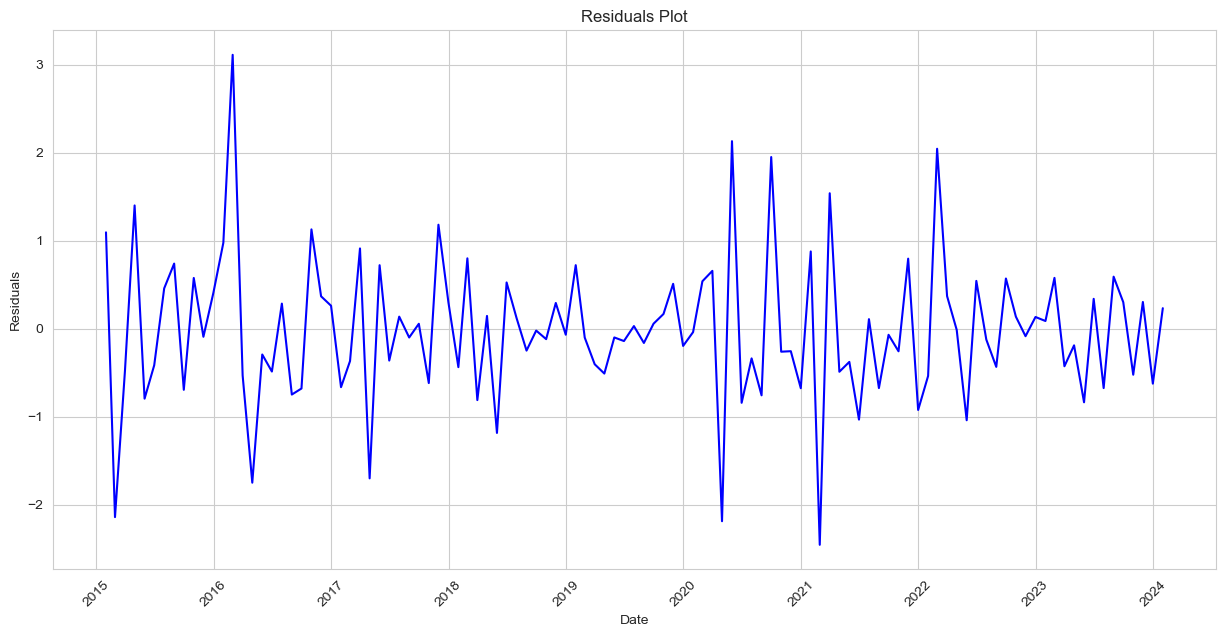

In [318]:
# Plot the residuals
plt.figure(figsize=(15, 7))
plt.plot(residuals, color="blue")
plt.title("Residuals Plot")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.xticks(rotation=45)
plt.show()

In [319]:
# Check the indices
print(residuals.index)
print(features3.index)

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31',
               ...
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
               '2023-12-31', '2024-01-31'],
              dtype='datetime64[ns]', length=109, freq='M')
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             99, 100, 101, 102, 103, 104, 105, 106, 107, 108],
           dtype='int64', length=109)


In [320]:
# Convert the index to a datetime index starting from 2015-01-01
features3.index = pd.date_range(start='2015-01-01', freq='M', periods=len(features3))

In [321]:
# Add residuals to the DataFrame
features3['sarimax_residuals'] = residuals

In [322]:
features3.describe(include="all")

,wait_assessment,vehicle_count_automated_traffic_volume_counts,average_percipitation,avg_temp,vc_rating,ap_rating,at_rating,Year,Month,Is_quarter_start,Is_year_start,Elapsed,sarimax_residuals
count,109.000000,1.080000e+02,108.000000,108.000000,109.0,109.0,109.0,109.000000,109.000000,109.00000,109.000000,1.090000e+02,109.000000
mean,0.788842,3.479085e+06,0.139259,56.667593,0.0,0.0,0.0,2019.045872,6.449541,0.33945,0.091743,1.562027e+09,-0.020691
std,0.024998,4.168301e+06,0.073468,15.485536,0.0,0.0,0.0,2.626028,3.492018,0.47571,0.289996,8.312493e+07,0.845092
min,0.716483,4.020500e+04,0.030000,23.900000,0.0,0.0,0.0,2015.000000,1.000000,0.00000,0.000000,1.420070e+09,-2.457285
25%,0.776841,4.442467e+05,0.090000,43.125000,0.0,0.0,0.0,2017.000000,3.000000,0.00000,0.000000,1.491005e+09,-0.489676
50%,0.790113,2.337810e+06,0.130000,57.400000,0.0,0.0,0.0,2019.000000,6.000000,0.00000,0.000000,1.561939e+09,-0.085354
75%,0.806845,4.614575e+06,0.170000,71.250000,0.0,0.0,0.0,2021.000000,9.000000,1.00000,0.000000,1.633046e+09,0.407735
max,0.845291,1.968032e+07,0.480000,80.000000,0.0,0.0,0.0,2024.000000,12.000000,1.00000,1.000000,1.704067e+09,3.113875


In [323]:
# Scale the numerical features in the features3 dataframe using StandardScaler
scaler = StandardScaler()

# Standardize the variables in the features2 dataframe
features3_scaled = scaler.fit_transform(features3)

In [324]:
# Create a new dataframe with the standardized variables
features3_standardized = pd.DataFrame(features3_scaled, columns = features3.columns)

# Print the first few rows of the standardized dataframe
print(features3_standardized.head())

   wait_assessment  vehicle_count_automated_traffic_volume_counts  \
0        -0.503874                                      -0.266022   
1        -2.908007                                      -0.577774   
2        -2.606021                                       0.665941   
3        -0.174093                                       0.780707   
4        -0.113598                                       1.440517   

   average_percipitation  avg_temp  vc_rating  ap_rating  at_rating      Year  \
0               0.420373 -1.736613        0.0        0.0        0.0 -1.547797   
1              -0.947106 -2.125878        0.0        0.0        0.0 -1.547797   
2               0.146877 -1.204618        0.0        0.0        0.0 -1.547797   
3              -0.947106 -0.153603        0.0        0.0        0.0 -1.547797   
4              -1.083853  0.767656        0.0        0.0        0.0 -1.547797   

      Month  Is_quarter_start  Is_year_start   Elapsed  sarimax_residuals  
0 -1.567779          1

In [325]:
# Convert the index to a datetime index starting from 2015-01-01
features3_standardized.describe(include="all")

,wait_assessment,vehicle_count_automated_traffic_volume_counts,average_percipitation,avg_temp,vc_rating,ap_rating,at_rating,Year,Month,Is_quarter_start,Is_year_start,Elapsed,sarimax_residuals
count,1.090000e+02,1.080000e+02,1.080000e+02,1.080000e+02,109.0,109.0,109.0,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
mean,-5.037000e-15,-1.089663e-16,-2.055969e-16,9.046262e-17,0.0,0.0,0.0,-5.600006e-15,3.666792e-17,3.870502e-17,1.629685e-17,-4.176068e-16,5.092766e-18
std,1.004619e+00,1.004662e+00,1.004662e+00,1.004662e+00,0.0,0.0,0.0,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00
min,-2.908007e+00,-8.288539e-01,-1.494097e+00,-2.125878e+00,0.0,0.0,0.0,-1.547797e+00,-1.567779e+00,-7.168604e-01,-3.178209e-01,-1.715640e+00,-2.896546e+00
25%,-4.823059e-01,-7.314700e-01,-6.736099e-01,-8.786088e-01,0.0,0.0,0.0,-7.826730e-01,-9.923988e-01,-7.168604e-01,-3.178209e-01,-8.583519e-01,-5.575141e-01
50%,5.104700e-02,-2.750752e-01,-1.266184e-01,4.751672e-02,0.0,0.0,0.0,-1.754872e-02,-1.293286e-01,-7.168604e-01,-3.178209e-01,-1.063360e-03,-7.686973e-02
75%,7.234982e-01,2.736806e-01,4.203731e-01,9.460693e-01,0.0,0.0,0.0,7.475755e-01,7.337417e-01,1.394972e+00,-3.178209e-01,8.583135e-01,5.092997e-01
max,2.268574e+00,3.904892e+00,4.659557e+00,1.513747e+00,0.0,0.0,0.0,1.895262e+00,1.596812e+00,1.394972e+00,3.146427e+00,1.716646e+00,3.726273e+00


Perform a Random Forest Analysis

In [326]:
# Split the features3 data into target and features
X = features3_standardized[['vehicle_count_automated_traffic_volume_counts','average_percipitation','avg_temp','vc_rating', 'ap_rating', 'at_rating','Year','Month','Is_quarter_start','Is_year_start','Elapsed', 'sarimax_residuals']]
y = features3_standardized['wait_assessment']

In [327]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model with specified hyperparameters
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 0.67
Root Mean Squared Error: 0.82


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


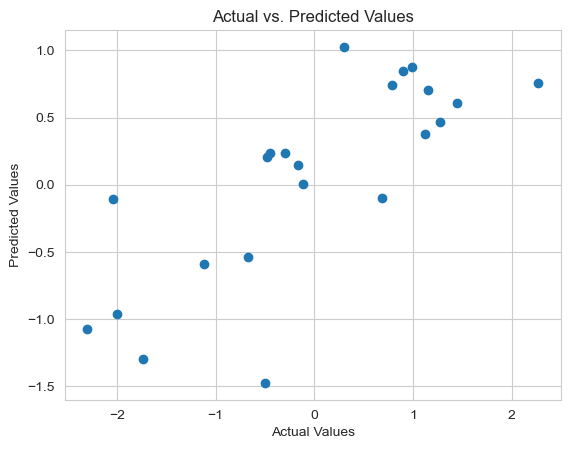

In [328]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

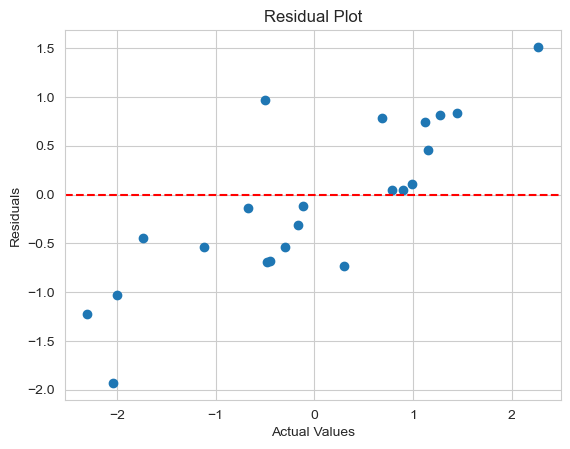

In [329]:
# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

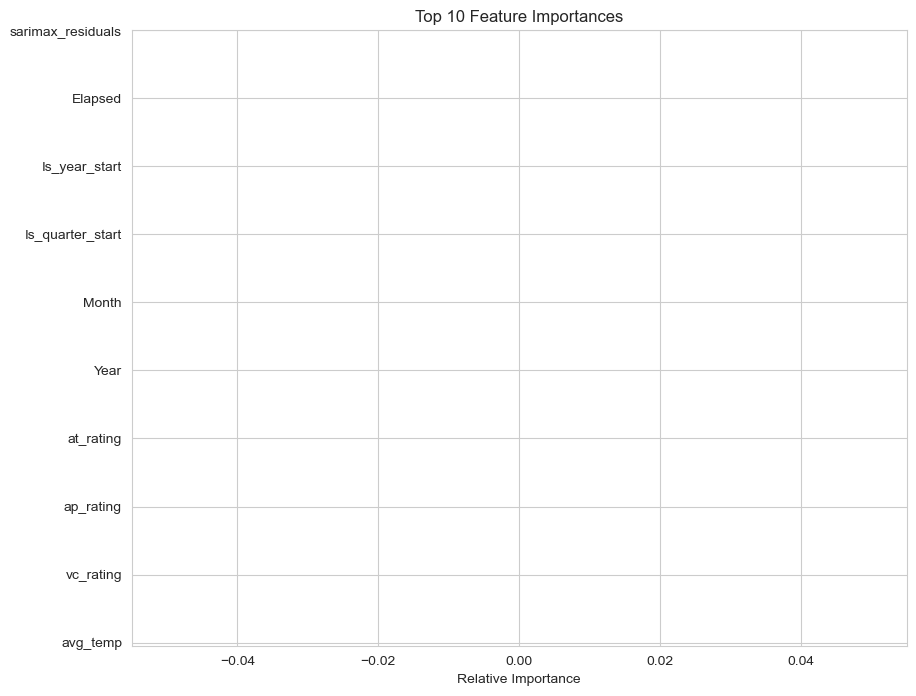

In [330]:
# Plot the feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Get the top ten indices
top_ten_idx = np.argsort(feature_importances)[-10:]

# Create a bar plot of the top ten feature importances
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(top_ten_idx)), feature_importances[top_ten_idx], align='center')
plt.yticks(range(len(top_ten_idx)), feature_names[top_ten_idx])
plt.xlabel('Relative Importance')
plt.show()


Perform Parameter Optimization

In [331]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [None, 2, 5, 10],
    'min_samples_leaf': [None, 1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create the random forest model
model = RandomForestRegressor(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print(best_params)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Best Hyperparameters:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error: 0.66
Root Mean Squared Error: 0.79


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
1665 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Paul\anaconda3\lib\site-packages\

Rerun the model

In [332]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model with specified hyperparameters
model = RandomForestRegressor(
    max_depth= None,
    max_features= None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 0.66
Root Mean Squared Error: 0.79


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


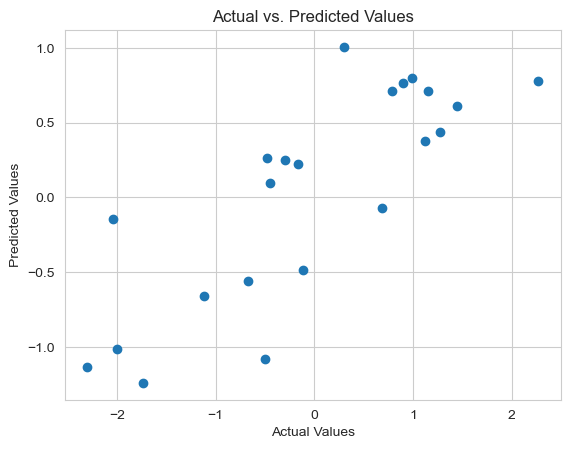

In [333]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

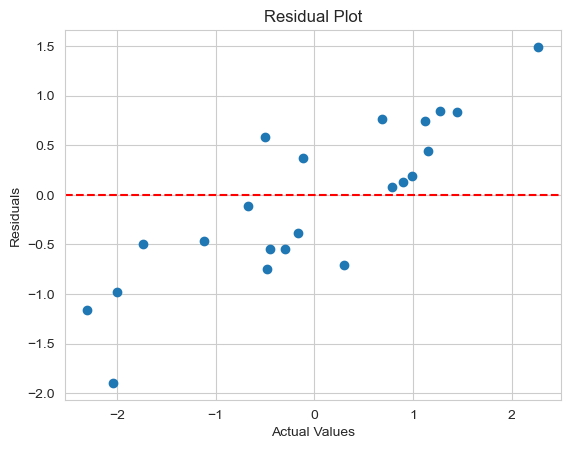

In [334]:
# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

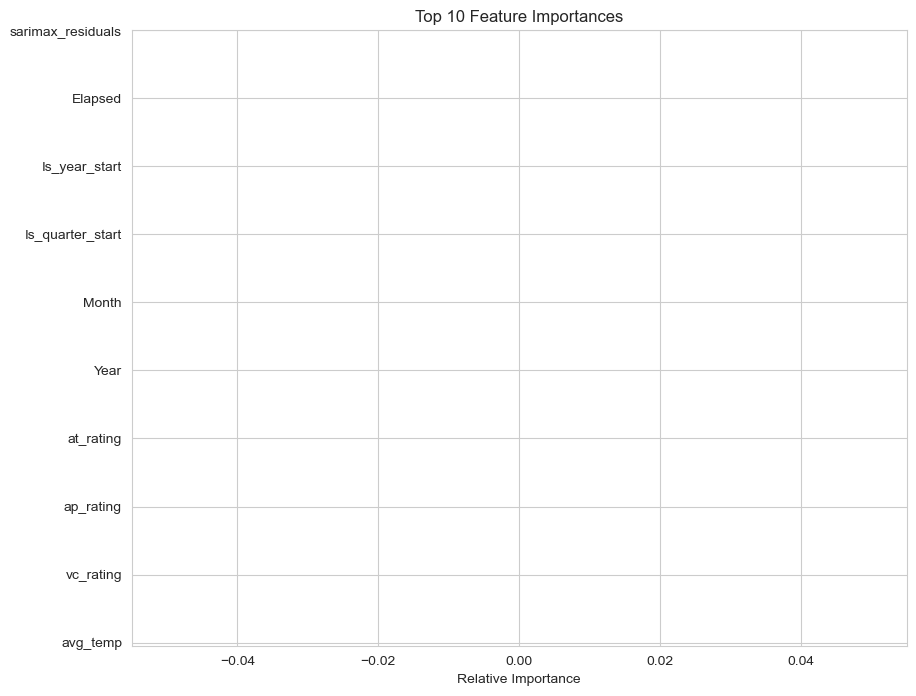

In [335]:
# Plot the feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Get the top ten indices
top_ten_idx = np.argsort(feature_importances)[-10:]

# Create a bar plot of the top ten feature importances
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(top_ten_idx)), feature_importances[top_ten_idx], align='center')
plt.yticks(range(len(top_ten_idx)), feature_names[top_ten_idx])
plt.xlabel('Relative Importance')
plt.show()

# Create Multiple Route Models and Visualize

Take the Delay Data needed for the model

In [336]:
# Describe the delays dataframe
delays.describe(include="all")

,date,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment,year,month
count,125942,125942,125942.000000,125942,125942,125942,1.259420e+05,1.259420e+05,125396.000000,125942,125942
unique,109,7,NaN,4,369,3,NaN,NaN,NaN,10,12
top,2022-01,Queens,NaN,LCL/LTD,BX1,Off-Peak,NaN,NaN,NaN,2023,01
freq,1279,40833,NaN,97367,436,62868,NaN,NaN,NaN,14073,12189
mean,NaN,NaN,1.447404,NaN,NaN,NaN,7.264366e+03,9.353320e+03,0.788823,NaN,NaN
std,NaN,NaN,0.497228,NaN,NaN,NaN,9.912570e+04,1.278139e+05,0.089828,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,8.580000e+02,1.097000e+03,0.730053,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,2.115500e+03,2.708500e+03,0.793640,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,4.721000e+03,6.252750e+03,0.853152,NaN,NaN


In [337]:
# Join the weather_features and traffic_features dataframes together
weather_traffic_features = pd.merge(weather_features, traffic_features, on="date", how="left")

In [338]:
# Convert the date column to a datetime data type
delays['date'] = pd.to_datetime(delays['date'])

In [339]:
# Convert the date column to a datetime format
weather_traffic_features['date'] = pd.to_datetime(weather_traffic_features['date'])

In [340]:
# Join the delays and weather_traffic_features dataframes together
delays_features = pd.merge(delays, weather_traffic_features, on="date", how="left")

In [341]:
# Print the shape of the weather_traffic_features dataframe
print(delays_features.shape)

# Describe the weather_traffic_features dataframe
delays_features.describe(include="all")

(125942, 14)


C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\2405795010.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  delays_features.describe(include="all")


,date,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment,year,month,average_percipitation,avg_temp,vehicle_count_automated_traffic_volume_counts
count,125942,125942,125942.000000,125942,125942,125942,1.259420e+05,1.259420e+05,125396.000000,125942,125942,124775.000000,124775.000000,1.247750e+05
unique,109,7,NaN,4,369,3,NaN,NaN,NaN,10,12,NaN,NaN,NaN
top,2022-01-01 00:00:00,Queens,NaN,LCL/LTD,BX1,Off-Peak,NaN,NaN,NaN,2023,01,NaN,NaN,NaN
freq,1279,40833,NaN,97367,436,62868,NaN,NaN,NaN,14073,12189,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.447404,NaN,NaN,NaN,7.264366e+03,9.353320e+03,0.788823,NaN,NaN,0.139426,56.502811,3.476690e+06
std,NaN,NaN,0.497228,NaN,NaN,NaN,9.912570e+04,1.278139e+05,0.089828,NaN,NaN,0.073206,15.473343,4.131925e+06
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,0.030000,23.900000,4.020500e+04
25%,NaN,NaN,1.000000,NaN,NaN,NaN,8.580000e+02,1.097000e+03,0.730053,NaN,NaN,0.090000,42.000000,4.607855e+05


In [342]:
# Print a value count of the route_id column
delays_features["route_id"].value_counts()

# List the route_id values that have 432 rows
delays_features["route_id"].value_counts().index[delays_features["route_id"].value_counts() == 432]

Index(['BM5', 'Q64', 'Q65', 'Q66', 'BM4', 'QM15', 'BM2', 'Q113', 'Q19', 'Q112',
       'Q23', 'Q25', 'Q111', 'Q110', 'BXM9', 'BXM8', 'BXM7', 'BXM6', 'BM3',
       'Q37', 'Q38', 'BM1', 'BXM10', 'Q114'],
      dtype='object')

In [343]:
# Create a route specific dataframe for the BX26 route
delays_bx26 = delays_features[delays_features["route_id"] == "BX26"]

delays_bx26.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\1644774138.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  delays_bx26.describe(include="all")


,date,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment,year,month,average_percipitation,avg_temp,vehicle_count_automated_traffic_volume_counts
count,436,436,436.000000,436,436,436,436.000000,436.000000,436.000000,436,436,432.000000,432.000000,4.320000e+02
unique,109,1,NaN,1,1,2,NaN,NaN,NaN,10,12,NaN,NaN,NaN
top,2020-01-01 00:00:00,Bronx,NaN,LCL/LTD,BX26,Off-Peak,NaN,NaN,NaN,2020,01,NaN,NaN,NaN
freq,4,436,NaN,436,436,218,NaN,NaN,NaN,48,40,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.500000,NaN,NaN,NaN,4683.995413,5682.389908,0.832414,NaN,NaN,0.139259,56.667593,3.479085e+06
std,NaN,NaN,0.500574,NaN,NaN,NaN,3282.753852,3915.993738,0.059108,NaN,NaN,0.073212,15.431548,4.153769e+06
min,NaN,NaN,1.000000,NaN,NaN,NaN,515.000000,639.000000,0.628805,NaN,NaN,0.030000,23.900000,4.020500e+04
25%,NaN,NaN,1.000000,NaN,NaN,NaN,1717.500000,2014.250000,0.794464,NaN,NaN,0.090000,43.125000,4.442467e+05


In [344]:
# Create a list of the route_id values that have 432 rows
route_ids = delays_features["route_id"].value_counts().index[delays_features["route_id"].value_counts() == 432].tolist()

Find Valid Combinations of Routes

In [345]:
# Create a dataframe with only the route_id values that have 432 rows based on the route_ids list
delays_features_432 = delays_features[delays_features["route_id"].isin(route_ids)]

In [346]:
# Convert the date column to a datetime data type
delays_features_432["date"] = pd.to_datetime(delays_features_432["date"])

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\1018092786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays_features_432["date"] = pd.to_datetime(delays_features_432["date"])


In [347]:
# Group the data by the route_id and date columns and take the mean of the wait_assessment column
delays_features_432 = delays_features_432.groupby(["route_id", "date"]).agg({"wait_assessment": "mean", "average_percipitation": "mean", "avg_temp": "mean","vehicle_count_automated_traffic_volume_counts": "mean"}).reset_index()

In [348]:
# Create a list of the route_id values that don't have 108 rows
route_ids2 = delays_features_432["route_id"].value_counts().index[delays_features_432["route_id"].value_counts() != 108].tolist()

In [349]:
route_ids2

[]

In [350]:
# Remove the route_id values that don't have 108 rows
delays_features_432 = delays_features_432[~delays_features_432["route_id"].isin(route_ids2)]

In [351]:
# Convert the date column to a datetime data type
delays_features_432["date"] = pd.to_datetime(delays_features_432["date"])

# Set the date column as the index
delays_features_432 = delays_features_432.set_index("date")

In [352]:
filtered_df = delays_features_432

In [353]:
# Calculate the size of each group
group_sizes = filtered_df.groupby(['route_id']).size().reset_index(name='group_size')

# Filter groupings with 108 rows
valid_groups = group_sizes[group_sizes['group_size'] == 108]

In [354]:
# Merge with the original DataFrame to get the rows from valid groups
filtered_df = pd.merge(filtered_df, valid_groups[['route_id']], on=['route_id'])

In [355]:
# Get a list of every route id
route_ids = filtered_df['route_id'].unique()

# Create a rolling mean diff column for each route id to ensure the time series is stationary
for route_id in route_ids:
    data = filtered_df[filtered_df['route_id'] == route_id].copy()  # Make a copy to avoid modifying the original DataFrame
    rolling_mean = data['wait_assessment'].rolling(window=12, min_periods=1).mean()  # Calculate rolling mean with min_periods=1 to handle NaNs
    data['rolling_mean_diff'] = rolling_mean.diff()  # Calculate the difference between consecutive rolling mean values
    data['rolling_mean_diff'] = data['rolling_mean_diff'].fillna(data['rolling_mean_diff'].mean())
    filtered_df.loc[filtered_df['route_id'] == route_id, 'rolling_mean_diff'] = data['rolling_mean_diff']  # Assign the result back to the original DataFrame


In [356]:
filtered_df.describe(include="all")

,route_id,wait_assessment,average_percipitation,avg_temp,vehicle_count_automated_traffic_volume_counts,rolling_mean_diff
count,2592,2592.000000,2568.000000,2568.000000,2.568000e+03,2592.000000
unique,24,NaN,NaN,NaN,NaN,NaN
top,BM1,NaN,NaN,NaN,NaN,NaN
freq,108,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.791604,0.139665,56.676051,3.511224e+06,-0.000012
std,NaN,0.066325,0.073203,15.480957,4.155707e+06,0.005885
min,NaN,0.300961,0.030000,23.900000,4.020500e+04,-0.041818
25%,NaN,0.748262,0.090000,42.000000,4.607855e+05,-0.002548
50%,NaN,0.788465,0.130000,57.200000,2.337810e+06,-0.000035
75%,NaN,0.839412,0.170000,71.400000,4.684729e+06,0.002601


In [357]:
# Scale the numerical columns in the filtered_df dataframe
scaler = StandardScaler()
filtered_df[['wait_assessment', 'average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts', 'rolling_mean_diff']] = scaler.fit_transform(filtered_df[['wait_assessment', 'average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts', 'rolling_mean_diff']])
filtered_df.describe(include="all")

,route_id,wait_assessment,average_percipitation,avg_temp,vehicle_count_automated_traffic_volume_counts,rolling_mean_diff
count,2592,2.592000e+03,2.568000e+03,2.568000e+03,2.568000e+03,2.592000e+03
unique,24,NaN,NaN,NaN,NaN,NaN
top,BM1,NaN,NaN,NaN,NaN,NaN
freq,108,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.083381e-15,1.763906e-16,-3.614277e-17,1.549470e-16,-8.223874e-18
std,NaN,1.000193e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000193e+00
min,NaN,-7.399015e+00,-1.498389e+00,-2.117597e+00,-8.354042e-01,-7.105311e+00
25%,NaN,-6.536044e-01,-6.785899e-01,-9.481914e-01,-7.341790e-01,-4.308745e-01
50%,NaN,-4.734392e-02,-1.320574e-01,3.385131e-02,-2.824172e-01,-3.784567e-03
75%,NaN,7.209540e-01,4.144751e-01,9.512859e-01,2.824390e-01,4.442192e-01


In [363]:
# Fill in the missing values with the mean of the column
filtered_df = filtered_df.fillna(filtered_df.mean())

C:\Users\Paul\AppData\Local\Temp\ipykernel_9868\2052572781.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  filtered_df = filtered_df.fillna(filtered_df.mean())


Run the Model Looping through the Valid Combinations

In [364]:
# Create a dictionary to store the models, predictions, and route_ids
sarimax_results = {}

# Iterate over the unique route_ids
for route_id in filtered_df['route_id'].unique():
    # Filter the data for the current route_id
    route_data = filtered_df[filtered_df['route_id'] == route_id]
    
    # Set the frequency of the index to monthly
    route_data.index = pd.date_range(start='2015-01-01', periods=len(route_data), freq='M')
    
    # Define the endogenous variable (target)
    endog = route_data['rolling_mean_diff']

    # Define the exogenous variables
    exog = route_data[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]
    
    # Add a constant to the exogenous variables
    exog = sm.add_constant(exog)
    
    # Perform test/train split
    train_size = 0.8  # You can adjust this ratio as needed
    endog_train, endog_test, exog_train, exog_test = train_test_split(
    endog, exog, train_size=train_size, shuffle=False
    )

    # Set the frequency of the time series to monthly
    freq = 'M'
    
    # Create the SARIMAX model
    model = sm.tsa.SARIMAX(endog_train, exog = exog_train, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12), freq = freq)
    
    # Fit the model
    model_fit = model.fit()
    
    # Make predictions on the test set
    forecast = model_fit.get_forecast(steps=len(endog_test), exog=exog_test)
    
    # Save the model, predictions, and route_id to the dictionary
    sarimax_results[route_id] = {'model': model_fit, 'predictions': forecast, 'route_id': route_id}

# Print the dictionary of models, predictions, and route_ids
print(sarimax_results)

c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


{'BM1': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001AD3284AA70>, 'predictions': <statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x000001AD328484C0>, 'route_id': 'BM1'}, 'BM2': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001AD3284B1C0>, 'predictions': <statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x000001AD3283B790>, 'route_id': 'BM2'}, 'BM3': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001AD32848CD0>, 'predictions': <statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x000001AD3046AAD0>, 'route_id': 'BM3'}, 'BM4': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001AC9E9285B0>, 'predictions': <statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x000001AD304698A0>, 'route_id': 'BM4'}, 'BM5': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXRes

In [365]:
route_data.describe(include="all")

,route_id,wait_assessment,average_percipitation,avg_temp,vehicle_count_automated_traffic_volume_counts,rolling_mean_diff
count,108,108.000000,108.000000,108.000000,1.080000e+02,108.000000
unique,1,NaN,NaN,NaN,NaN,NaN
top,QM15,NaN,NaN,NaN,NaN,NaN
freq,108,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.665344,-0.006853,0.003208,1.597443e-16,-0.008426
std,NaN,0.496982,1.003718,0.999717,1.000000e+00,0.884596
min,NaN,-0.934401,-1.498389,-2.117597,-8.354042e-01,-5.259850
25%,NaN,0.341942,-0.678590,-0.875507,-7.320322e-01,-0.358774
50%,NaN,0.642253,-0.132057,0.046773,-2.824172e-01,0.036916
75%,NaN,1.027002,0.414475,0.941595,2.655542e-01,0.511091


Create dashboard to visualize the results

In [366]:
# Create a dropdown with unique route_ids
route_id_options = [{'label': str(route_id), 'value': route_id} for route_id in sarimax_results.keys()]

In [367]:
# Create a Dash app
app = dash.Dash(__name__)

In [368]:
# Layout of the app
app.layout = html.Div([
    html.Label('Select Route Id:', style={'font-weight': 'bold', 'margin-bottom': '10px'}),
    dcc.Dropdown(
        id='route-id-dropdown',
        options=route_id_options,
        value=route_id_options[0]['value'],
        style={'width': '50%', 'margin-bottom': '20px'}
    ),
    dcc.Graph(id='time-series-plot',
        config={'displayModeBar': False})
])

In [369]:
# Callback to update the plot based on the selected Route Id
@app.callback(
    dash.dependencies.Output('time-series-plot', 'figure'),
    [dash.dependencies.Input('route-id-dropdown', 'value')]
)
def update_plot(selected_route_id):
    # Retrieve model and predictions for the selected Route Id
    model_fit = sarimax_results[selected_route_id]['model']
    predictions = sarimax_results[selected_route_id]['predictions']
    route_data = filtered_df[filtered_df['route_id'] == selected_route_id]
    endog_train = route_data['rolling_mean_diff'][:int(len(route_data) * 0.8)]
    endog_test = route_data['rolling_mean_diff'][int(len(route_data) * 0.8):]

    # Plot actual values from the training set
    trace1 = go.Scatter(x=endog_train.index, y=endog_train, mode='lines', name='Actual (Training Set)', line=dict(color='blue'))

    # Plot actual values from the test set
    trace2 = go.Scatter(x=endog_test.index, y=endog_test, mode='lines', name='Actual (Test Set)', line=dict(color='blue', dash='dash'))

    # Plot predicted values from the test set
    trace3 = go.Scatter(x=endog_test.index, y=predictions.predicted_mean.to_numpy(), mode='lines', name='Predicted (Test Set)', line=dict(color='orange'))

    # Set layout options
    layout = dict(
        title='Actual vs Predicted Values',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Wait Assessment'),
        legend=dict(x=0, y=1, traceorder='normal')
    )

    # Create the figure
    figure = dict(data=[trace1, trace2, trace3], layout=layout)

    return figure


In [370]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on
